# In this notebook I explore the LLR dependence in galaxy scaling relations

In [7]:
import seaborn as sns
from astropy.io import fits
from multiprocessing import Pool
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy.stats import binned_statistic_2d
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from maps import data_loader
from utils import load_datasets
import matplotlib.colors as colors
from astropy.table import Table
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.linewidth']= 3
plt.rcParams['xtick.major.size'] =8
plt.rcParams['ytick.major.size'] =8
plt.rcParams['xtick.minor.size'] =4
plt.rcParams['ytick.minor.size'] =4
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
plt.rcParams['font.size'] = 35
plt.rcParams['figure.figsize'] = (12,12)

In [2]:
SDSS, TNG50, TNG, Illustris = load_datasets(orig=True)

/scratch/lzanisi/pixel-cnn/analysis/utils.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  SDSS['LCentSat'] = SDSS['LCentSat'].replace(to_replace=2, value=0)


In [3]:
SDSS_cen = SDSS.query('LCentSat==1')
TNG_cen = TNG.query('LCentSat==1')
TNG50_cen = TNG50.query('LCentSat==1')
Illustris_cen = Illustris.query('LCentSat==1')

SDSS_sat = SDSS.query('LCentSat==0')
TNG_sat = TNG.query('LCentSat==0')
TNG50_sat = TNG50.query('LCentSat==0')
Illustris_sat = Illustris.query('LCentSat==0')

In [4]:
SDSS_Q = SDSS.query('sSFR<-11')
SDSS_SF = SDSS.query('sSFR>-11')

TNG_Q = TNG.query('sSFR<-11')
TNG_SF = TNG.query('sSFR>-11')

TNG50_Q = TNG50.query('sSFR<-11')
TNG50_SF = TNG50.query('sSFR>-11')

Illustris_Q = Illustris.query('sSFR<-11')
Illustris_SF = Illustris.query('sSFR>-11')


In [5]:
SDSS_cen_Q = SDSS.query('LCentSat==1 & sSFR<-11')
TNG_cen_Q = TNG.query('LCentSat==1 & sSFR<-11')
TNG50_cen_Q = TNG50.query('LCentSat==1 & sSFR<-11')
Illustris_cen_Q = Illustris.query('LCentSat==1 & sSFR<-11')

SDSS_cen_SF = SDSS.query('LCentSat==1 & sSFR>-11')
TNG_cen_SF = TNG.query('LCentSat==1 & sSFR>-11')
TNG50_cen_SF = TNG50.query('LCentSat==1 & sSFR>-11')
Illustris_cen_SF = Illustris.query('LCentSat==1 & sSFR>-11')


SDSS_sat_Q = SDSS_sat.query('sSFR<-11')
TNG_sat_Q = TNG_sat.query('sSFR<-11')
TNG50_sat_Q =TNG50_sat.query('sSFR<-11')
Illustris_sat_Q = Illustris_sat.query('sSFR<-11')


SDSS_sat_SF= SDSS_sat.query('sSFR>-11')
TNG_sat_SF= TNG_sat.query('sSFR>-11')
TNG50_sat_SF= TNG50_sat.query('sSFR>-11')
Illustris_sat_SF=Illustris_sat.query('sSFR>-11')



In [43]:
TNG_cen.shape, TNG_sat.shape

((7222, 162), (5248, 162))

In [54]:
model1 = '/scratch/lzanisi/pixel-cnn/trained/0.03_0.055/asinh_SDSS_blobsLike_0.03_0.055/1Msteps/pixelcnn_out'
model2 ='/scratch/lzanisi/pixel-cnn/trained/0.03_0.055/asinh_NewSersicBlobs_SerOnly_0.03_0.055/1Msteps/pixelcnn_out'

loader = data_loader(dataset='SDSS', model=model1,model2=model2)
L_SDSS,ids_SDSS = loader.load(map_type='data_rot')
LLR_SDSS, ids_SDSS =loader.load(map_type='LLR')

loader = data_loader(dataset='Illustris', model=model1,model2=model2)
L_Illustris,ids_Illustris = loader.load(map_type='data_rot')
LLR_Illustris, _ =loader.load(map_type='LLR')

loader = data_loader(dataset='TNG', model=model1,model2=model2)
L_TNG,ids_TNG = loader.load(map_type='data_rot')
LLR_TNG, _ =loader.load(map_type='LLR')

loader = data_loader(dataset='TNG50', model=model1,model2=model2)
L_TNG50,ids_TNG50= loader.load(map_type='data_rot')
LLR_TNG50, _ =loader.load(map_type='LLR')

# Re-Mstar

### Exploration

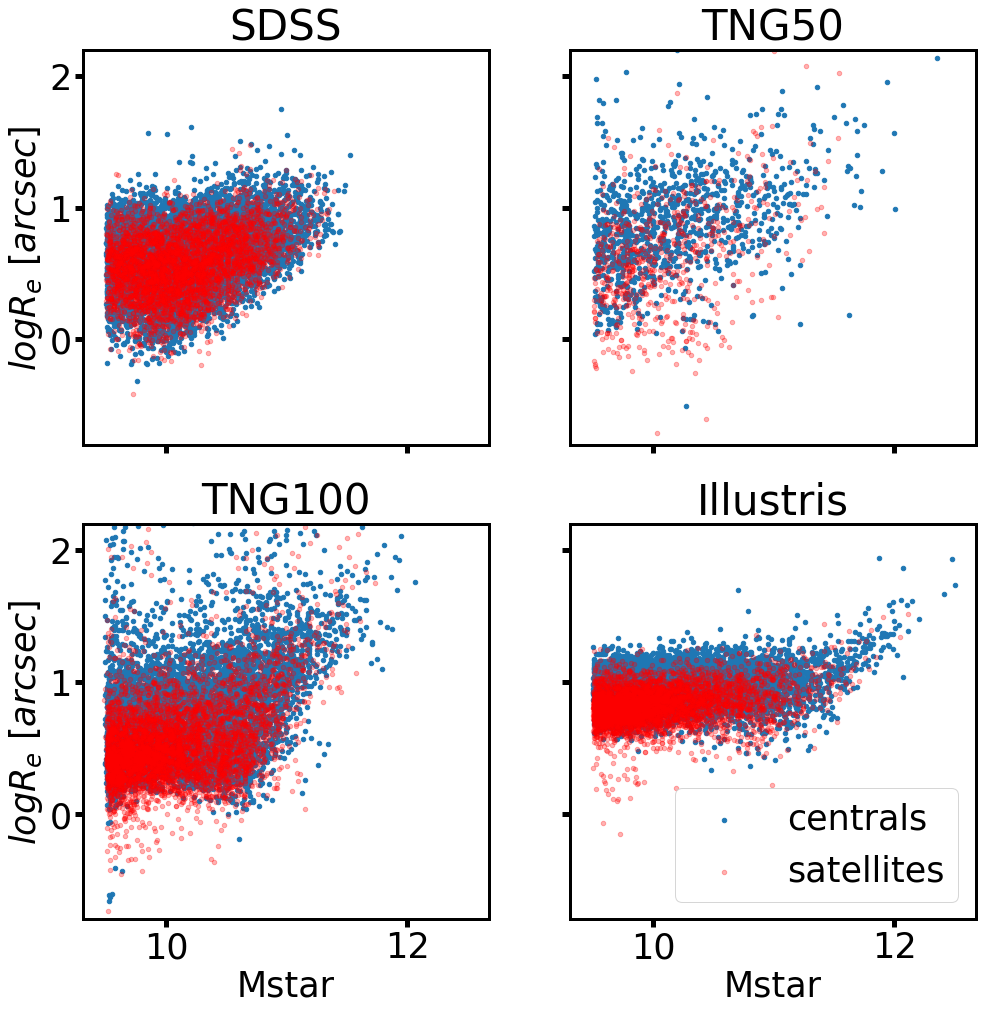

In [21]:
dsets = [SDSS_cen,TNG50_cen,TNG_cen,Illustris_cen]
titles = ['SDSS','TNG50','TNG100','Illustris']
fig,ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16,16))
for dset,(a,tit) in zip(dsets, zip(ax.ravel(),titles)):
    if tit=='Illustris':
        dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, label='centrals')
    else:
        dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a)
    a.set_title(tit)
dsets = [SDSS_sat,TNG50_sat,TNG_sat,Illustris_sat]
for dset,(a,tit) in zip(dsets, zip(ax.ravel(), titles)):
    if tit=='Illustris':
        dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, color='red',alpha=0.3, label='satellites')
    else:
        dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, color='red',alpha=0.3)
    a.set(ylim=(-0.8,2.2))
ax[1][1].legend(loc='lower right')

### Plot for all galaxies

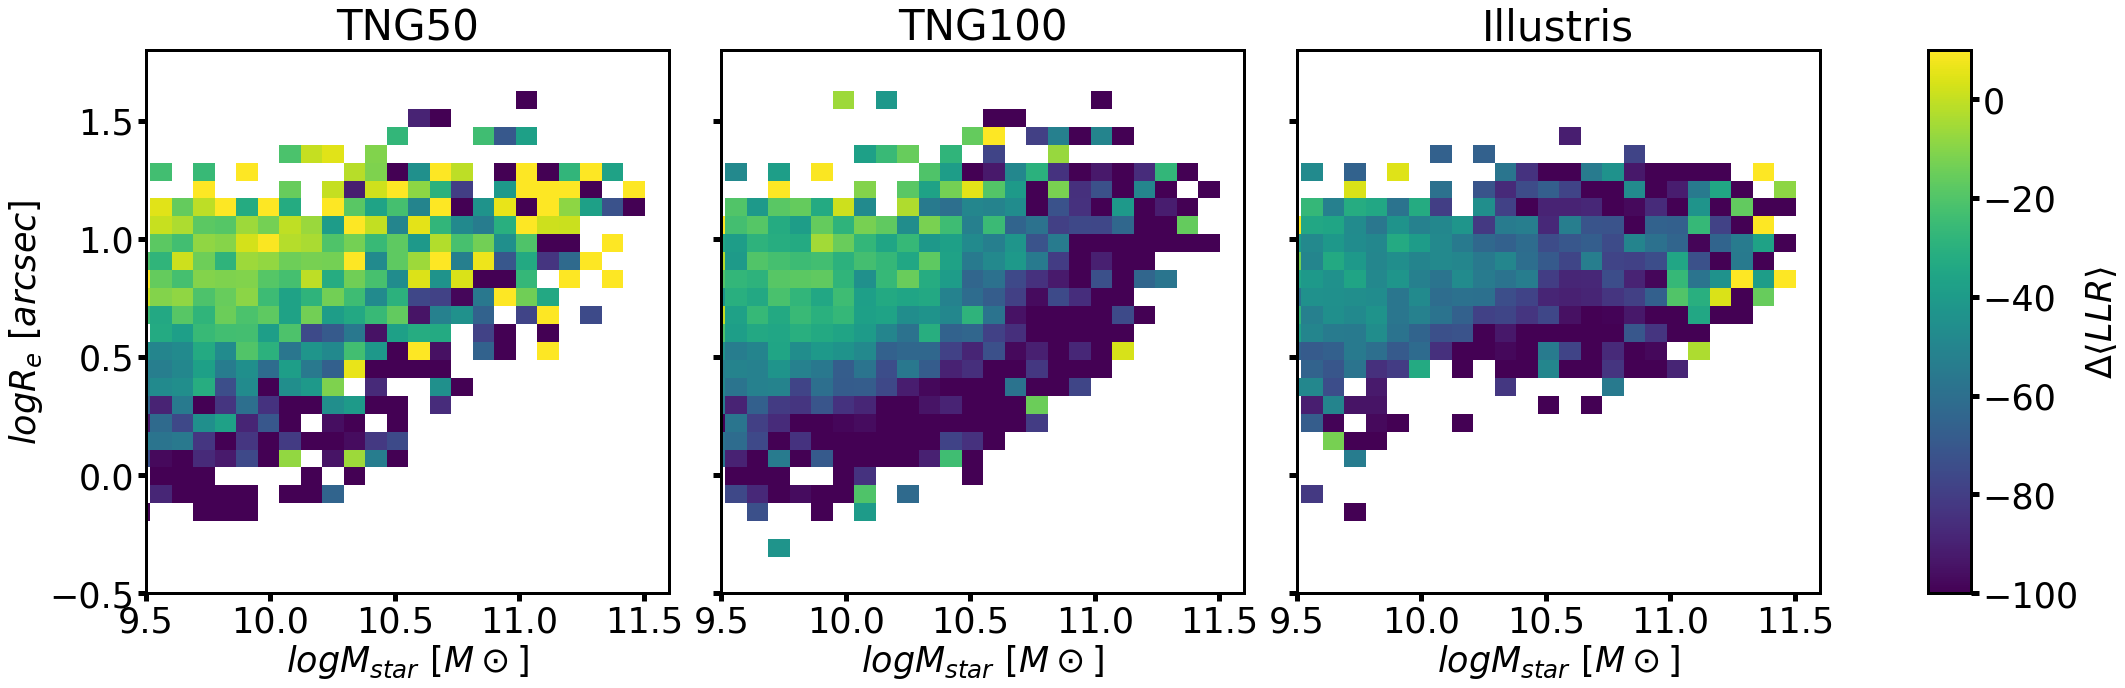

In [93]:
binsx = np.linspace(9,11.5,30)
binsy = np.linspace(-0.5,1.7,30)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS['Mstar'],SDSS['$logR_e \ [arcsec]$'], values=SDSS['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50,TNG,Illustris]
titles = ['TNG50','TNG100','Illustris']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mstar'],dset['$logR_e \ [arcsec]$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10, aspect='auto')
    a.set_xlim(9.5,11.6)
    a.set_ylim(-0.5,1.8)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    a.set_xticks([9.5,10,10.5,11,11.5])
    a.set_title(tit)
    a.set_xlabel('$logM_{star} \ [M\odot]$')
ax_[0].set_ylabel('$logR_e \ [arcsec]$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'$\Delta \langle LLR \rangle$')
#fig.tight_layout()
fig.savefig('./results/ScalingRelations/sizemass_all.pdf', bbox_inches='tight')


# annotate with cutouts

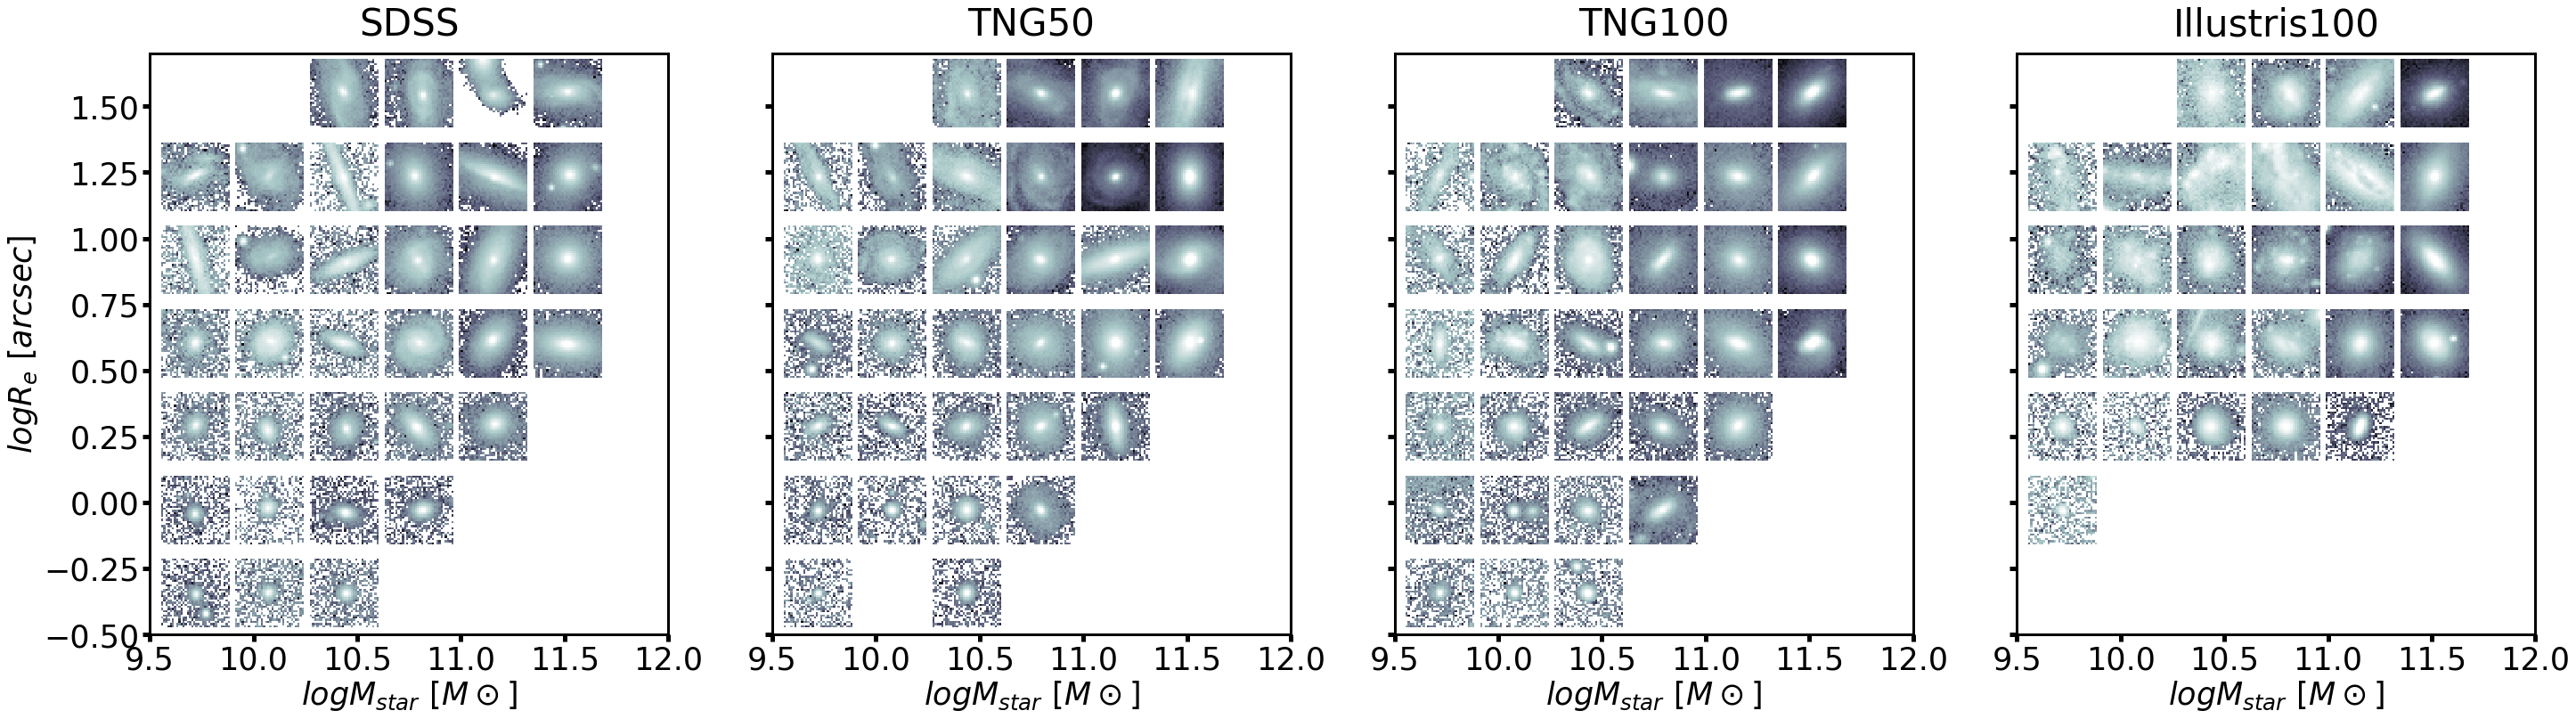

In [561]:
binsx = np.linspace(9.5,12,8)
binsy = np.linspace(-0.5,1.7,8)
stat_SDSS, x,y,_ = binned_statistic_2d(SDSS['Mstar'],SDSS['$logR_e \ [arcsec]$'], values=SDSS['LLR'], statistic='mean',bins=[binsx,binsy])
stat_dset, x,y,_ = binned_statistic_2d(TNG['Mstar'],TNG['$logR_e \ [arcsec]$'], values=TNG['LLR'],statistic='mean',bins=[binsx,binsy])
stat_dset = np.flipud(stat_dset.T) -np.flipud(stat_SDSS.T)


fig, ax = plt.subplots(1,4, figsize=(48,12), sharey=True)
for i in range(len(x)-1):
    for j in range(len(y)-1):
        check = 0
        ind = SDSS.query(r'{}<Mstar<{} & {}<Re<{}'.format(x[i],x[i+1],y[j],y[j+1]))
        
        try:
            ind = ind.sample().index.values[0]
            imagebox = OffsetImage(L_SDSS[ind], zoom=2.4,norm=colors.LogNorm(), cmap='bone')#,cmap='bone',norm=colors.LogNorm(),zoom=2)
            imagebox.image.axes = ax[0]
            xy = [(x[i]+x[i+1])/2, (y[j]+y[j+1])/2]
            ab = AnnotationBbox(imagebox, xy,
                           #     xybox=(50,-50),
                                xycoords='data',
                                pad=0,
                                boxcoords="offset points",
                               frameon=False)
            ax[0].add_artist(ab)
        except:
            check = 1
        
        
        if check == 0:
            
            ind = TNG50.query(r'{}<Mstar<{} & {}<Re<{}'.format(x[i],x[i+1],y[j],y[j+1]))

            try:
                ind = ind.sample().index.values[0]
                imagebox = OffsetImage(L_TNG50[ind], zoom=2.4,norm=colors.LogNorm(), cmap='bone')#,cmap='bone',norm=colors.LogNorm(),zoom=2)
                imagebox.image.axes = ax[1]
                xy = [(x[i]+x[i+1])/2, (y[j]+y[j+1])/2]
                ab = AnnotationBbox(imagebox, xy,
                               #     xybox=(50,-50),
                                    xycoords='data',
                                    pad=0,
                                    boxcoords="offset points",
                                   frameon=False)
                ax[1].add_artist(ab)
            except:
                pass
            
            try:
                ind = TNG.query(r'{}<Mstar<{} & {}<Re<{}'.format(x[i],x[i+1],y[j],y[j+1]))
                ind = ind.sample().index.values[0]
                imagebox = OffsetImage(L_TNG[ind], zoom=2.4,norm=colors.LogNorm(), cmap='bone')#,cmap='bone',norm=colors.LogNorm(),zoom=2)
                imagebox.image.axes = ax[2]
                xy = [(x[i]+x[i+1])/2, (y[j]+y[j+1])/2]
                ab = AnnotationBbox(imagebox, xy,
                               #     xybox=(50,-50),
                                    xycoords='data',
                                    pad=0,
                                    boxcoords="offset points",
                                   frameon=False)
                ax[2].add_artist(ab)
            except:
                pass
            
            ind = Illustris.query(r'{}<Mstar<{} & {}<Re<{}'.format(x[i],x[i+1],y[j],y[j+1]))

            try:
                ind = ind.sample().index.values[0]
                imagebox = OffsetImage(L_Illustris[ind], zoom=2.4,norm=colors.LogNorm(), cmap='bone')#,cmap='bone',norm=colors.LogNorm(),zoom=2)
                imagebox.image.axes = ax[3]
                xy = [(x[i]+x[i+1])/2, (y[j]+y[j+1])/2]
                ab = AnnotationBbox(imagebox, xy,
                               #     xybox=(50,-50),
                                    xycoords='data',
                                    pad=0,
                                    boxcoords="offset points",
                                   frameon=False)
                ax[3].add_artist(ab)
            except:
                pass
        
        


for a,t in zip(ax.ravel(),['SDSS','TNG50','TNG100','Illustris100']):        
    a.set_xlim(9.5,12)
    a.set_ylim(-0.5,1.7)
    a.set_title(t)
    a.set_xlabel('$logM_{star} \ [M\odot]$')
ax[0].set_ylabel('$logR_e \ [arcsec]$')
plt.savefig('./results/LLR_L_trends/sizemass_data_cutout.pdf', bbox_inches='tight')

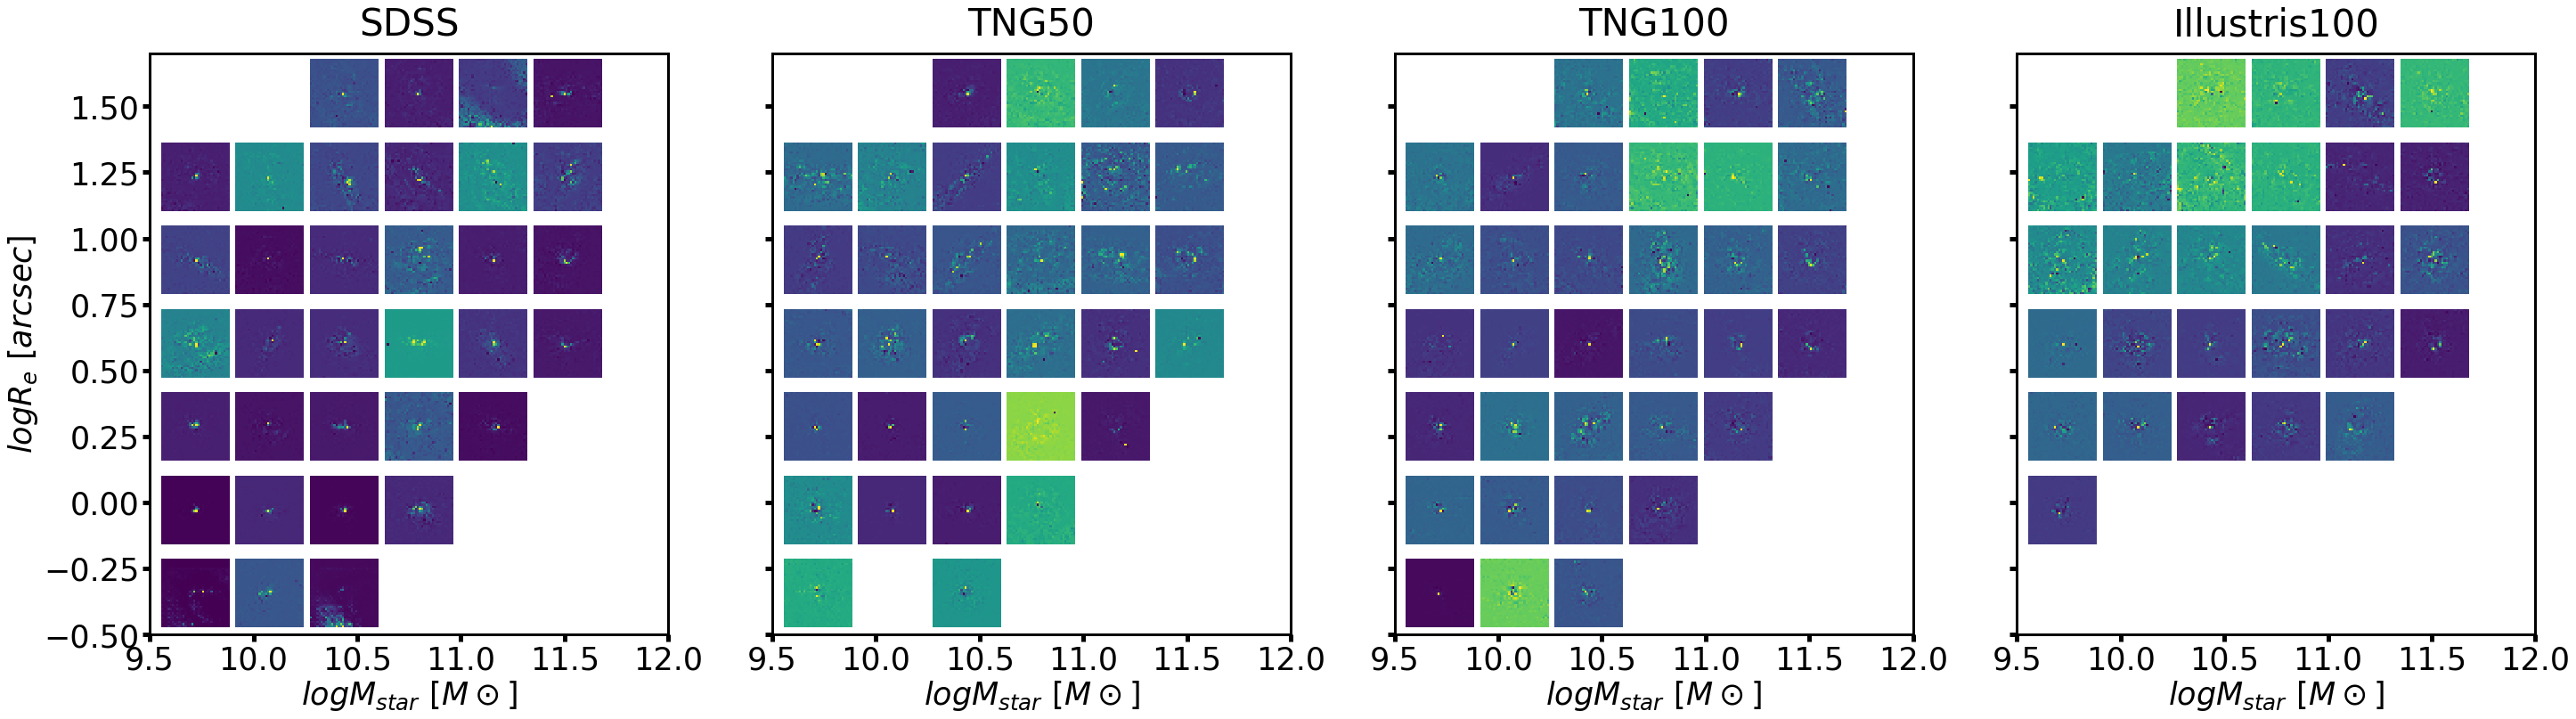

In [570]:
binsx = np.linspace(9.5,12,8)
binsy = np.linspace(-0.5,1.7,8)
stat_SDSS, x,y,_ = binned_statistic_2d(SDSS['Mstar'],SDSS['$logR_e \ [arcsec]$'], values=SDSS['LLR'], statistic='mean',bins=[binsx,binsy])
stat_dset, x,y,_ = binned_statistic_2d(TNG['Mstar'],TNG['$logR_e \ [arcsec]$'], values=TNG['LLR'],statistic='mean',bins=[binsx,binsy])
stat_dset = np.flipud(stat_dset.T) -np.flipud(stat_SDSS.T)


fig, ax = plt.subplots(1,4, figsize=(48,12), sharey=True)
for i in range(len(x)-1):
    for j in range(len(y)-1):
        check = 0
        ind = SDSS.query(r'{}<Mstar<{} & {}<Re<{}'.format(x[i],x[i+1],y[j],y[j+1]))
        
        try:
            ind = ind.sample().index.values[0]
            imagebox = OffsetImage(LLR_SDSS[ind], zoom=2.4)#,norm=colors.LogNorm(), cmap='bone')#,cmap='bone',norm=colors.LogNorm(),zoom=2)
            imagebox.image.axes = ax[0]
            xy = [(x[i]+x[i+1])/2, (y[j]+y[j+1])/2]
            ab = AnnotationBbox(imagebox, xy,
                           #     xybox=(50,-50),
                                xycoords='data',
                                pad=0,
                                boxcoords="offset points",
                               frameon=False)
            ax[0].add_artist(ab)
        except:
            check = 1
        
        
        if check == 0:
            
            ind = TNG50.query(r'{}<Mstar<{} & {}<Re<{}'.format(x[i],x[i+1],y[j],y[j+1]))

            try:
                ind = ind.sample().index.values[0]
                imagebox = OffsetImage(LLR_TNG50[ind], zoom=2.4)#,norm=colors.LogNorm(), cmap='bone')#,cmap='bone',norm=colors.LogNorm(),zoom=2)
                imagebox.image.axes = ax[1]
                xy = [(x[i]+x[i+1])/2, (y[j]+y[j+1])/2]
                ab = AnnotationBbox(imagebox, xy,
                               #     xybox=(50,-50),
                                    xycoords='data',
                                    pad=0,
                                    boxcoords="offset points",
                                   frameon=False)
                ax[1].add_artist(ab)
            except:
                pass
            
            try:
                ind = TNG.query(r'{}<Mstar<{} & {}<Re<{}'.format(x[i],x[i+1],y[j],y[j+1]))
                ind = ind.sample().index.values[0]
                imagebox = OffsetImage(LLR_TNG[ind], zoom=2.4)#,norm=colors.LogNorm(), cmap='bone')#,cmap='bone',norm=colors.LogNorm(),zoom=2)
                imagebox.image.axes = ax[2]
                xy = [(x[i]+x[i+1])/2, (y[j]+y[j+1])/2]
                ab = AnnotationBbox(imagebox, xy,
                               #     xybox=(50,-50),
                                    xycoords='data',
                                    pad=0,
                                    boxcoords="offset points",
                                   frameon=False)
                ax[2].add_artist(ab)
            except:
                pass
            
            ind = Illustris.query(r'{}<Mstar<{} & {}<Re<{}'.format(x[i],x[i+1],y[j],y[j+1]))

            try:
                ind = ind.sample().index.values[0]
                imagebox = OffsetImage(LLR_Illustris[ind], zoom=2.4)#,norm=colors.LogNorm(), cmap='bone')#,cmap='bone',norm=colors.LogNorm(),zoom=2)
                imagebox.image.axes = ax[3]
                xy = [(x[i]+x[i+1])/2, (y[j]+y[j+1])/2]
                ab = AnnotationBbox(imagebox, xy,
                               #     xybox=(50,-50),
                                    xycoords='data',
                                    pad=0,
                                    boxcoords="offset points",
                                   frameon=False)
                ax[3].add_artist(ab)
            except:
                pass
        
        


for a,t in zip(ax.ravel(),['SDSS','TNG50','TNG100','Illustris100']):        
    a.set_xlim(9.5,12)
    a.set_ylim(-0.5,1.7)
    a.set_title(t)
    a.set_xlabel('$logM_{star} \ [M\odot]$')
ax[0].set_ylabel('$logR_e \ [arcsec]$')
plt.savefig('./results/LLR_L_trends/sizemass_LLR)#_cutout.pdf', bbox_inches='tight')

In [ ]:
sind = SDSS_Q.query('Re<0.5 & n_bulge>4')
tind = TNG50_Q.query('Re<0.5 & n_bulge>4')


In [699]:
sind = SDSS_Q.query('Re<0.5 & n_bulge>4').sample(16).index.values
tind = TNG50_Q.query('Re<0.5 & n_bulge>4').sample(16).index.values


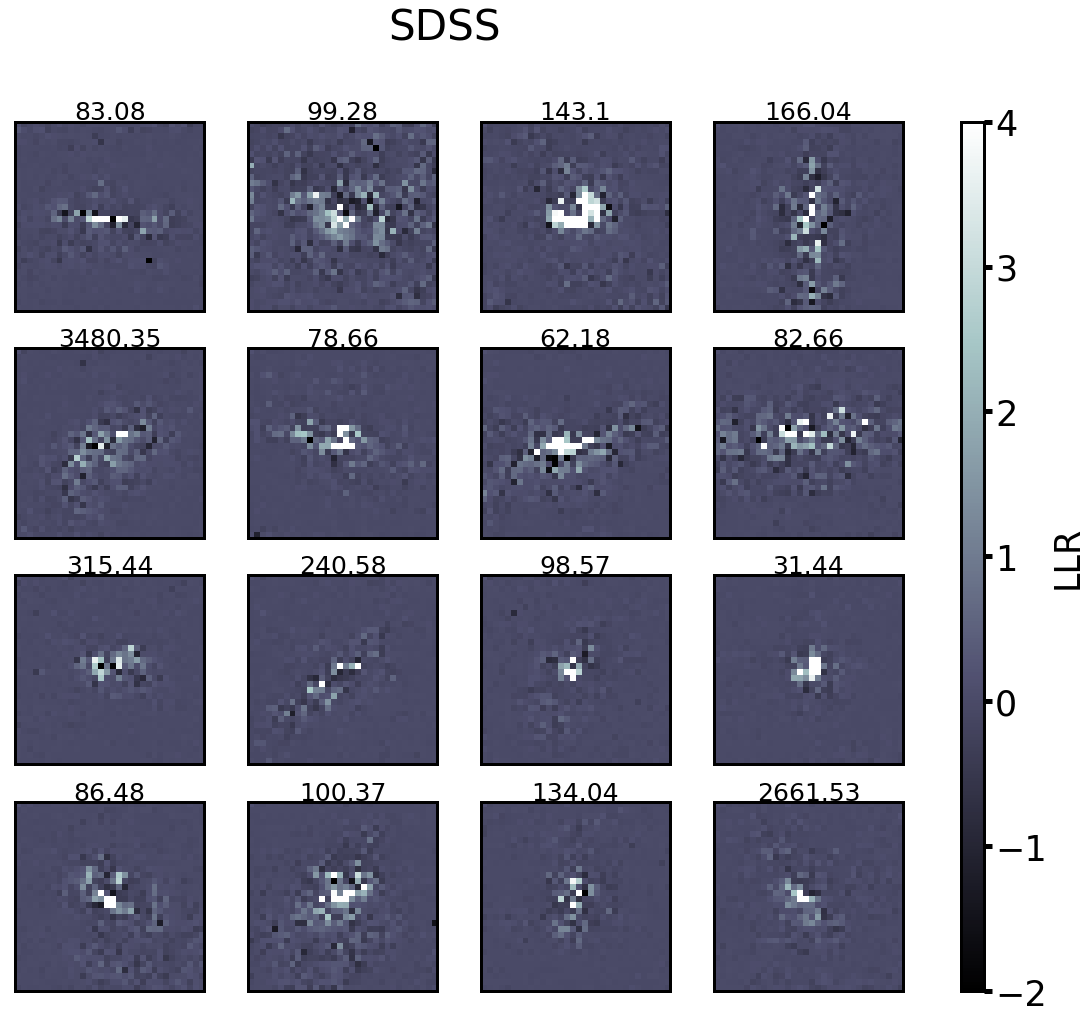

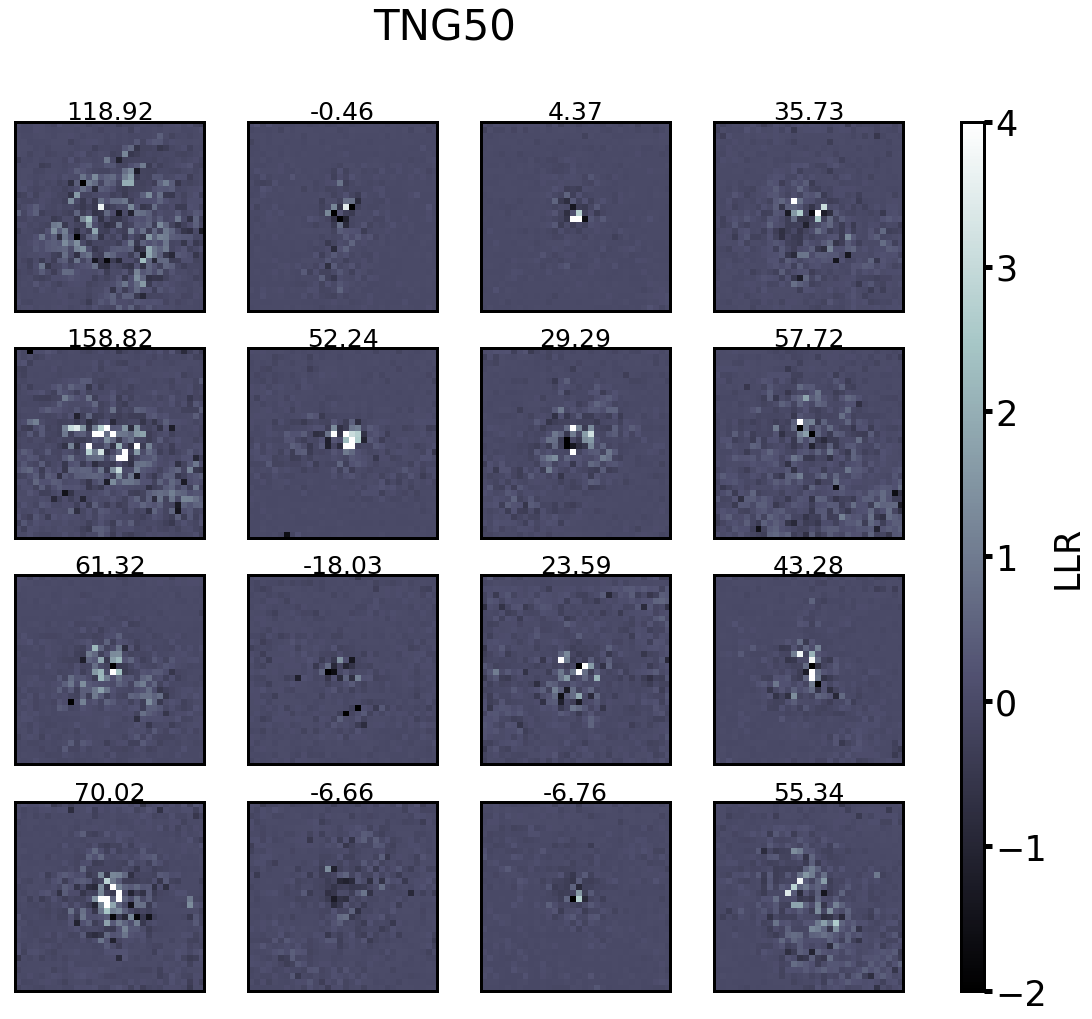

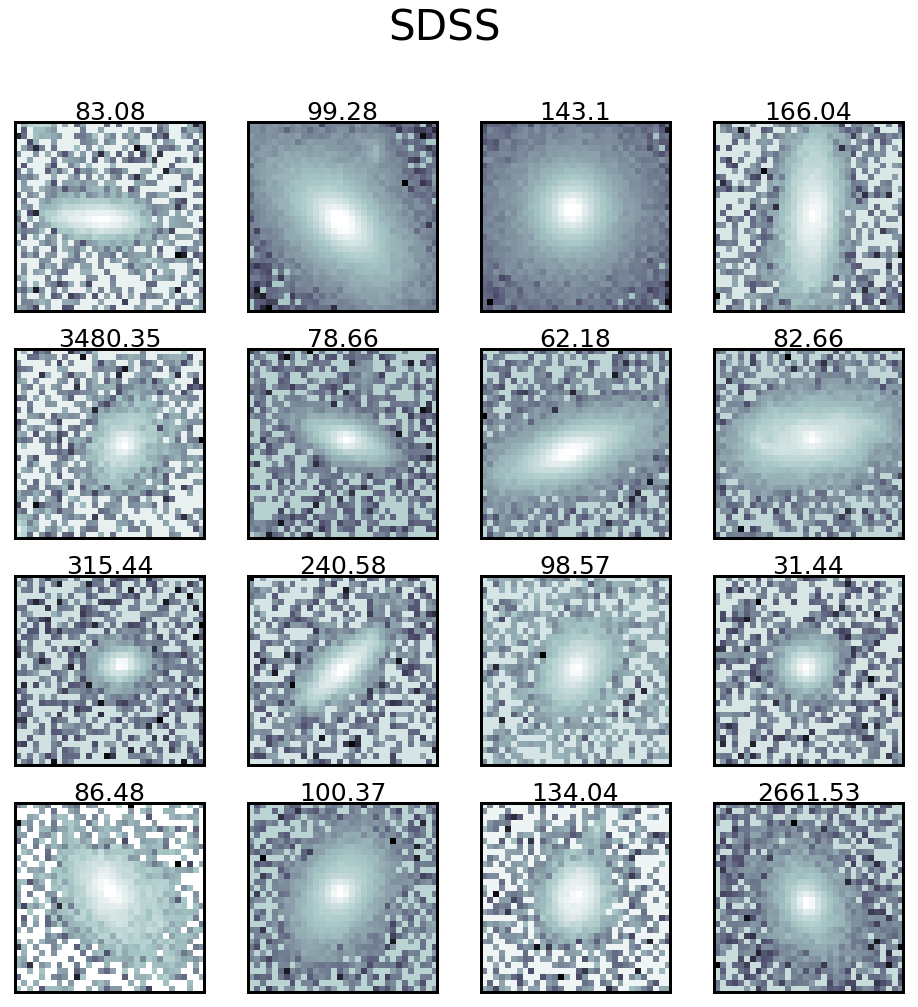

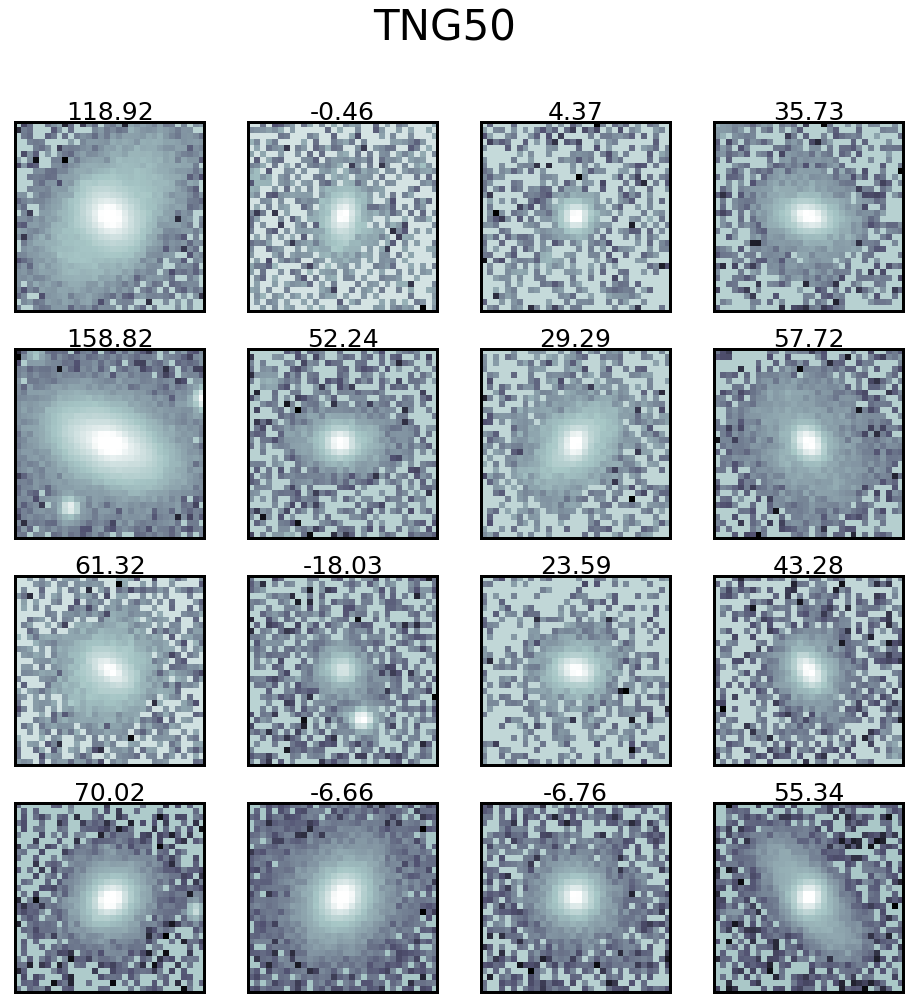

In [737]:

fig, ax = plt.subplots(4,4, figsize=(16,16))
fig1, ax1 = plt.subplots(4,4, figsize=(16,16))
for a, (a1,t,s) in zip(ax.ravel(), zip(ax1.ravel(),tind, sind)):
    img = LLR_SDSS[s]
   # img[img<0] = 0.1
    im = a.imshow(img, vmax=4,vmin=-2,cmap='bone')#, norm=colors.LogNorm(), cmap='bone')
    img = LLR_TNG50[t]
    #img[img<0] = 0.1
    im1 = a1.imshow(img, vmax=4,vmin=-2,cmap='bone')#, norm=colors.LogNorm(), cmap='bone')
    a.set_title(np.round(SDSS_Q.loc[s,'LLR'],2),fontsize=25)
    a1.set_title(np.round(TNG50_Q.loc[t,'LLR'],2),fontsize=25)
    a1.tick_params(axis='both',which='both',bottom=False, left=False, labelleft=False, labelbottom=False)
    a.tick_params(axis='both',which='both',bottom=False, left=False, labelleft=False, labelbottom=False)
fig.suptitle('SDSS')
fig1.suptitle('TNG50')
cax1 = fig.add_axes([ax[-1][-1].get_position().x1+0.05,ax[-1][-1].get_position().y0,0.02,ax[0][-1].get_position().y1-ax[-1][-1].get_position().y0])
cbar = fig.colorbar(im, cax=cax1)
cbar.set_label('LLR')

cax = fig1.add_axes([ax[-1][-1].get_position().x1+0.05,ax[-1][-1].get_position().y0,0.02,ax[0][-1].get_position().y1-ax[-1][-1].get_position().y0])
cbar = fig1.colorbar(im, cax=cax)
cbar.set_label('LLR')
fig.savefig('./results/prova/SDSS_Q_LLR_compact.pdf',bbox_inches='tight')
fig1.savefig('./results/prova/TNG50_Q_LLR_compact.pdf',bbox_inches='tight')



fig, ax = plt.subplots(4,4, figsize=(16,16))
fig1, ax1 = plt.subplots(4,4, figsize=(16,16))
for a, (a1,t,s) in zip(ax.ravel(), zip(ax1.ravel(),tind, sind)):
    img = L_SDSS[s]
    img[img<0] = 0.1
    a.imshow(img, norm=colors.LogNorm(),cmap='bone')#, vmax=100,vmin=-100)
    img = L_TNG50[t]
    img[img<0] = 0.1
    a1.imshow(img, norm=colors.LogNorm(),cmap='bone')#,vmax=100,vmin=-100)
    a.set_title(np.round(SDSS_Q.loc[s,'LLR'],2),fontsize=25)
    a1.set_title(np.round(TNG50_Q.loc[t,'LLR'],2),fontsize=25)
    a1.tick_params(axis='both',which='both',bottom=False, left=False, labelleft=False, labelbottom=False)
    a.tick_params(axis='both',which='both',bottom=False, left=False, labelleft=False, labelbottom=False)
fig.suptitle('SDSS')
fig1.suptitle('TNG50')
fig.savefig('./results/prova/SDSS_Q_compact.pdf', bbox_inches='tight')
fig1.savefig('./results/prova/TNG50_Q_compact.pdf', bbox_inches='tight')

In [719]:
np.log10(0.396*2*3)

0.375846436309156

In [ ]:
sind = SDSS_SF.sample(16).index.values
tind = TNG50_SF.sample(16).index.values


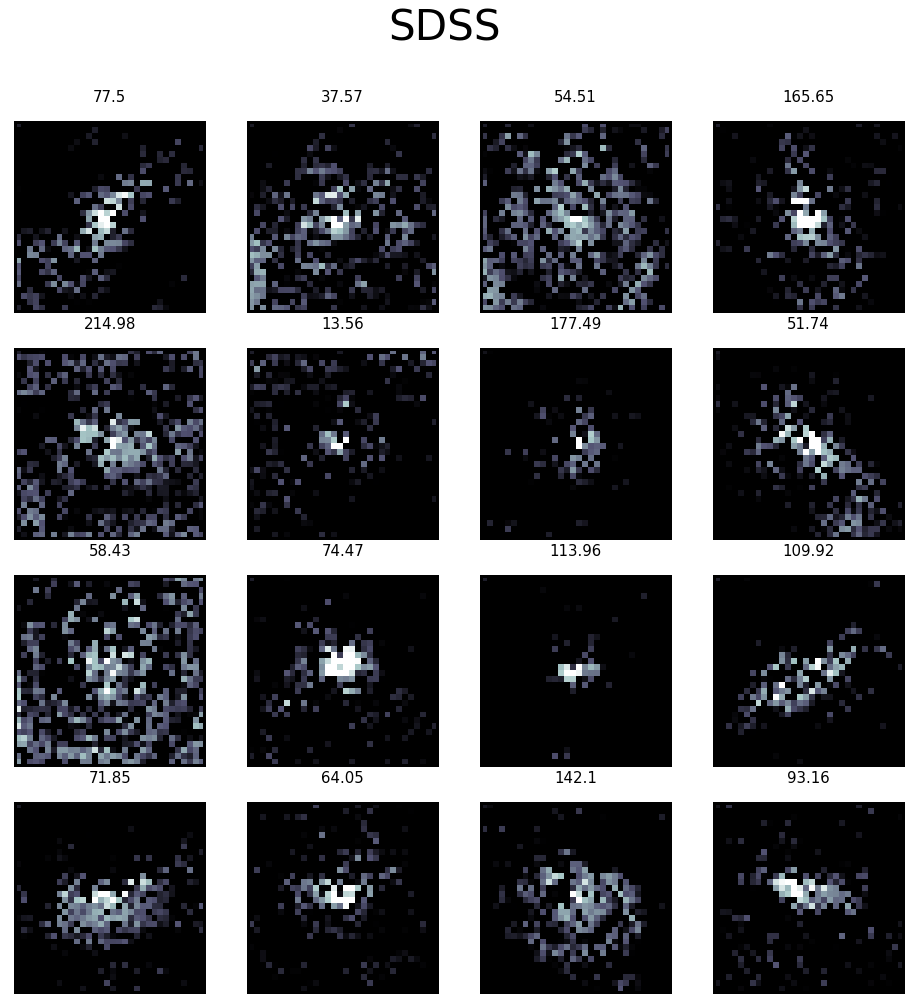

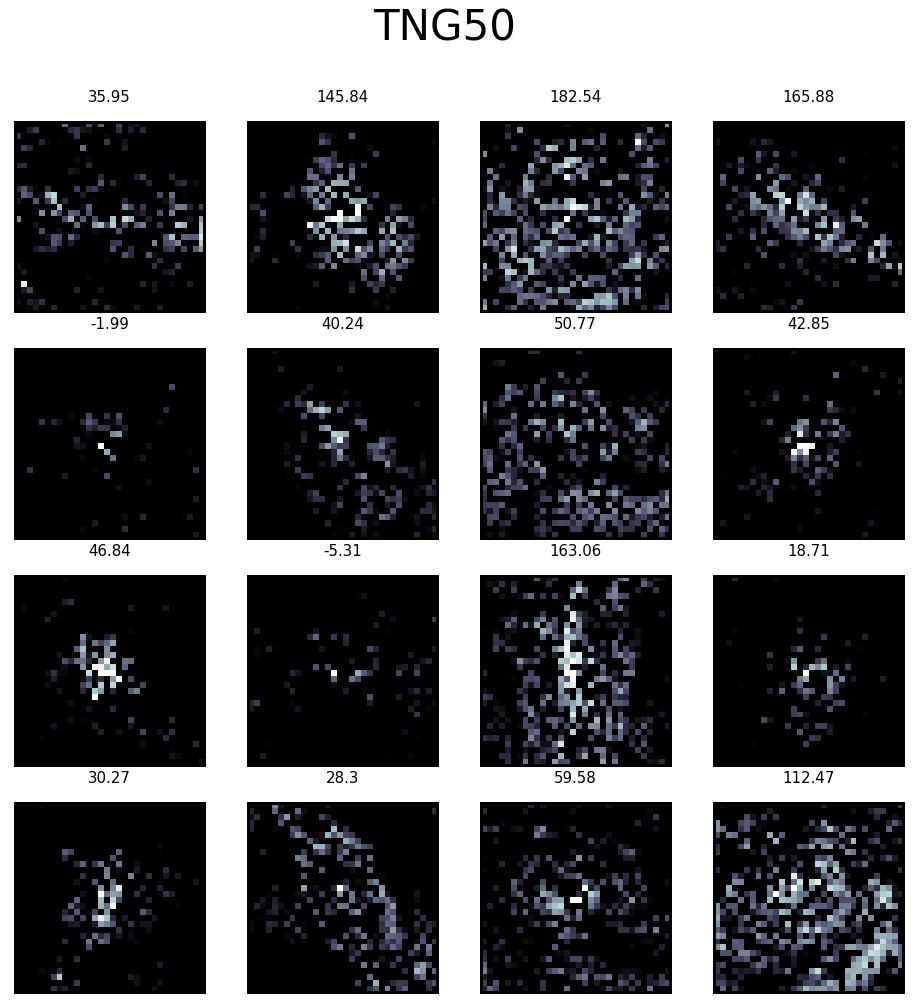

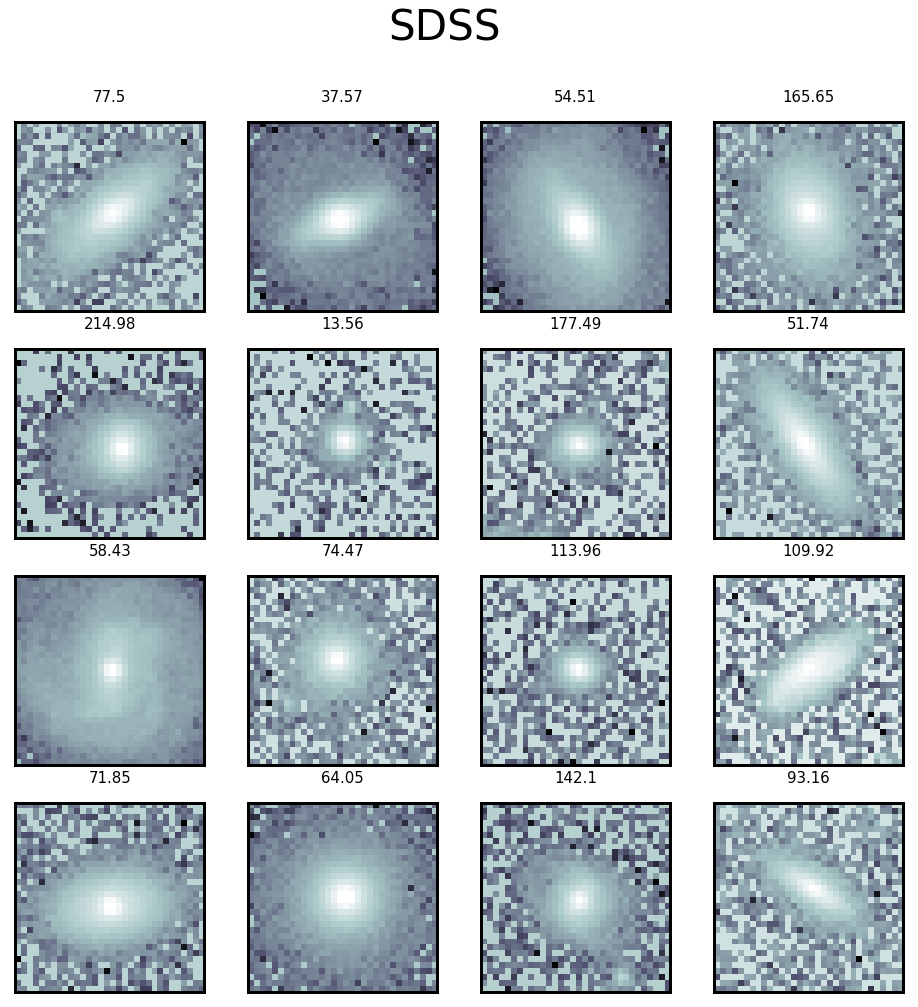

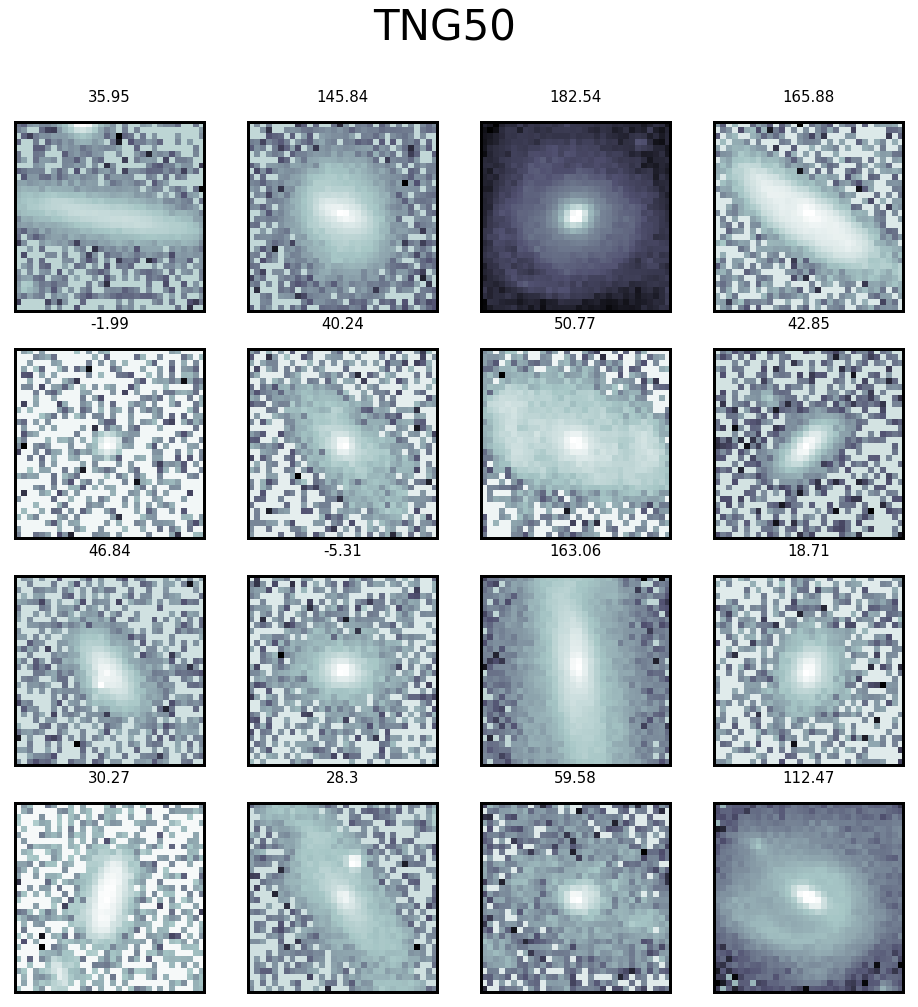

In [643]:

fig, ax = plt.subplots(4,4, figsize=(16,16))
fig1, ax1 = plt.subplots(4,4, figsize=(16,16))
for a, (a1,t,s) in zip(ax.ravel(), zip(ax1.ravel(),tind, sind)):
    img = LLR_SDSS[s]
    img[img<0] = 0.1
    a.imshow(img, vmax=5,vmin=0.1, norm=colors.LogNorm(), cmap='bone')
    img = LLR_TNG50[t]
    img[img<0] = 0.1
    a1.imshow(img, vmax=5,vmin=0.1, norm=colors.LogNorm(), cmap='bone')
    a.set_title(np.round(SDSS_SF.loc[s,'LLR'],2),fontsize=15)
    a1.set_title(np.round(TNG50_SF.loc[t,'LLR'],2),fontsize=15)
    a1.tick_params(axis='both',which='both',bottom=False, left=False, labelleft=False, labelbottom=False)
    a.tick_params(axis='both',which='both',bottom=False, left=False, labelleft=False, labelbottom=False)
fig.suptitle('SDSS')
fig1.suptitle('TNG50')
fig.savefig('./results/prova/SDSS_SF_LLR.pdf',bbox_inches='tight')
fig1.savefig('./results/prova/TNG50_SF_LLR.pdf',bbox_inches='tight')



fig, ax = plt.subplots(4,4, figsize=(16,16))
fig1, ax1 = plt.subplots(4,4, figsize=(16,16))
for a, (a1,t,s) in zip(ax.ravel(), zip(ax1.ravel(),tind, sind)):
    img = L_SDSS[s]
    img[img<0] = 0.1
    a.imshow(img, norm=colors.LogNorm(),cmap='bone')#, vmax=100,vmin=-100)
    img = L_TNG50[t]
    img[img<0] = 0.1
    a1.imshow(img, norm=colors.LogNorm(),cmap='bone')#,vmax=100,vmin=-100)
    a.set_title(np.round(SDSS_SF.loc[s,'LLR'],2),fontsize=15)
    a1.set_title(np.round(TNG50_SF.loc[t,'LLR'],2),fontsize=15)
    a1.tick_params(axis='both',which='both',bottom=False, left=False, labelleft=False, labelbottom=False)
    a.tick_params(axis='both',which='both',bottom=False, left=False, labelleft=False, labelbottom=False)
fig.suptitle('SDSS')
fig1.suptitle('TNG50')
fig.savefig('./results/prova/SDSS_SF.pdf', bbox_inches='tight')
fig1.savefig('./results/prova/TNG50_SF.pdf', bbox_inches='tight')

In [709]:
r,theta,rbin,thetabin = reproject_image_into_polar(L_SDSS[0])

In [711]:
r

array([[22.627417  , 21.9317122 , 21.26029163, ..., 20.61552813,
        21.26029163, 21.9317122 ],
       [21.9317122 , 21.21320344, 20.51828453, ..., 19.84943324,
        20.51828453, 21.21320344],
       [21.26029163, 20.51828453, 19.79898987, ..., 19.10497317,
        19.79898987, 20.51828453],
       ...,
       [20.61552813, 19.84943324, 19.10497317, ..., 18.38477631,
        19.10497317, 19.84943324],
       [21.26029163, 20.51828453, 19.79898987, ..., 19.10497317,
        19.79898987, 20.51828453],
       [21.9317122 , 21.21320344, 20.51828453, ..., 19.84943324,
        20.51828453, 21.21320344]])

In [712]:
L_SDSS[0]

array([[ 0.00376523,  0.00069029, -0.01055859, ...,  0.00298015,
        -0.00502022,  0.0041594 ],
       [-0.00034002, -0.0038634 ,  0.00138138, ..., -0.00465316,
         0.00494751,  0.0076889 ],
       [-0.00262472, -0.00017833,  0.00127753, ..., -0.00405071,
         0.00163525,  0.003229  ],
       ...,
       [-0.00378098, -0.00491879, -0.00103867, ...,  0.0057886 ,
        -0.00611247,  0.00401925],
       [ 0.00045925, -0.00420725, -0.00200699, ..., -0.00511618,
         0.00700278,  0.00676673],
       [ 0.00595766,  0.01054409, -0.0122877 , ..., -0.00523515,
        -0.00330257, -0.00329471]])

### plot for quiescent

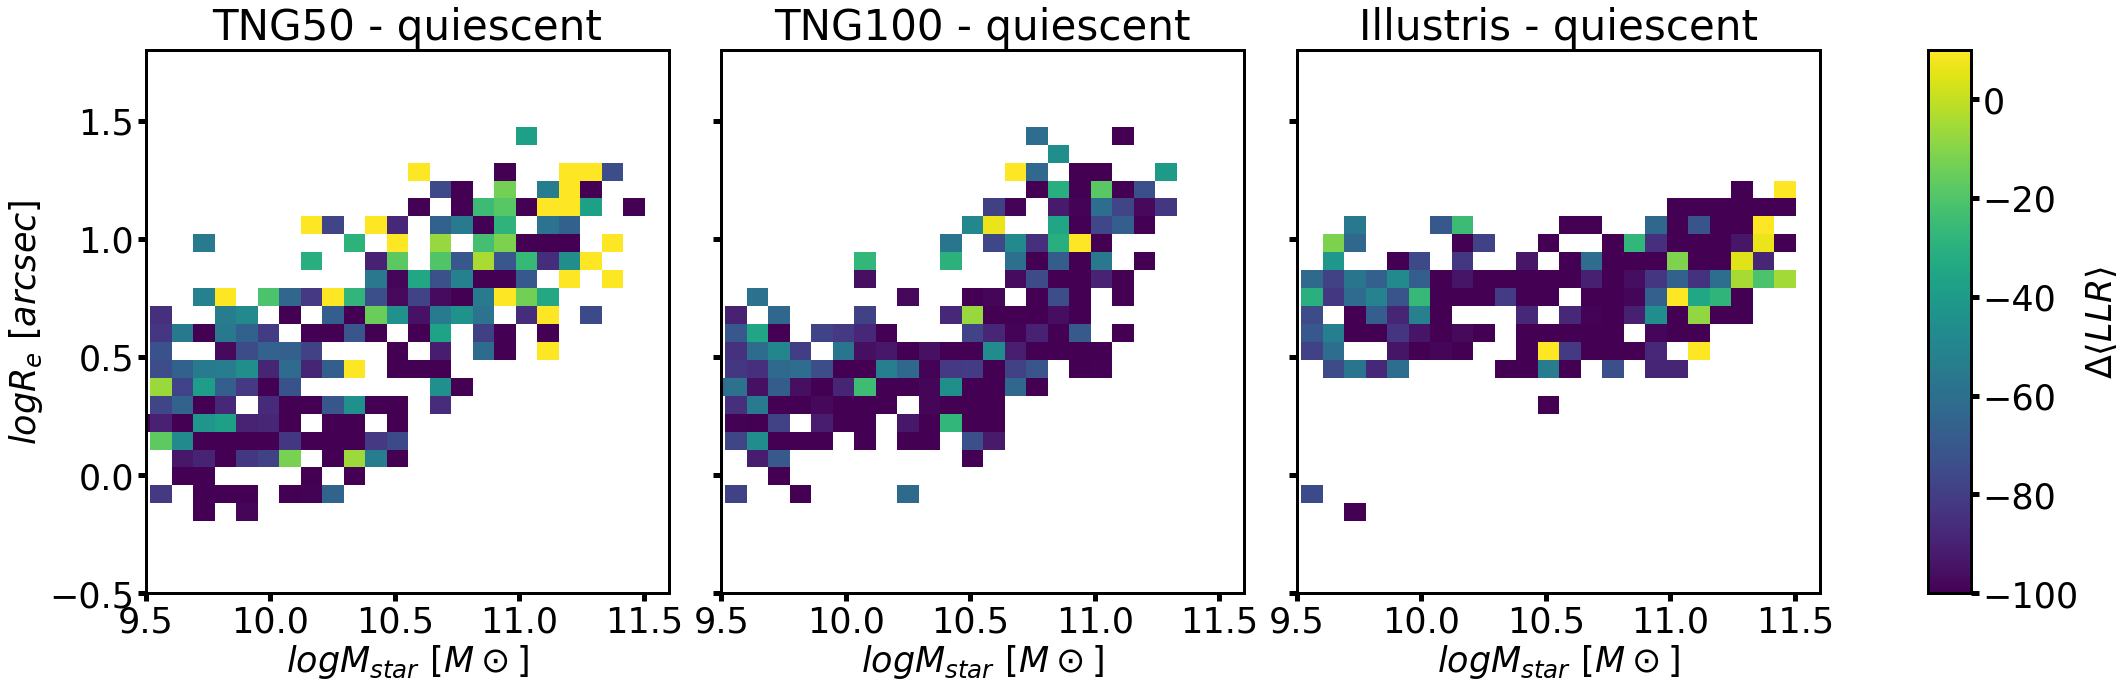

In [40]:
binsx = np.linspace(9,11.5,30)
binsy = np.linspace(-0.5,1.7,30)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_Q['Mstar'],SDSS_Q['$logR_e \ [arcsec]$'], values=SDSS_Q['LLR'], statistic='mean',bins=[binsx,binsy])

#dsets = [TNG50_Q,TNG_Q,Illustris_Q]
dsets = [TNG50_Q,TNG_Q.sample(frac=(len(TNG50_Q)/len(TNG_Q))),Illustris_Q.sample(frac=(len(TNG50_Q)/len(Illustris_Q)))]#

titles = ['TNG50 - quiescent','TNG100 - quiescent','Illustris - quiescent']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mstar'],dset['$logR_e \ [arcsec]$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10, aspect='auto')
    a.set_xlim(9.5,11.6)
    a.set_ylim(-0.5,1.8)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    a.set_xticks([9.5,10,10.5,11,11.5])

    a.set_xlabel('$logM_{star} \ [M\odot]$')

    a.set_title(tit)
ax_[0].set_ylabel('$logR_e \ [arcsec]$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'$\Delta \langle LLR \rangle$')
fig.savefig('./results/ScalingRelations/sizemass_Q_resampled.pdf', bbox_inches='tight')


### plot for star forming

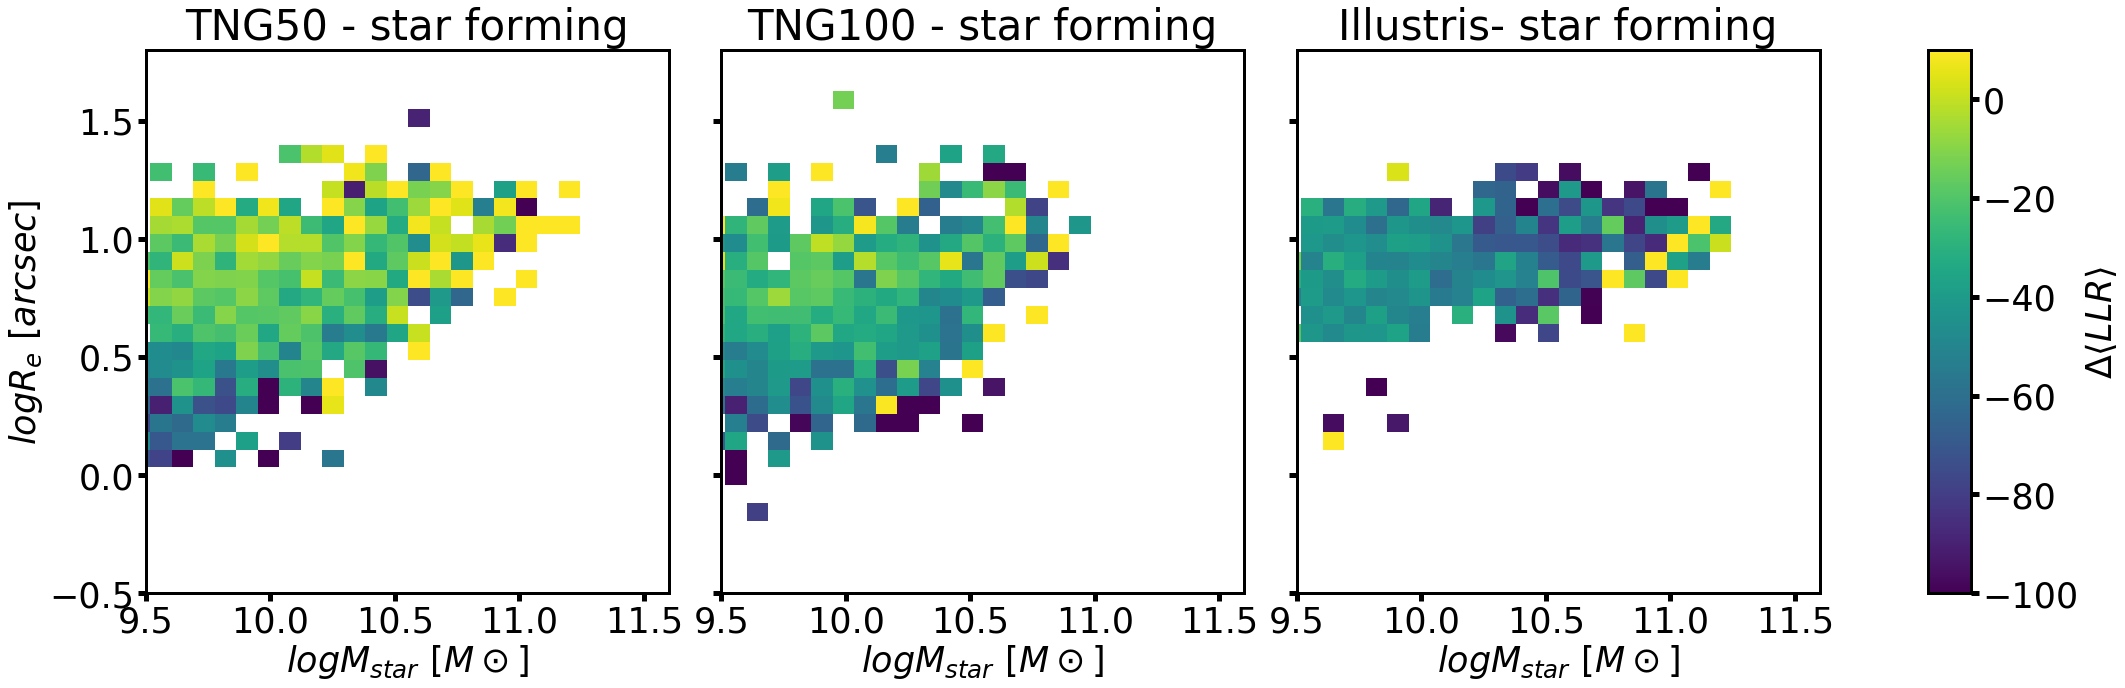

In [36]:
binsx = np.linspace(9,11.5,30)
binsy = np.linspace(-0.5,1.7,30)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_SF['Mstar'],SDSS_SF['$logR_e \ [arcsec]$'], values=SDSS_SF['LLR'], statistic='mean',bins=[binsx,binsy])

#dsets = [TNG50_SF,TNG_SF,Illustris_SF]#
dsets = [TNG50_SF,TNG_SF.sample(frac=(len(TNG50_SF)/len(TNG_SF))),Illustris_SF.sample(frac=(len(TNG50_SF)/len(Illustris_SF)))]#

titles = ['TNG50 - star forming','TNG100 - star forming','Illustris- star forming']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mstar'],dset['$logR_e \ [arcsec]$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10, aspect='auto')
    a.set_xlim(9.5,11.6)
    a.set_ylim(-0.5,1.8)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    a.set_xticks([9.5,10,10.5,11,11.5])

    a.set_xlabel('$logM_{star} \ [M\odot]$')

ax_[0].set_ylabel('$logR_e \ [arcsec]$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'$\Delta \langle LLR \rangle$')
fig.savefig('./results/ScalingRelations/sizemass_SF_resampled.pdf', bbox_inches='tight')


### plot for centrals

AttributeError: 'numpy.ndarray' object has no attribute 'get_position'

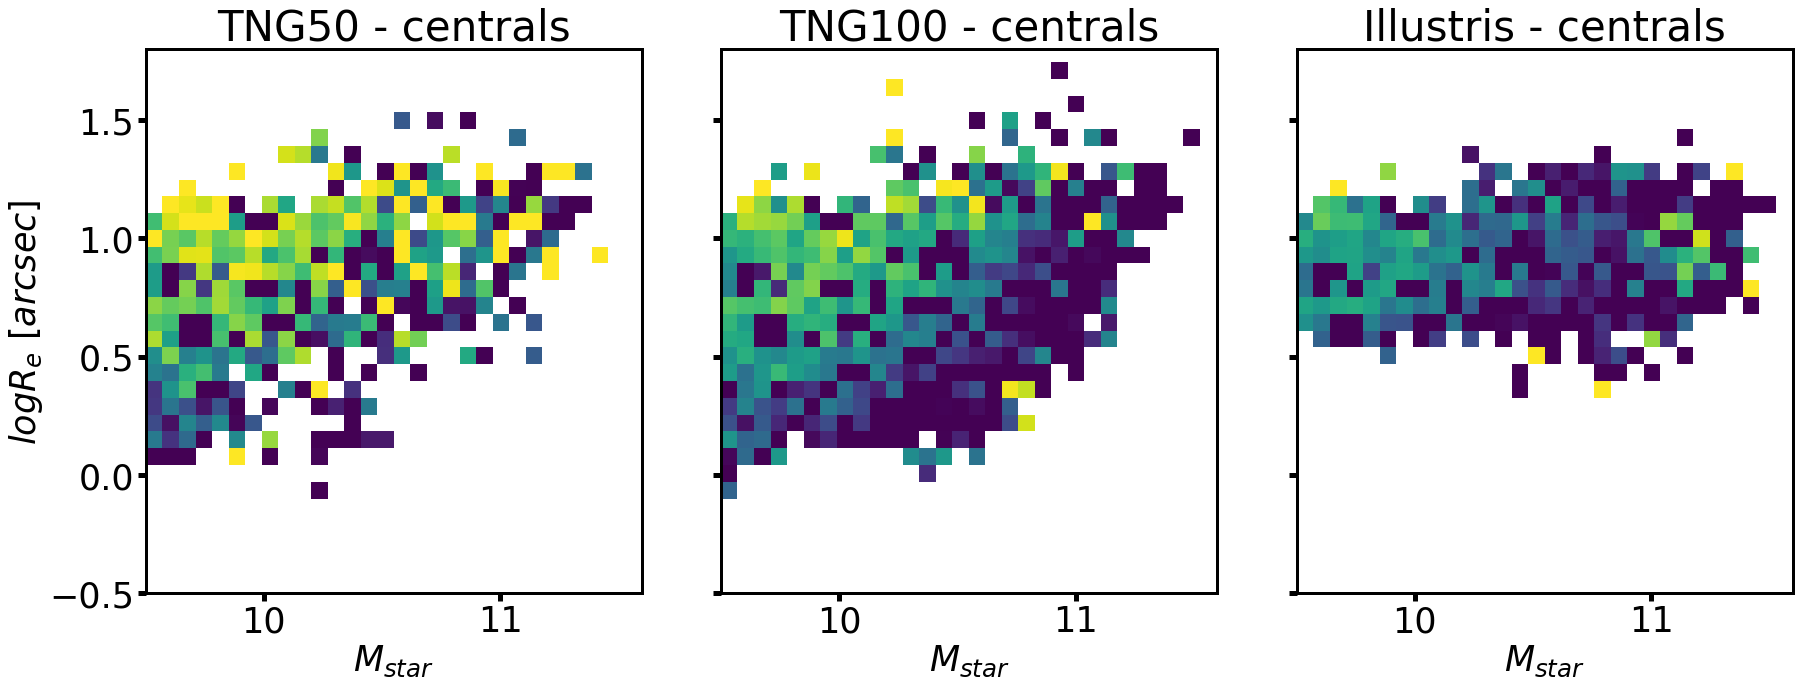

In [44]:
binsx = np.linspace(SDSS_cen['Mstar'].min(), SDSS_cen['Mstar'].max(),30)
binsy = np.linspace(SDSS_cen['$logR_e \ [arcsec]$'].min(), SDSS_cen['$logR_e \ [arcsec]$'].max(),30)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_cen['Mstar'],SDSS_cen['$logR_e \ [arcsec]$'], values=SDSS_cen['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_cen,TNG_cen,Illustris_cen]
titles = ['TNG50 - centrals','TNG100 - centrals','Illustris - centrals']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mstar'],dset['$logR_e \ [arcsec]$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10)
    a.set_xlim(9.5,11.6)
    a.set_ylim(-0.5,1.8)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    a.set_xlabel('$M_{star}$')
ax_[0].set_ylabel('$logR_e \ [arcsec]$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax[-1].get_position().x1+0.05,ax[1].get_position().y0,0.02,ax[0].get_position().y1-ax[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('LLR-LLR$_{SDSS}$')

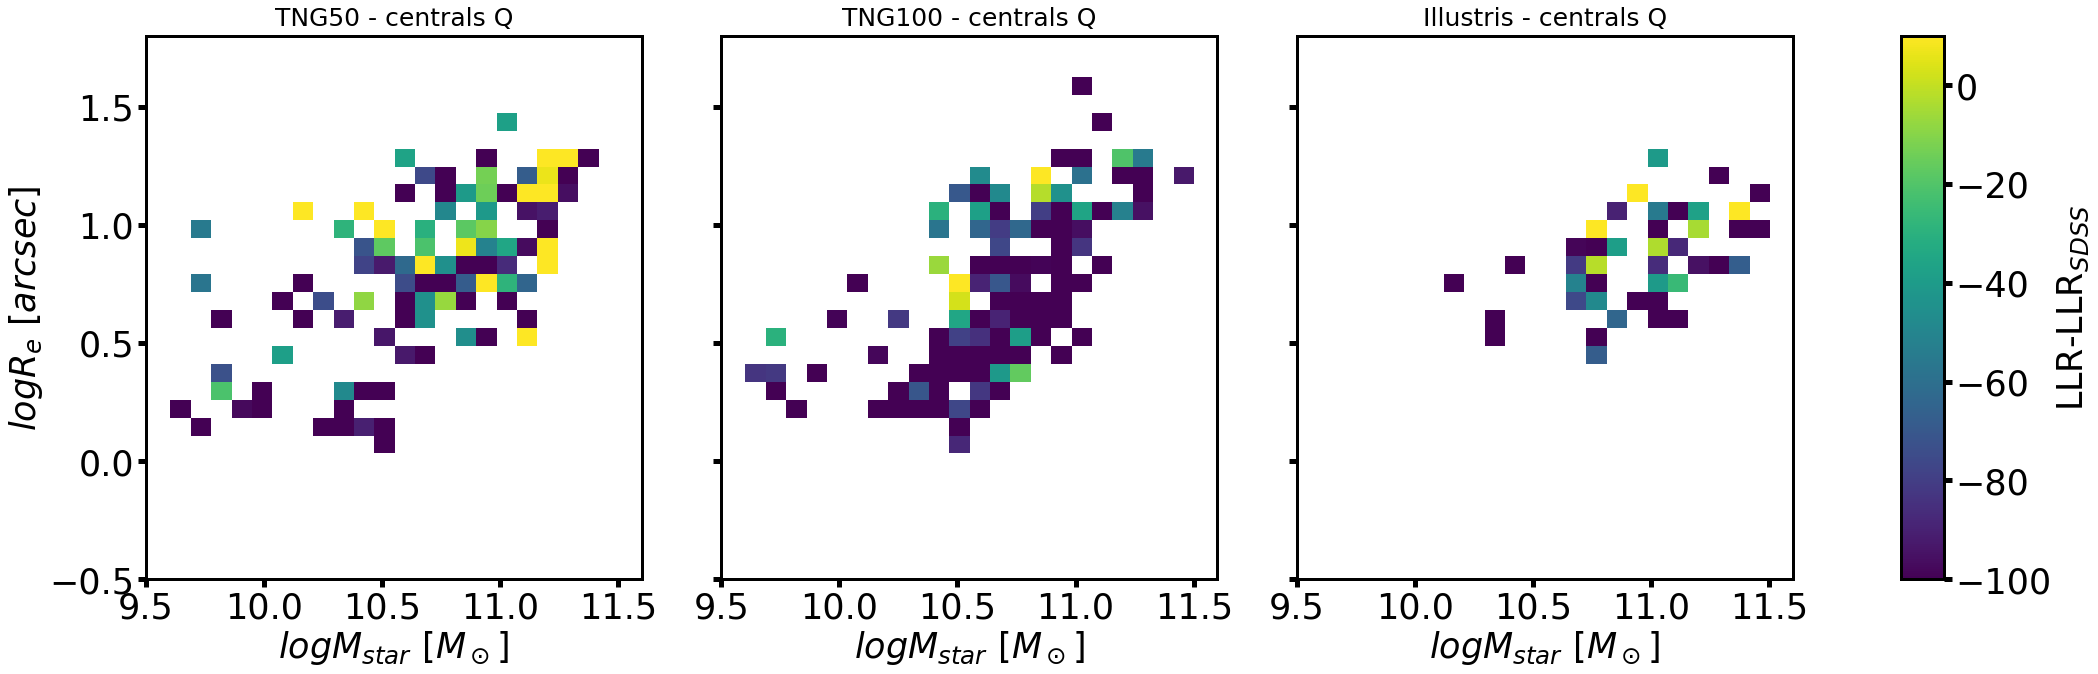

In [20]:
binsx = np.linspace(9,11.5,30)
binsy = np.linspace(-0.5,1.7,30)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_cen_Q['Mstar'],SDSS_cen_Q['$logR_e \ [arcsec]$'], values=SDSS_cen_Q['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_cen_Q, TNG.sample(frac=len(TNG50)/len(TNG)).query('sSFR<-11 & LCentSat==1'), Illustris.sample(frac=len(TNG50)/len(Illustris)).query('sSFR<-11 & LCentSat==1')]
titles = ['TNG50 - centrals Q','TNG100 - centrals Q','Illustris - centrals Q']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mstar'],dset['$logR_e \ [arcsec]$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10)
    a.set_xlim(9.5,11.6)
    a.set_ylim(-0.5,1.8)
    a.set_xticks([9.5,10,10.5,11,11.5])
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit, fontsize=25)
    a.set_xlabel('$log M_{star} \ [M_\odot]$')
ax_[0].set_ylabel('$logR_e \ [arcsec]$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('LLR-LLR$_{SDSS}$')
fig.savefig('./results/ScalingRelations/sizemass_cen_Q.pdf', bbox_inches='tight')


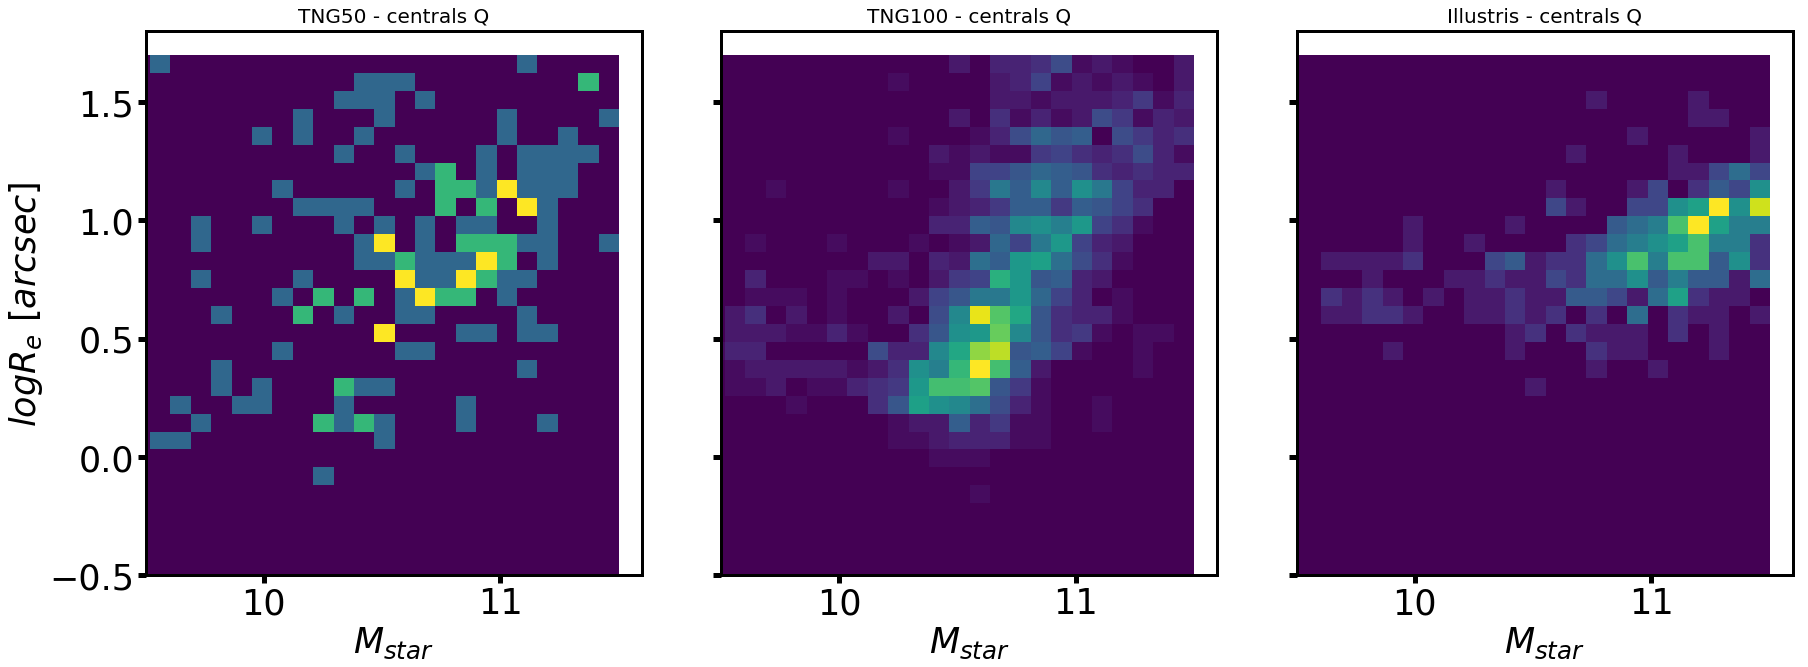

In [60]:
# density plots

fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mstar'],dset['$logR_e \ [arcsec]$'], values=dset['LLR'],statistic='count',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)#-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ))#, vmin=-100,vmax=10)
    a.set_xlim(9.5,11.6)
    a.set_ylim(-0.5,1.8)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit, fontsize=20)
    a.set_xlabel('$M_{star}$')
ax_[0].set_ylabel('$logR_e \ [arcsec]$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

#cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
#cbar = fig.colorbar(im, cax=cax)
#cbar.set_label('LLR-LLR$_{SDSS}$')

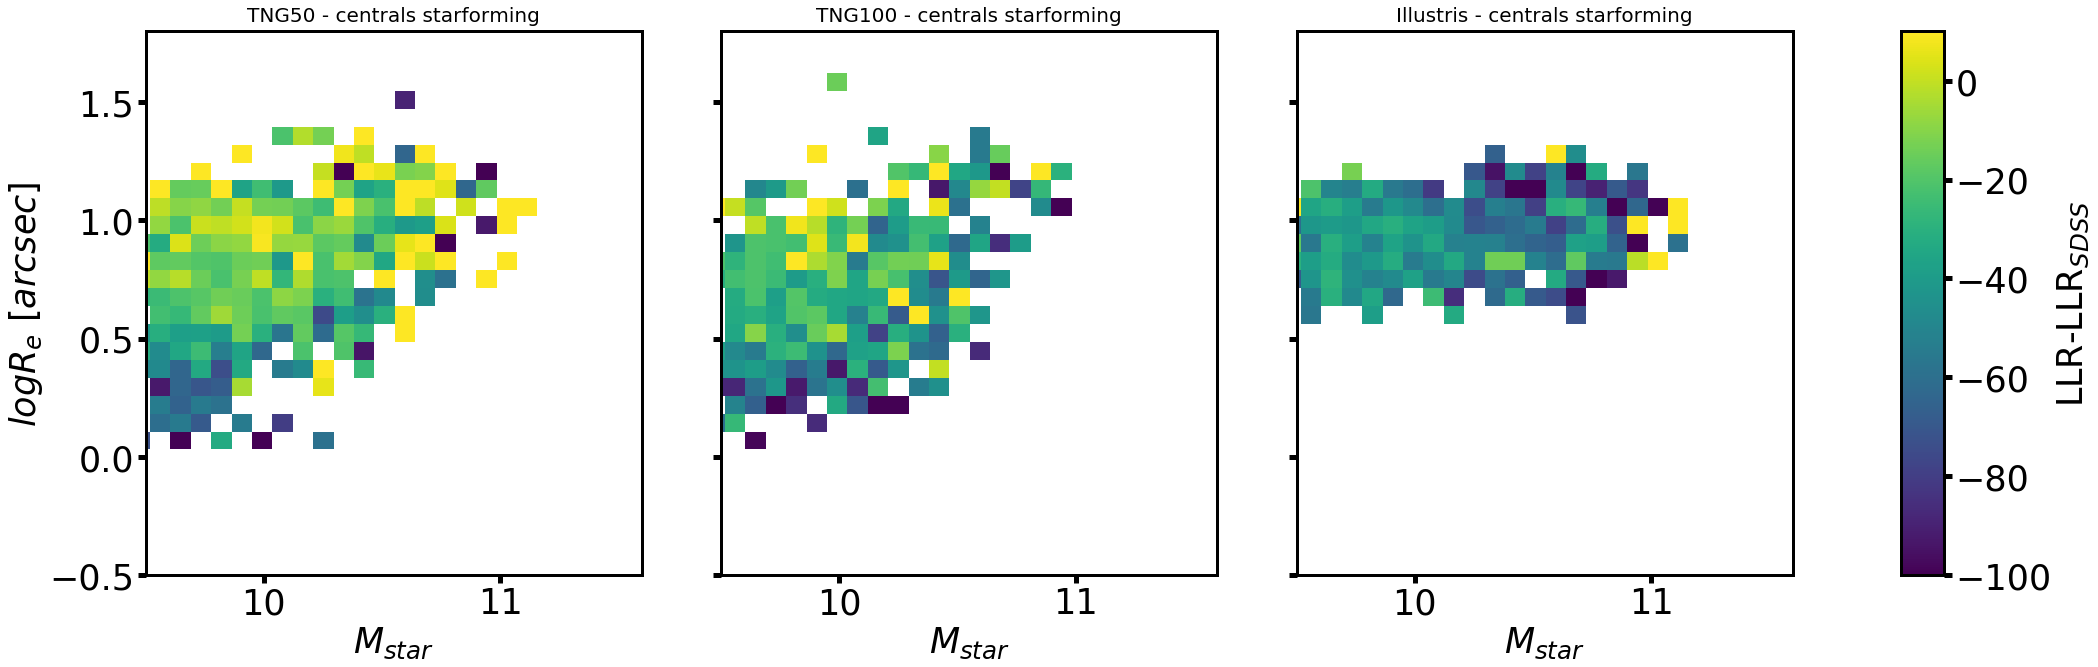

In [21]:
binsx = np.linspace(9,11.5,30)
binsy = np.linspace(-0.5,1.7,30)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_cen_SF['Mstar'],SDSS_cen_SF['$logR_e \ [arcsec]$'], values=SDSS_cen_SF['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_cen_SF, TNG.sample(frac=len(TNG50)/len(TNG)).query('sSFR>-11 & LCentSat==1'), Illustris.sample(frac=len(TNG50)/len(Illustris)).query('sSFR>-11 & LCentSat==1')]
titles = ['TNG50 - centrals starforming','TNG100 - centrals starforming','Illustris - centrals starforming']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mstar'],dset['$logR_e \ [arcsec]$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10)
    a.set_xlim(9.5,11.6)
    a.set_ylim(-0.5,1.8)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit, fontsize=20)
    a.set_xlabel('$M_{star}$')
ax_[0].set_ylabel('$logR_e \ [arcsec]$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('LLR-LLR$_{SDSS}$')
fig.savefig('./results/ScalingRelations/sizemass_cen_SF.pdf', bbox_inches='tight')


### plot for satellites

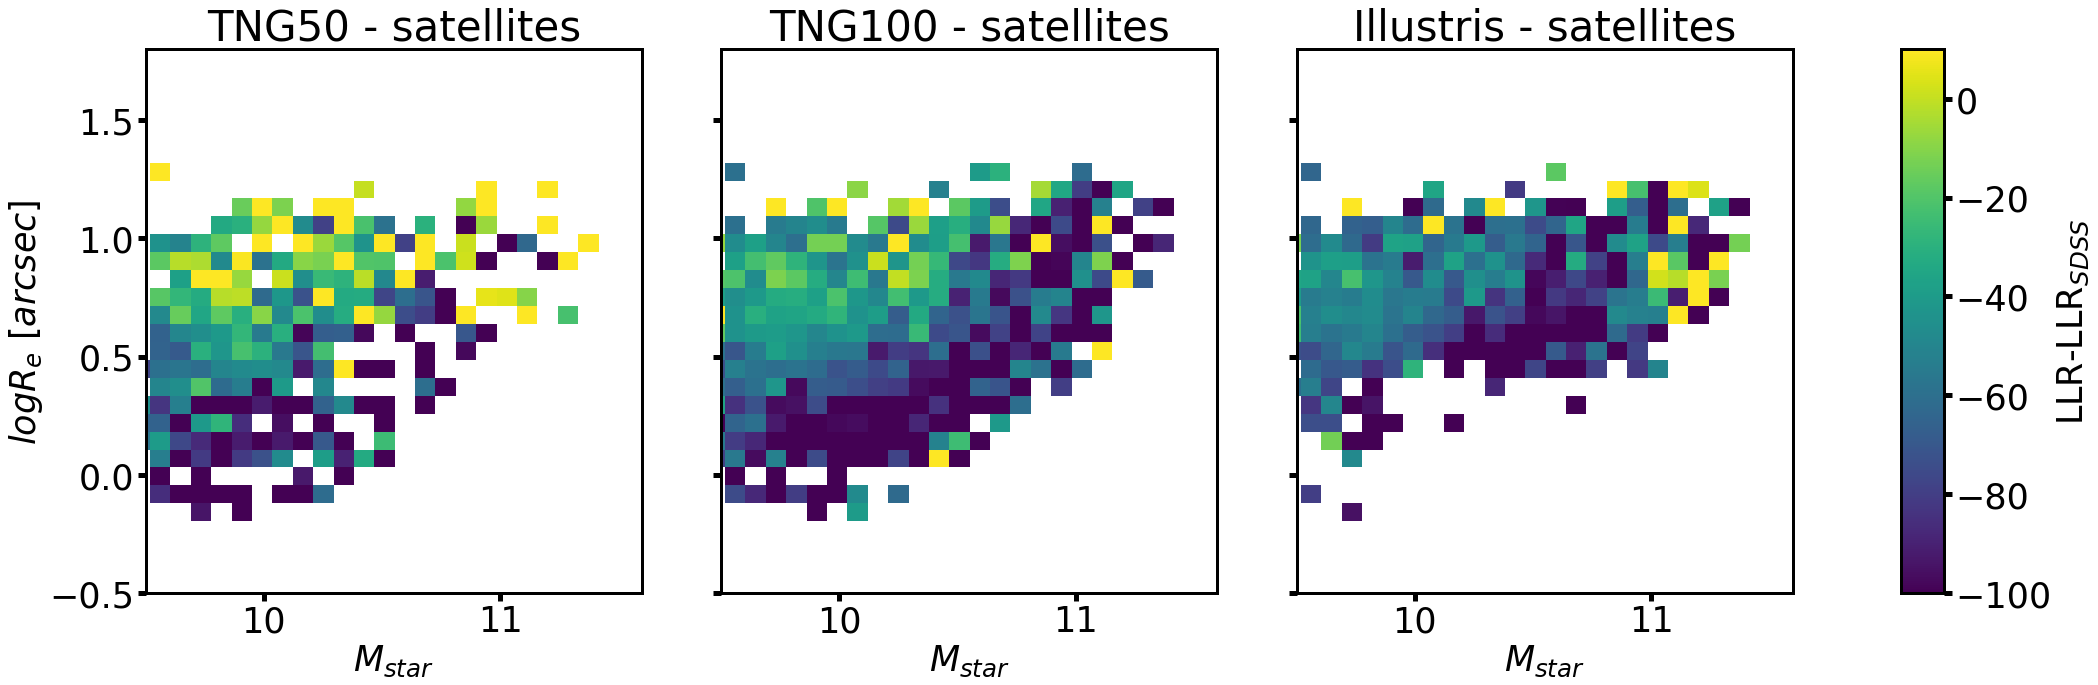

In [64]:
binsx = np.linspace(9,11.5,30)
binsy = np.linspace(-0.5,1.7,30)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_sat['Mstar'],SDSS_sat['$logR_e \ [arcsec]$'], values=SDSS_sat['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_sat,TNG_sat,Illustris_sat]
titles = ['TNG50 - satellites','TNG100 - satellites','Illustris - satellites']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mstar'],dset['$logR_e \ [arcsec]$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10)
    a.set_xlim(9.5,11.6)
    a.set_ylim(-0.5,1.8)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    a.set_xlabel('$M_{star}$')
ax_[0].set_ylabel('$logR_e \ [arcsec]$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('LLR-LLR$_{SDSS}$')
#fig.savefig('./results/ScalingRelations/sizemass_sat.pdf', bbox_inches='tight')


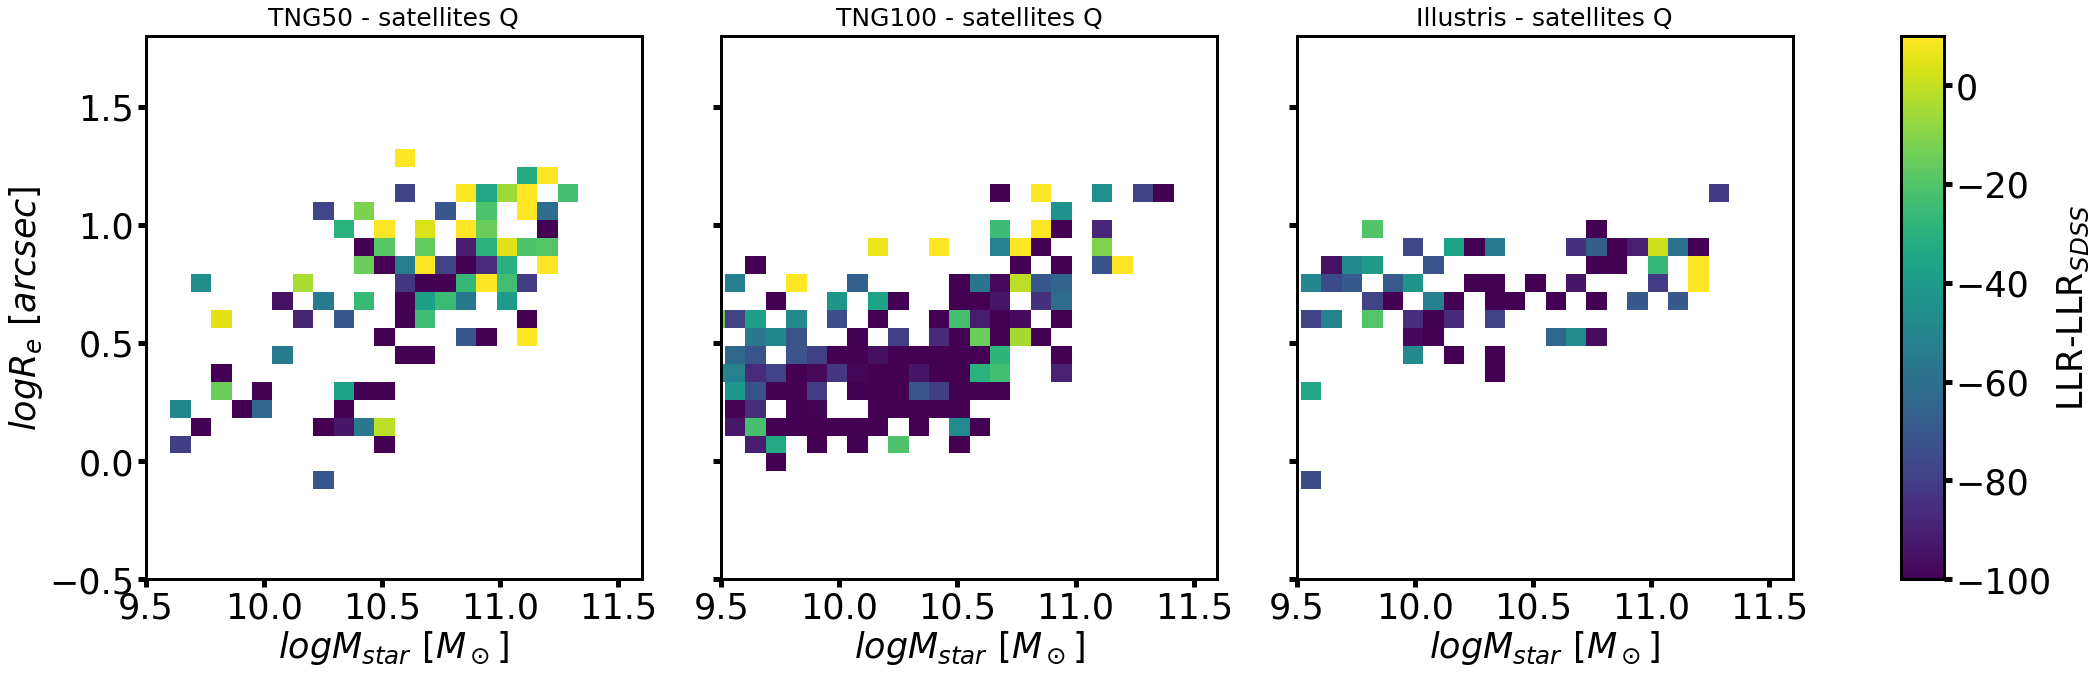

In [23]:
binsx = np.linspace(9,11.5,30)
binsy = np.linspace(-0.5,1.7,30)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_sat_Q['Mstar'],SDSS_sat_Q['$logR_e \ [arcsec]$'], values=SDSS_sat_Q['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_cen_Q, TNG.sample(frac=len(TNG50)/len(TNG)).query('sSFR<-11 & LCentSat==0'), Illustris.sample(frac=len(TNG50)/len(Illustris)).query('sSFR<-11 & LCentSat==0')]
titles = ['TNG50 - satellites Q','TNG100 - satellites Q','Illustris - satellites Q']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mstar'],dset['$logR_e \ [arcsec]$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10)
    a.set_xlim(9.5,11.6)
    a.set_ylim(-0.5,1.8)
    a.set_xticks([9.5,10,10.5,11,11.5])
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit, fontsize=25)
    a.set_xlabel('$log M_{star} \ [M_\odot]$')
ax_[0].set_ylabel('$logR_e \ [arcsec]$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('LLR-LLR$_{SDSS}$')
fig.savefig('./results/ScalingRelations/sizemass_sat_Q.pdf', bbox_inches='tight')


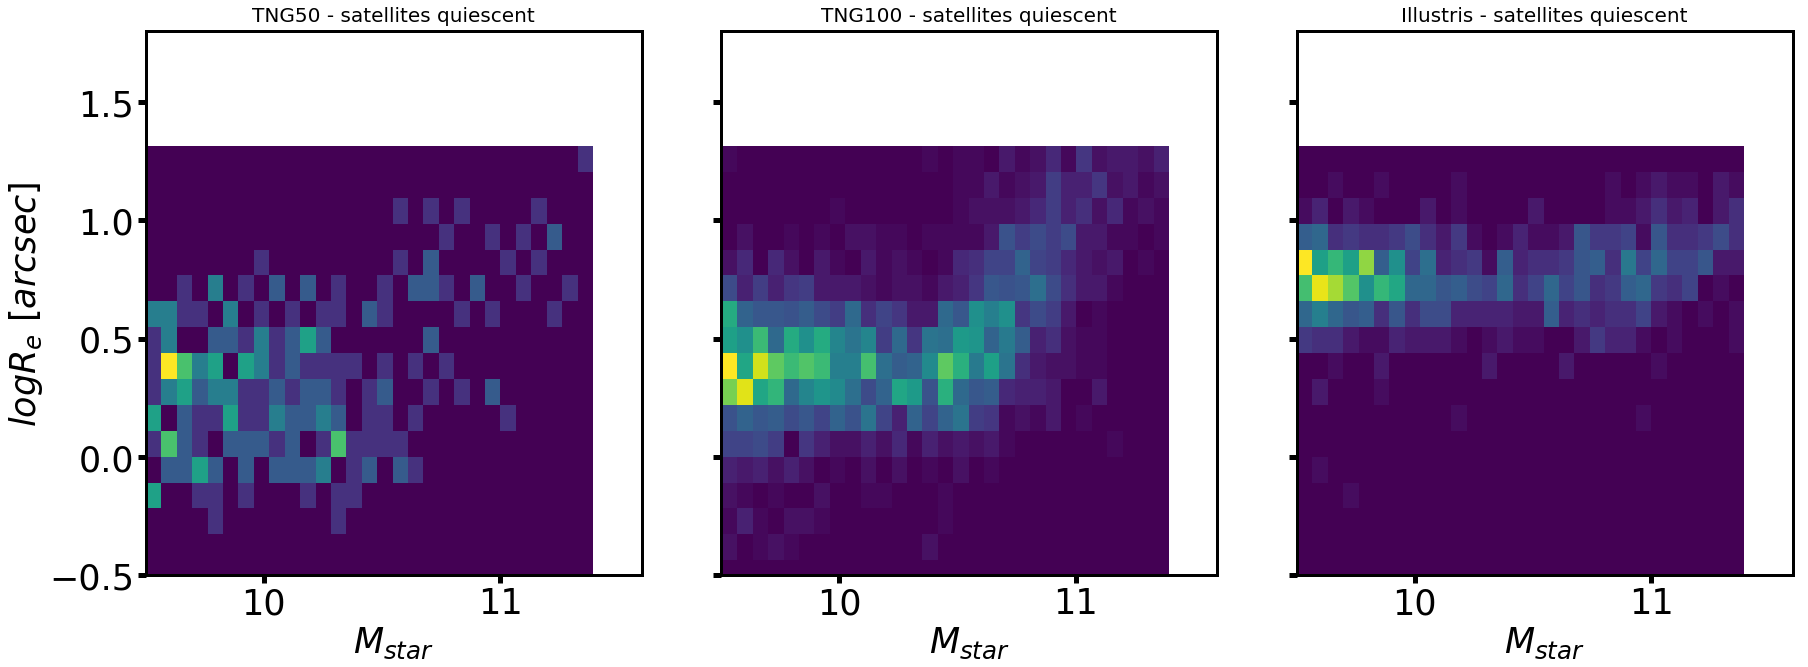

In [63]:
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mstar'],dset['$logR_e \ [arcsec]$'], values=dset['LLR'],statistic='count',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)#-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ))#, vmin=-100,vmax=10)
    a.set_xlim(9.5,11.6)
    a.set_ylim(-0.5,1.8)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit, fontsize=20)
    a.set_xlabel('$M_{star}$')
ax_[0].set_ylabel('$logR_e \ [arcsec]$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position


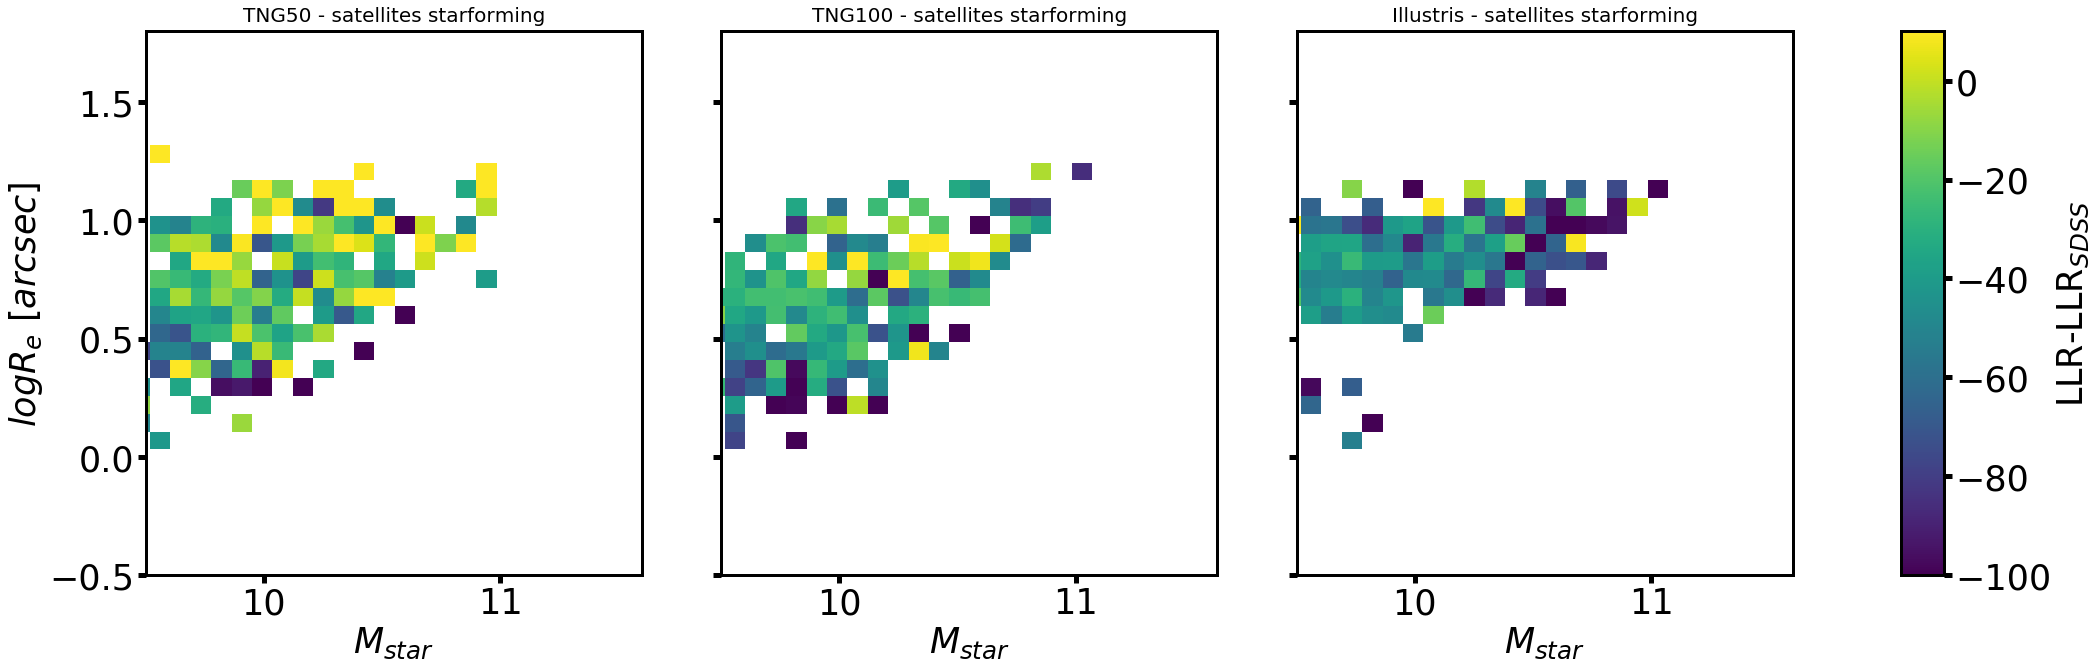

In [24]:
binsx = np.linspace(9,11.5,30)
binsy = np.linspace(-0.5,1.7,30)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_sat_SF['Mstar'],SDSS_sat_SF['$logR_e \ [arcsec]$'], values=SDSS_sat_SF['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_sat_SF, TNG.sample(frac=len(TNG50)/len(TNG)).query('sSFR>-11 & LCentSat==0'), Illustris.sample(frac=len(TNG50)/len(Illustris)).query('sSFR>-11 & LCentSat==0')]
titles = ['TNG50 - satellites starforming','TNG100 - satellites starforming','Illustris - satellites starforming']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mstar'],dset['$logR_e \ [arcsec]$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10)
    a.set_xlim(9.5,11.6)
    a.set_ylim(-0.5,1.8)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit, fontsize=20)
    a.set_xlabel('$M_{star}$')
ax_[0].set_ylabel('$logR_e \ [arcsec]$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('LLR-LLR$_{SDSS}$')
fig.savefig('./results/ScalingRelations/sizemass_sat_SF.pdf', bbox_inches='tight')


### Main sequence

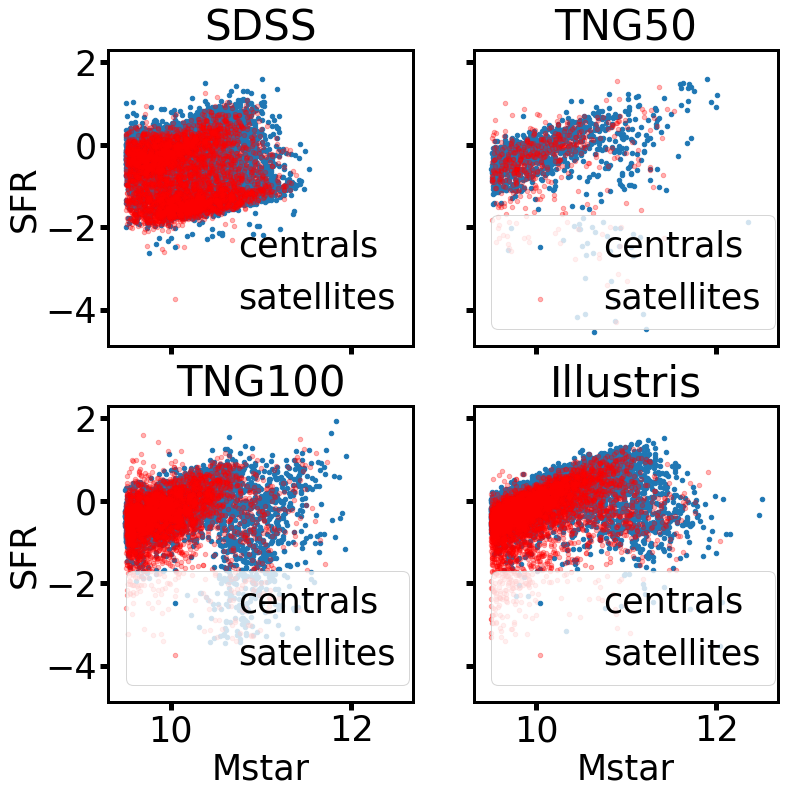

In [8]:
dsets = [SDSS_cen,TNG50_cen,TNG_cen,Illustris_cen]
fig,ax = plt.subplots(2,2, sharex=True, sharey=True)
titles = ['SDSS','TNG50','TNG100','Illustris']

for dset,(a,tit) in zip(dsets, zip(ax.ravel(),titles)):
    dset.plot.scatter('Mstar','SFR', ax=a, label='centrals')
    a.set_title(tit)

dsets = [SDSS_sat,TNG50_sat,TNG_sat,Illustris_sat]
for dset,a in zip(dsets, ax.ravel()):
    dset.plot.scatter('Mstar','SFR', ax=a, color='red',alpha=0.3, label='satellites')
ax[0][0].legend(frameon=False)

# Plot for all galaxies

-12.5
-12.5
-12.5


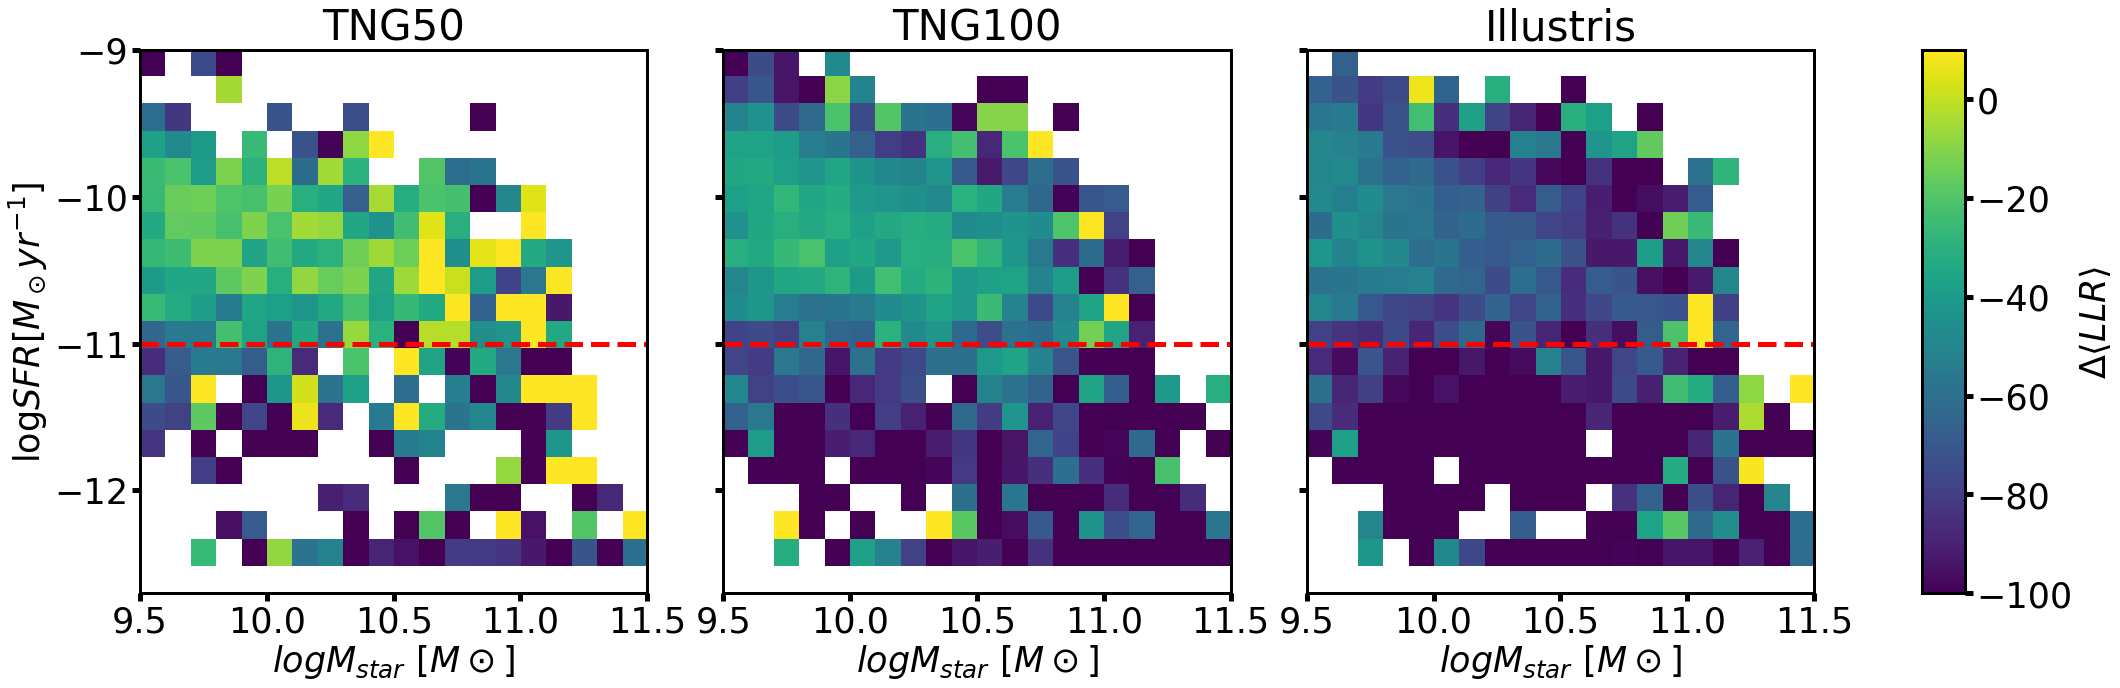

In [13]:
binsx = np.linspace(9.5,11.5,21)
binsy = np.linspace(-12.7,-9,21)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS['Mstar'],SDSS['sSFR'], values=SDSS['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50,TNG,Illustris]
titles = ['TNG50','TNG100','Illustris']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    minSFR = SDSS['sSFR'].min() #dset[dset['SFR'].apply(lambda x: 10**x)!=0]['SFR'].min()
    print(minSFR)
 
    dset_ = dset.copy()
 
    #dset_['SFR'] = dset['SFR'].apply(lambda x: minSFR if x<minSFR else x)
 
    stat_dset, x,y,_ = binned_statistic_2d(dset_['Mstar'],dset_['sSFR'], values=dset_['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10, aspect='auto')
    #a.set_xlim(9.5,12.5)
    #a.set_ylim(-12.5,-9.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    a.set_xticks([9.5,10,10.5,11,11.5])

    a.set_xlabel('$logM_{star} \ [M\odot]$')
    a.axhline(-11, lw=5,ls='--', color='red')
ax_[0].set_ylabel(r'$\log{SFR} [M_\odot yr^{-1}$]')
fig.subplots_adjust(wspace=0.15,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'$\Delta \langle LLR \rangle$')

fig.savefig('./results/ScalingRelations/sSFR.pdf', bbox_inches='tight')



In [ ]:
p

### SMHM relation

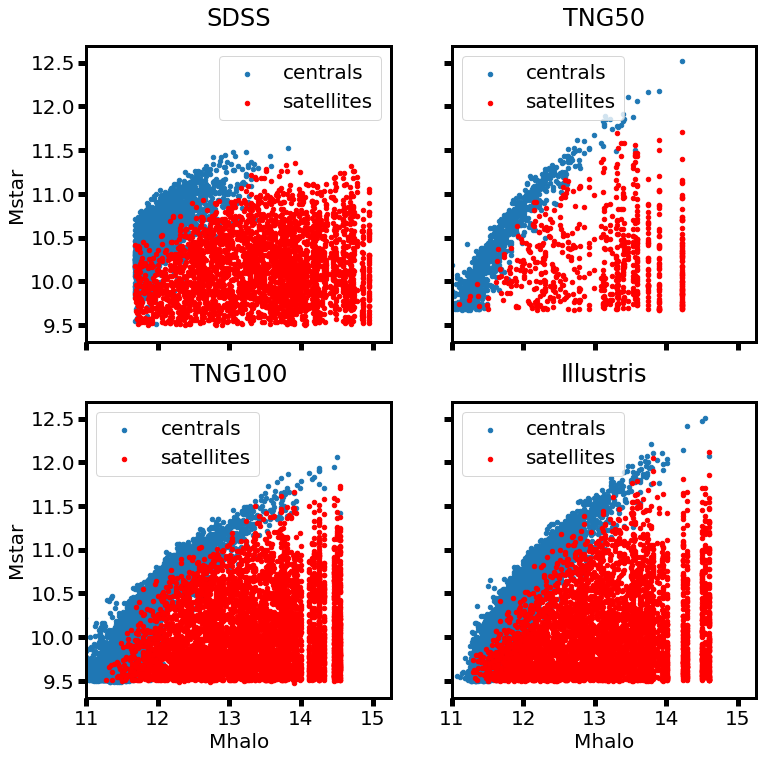

In [40]:
SDSS_cen_cut = SDSS_cen.query('Mhalo>0')
SDSS_sat_cut = SDSS_sat.query('Mhalo>0')

dsets = [SDSS_cen_cut,TNG50_cen,TNG_cen,Illustris_cen]
fig,ax = plt.subplots(2,2, sharex=True, sharey=True)
titles = ['SDSS','TNG50','TNG100','Illustris']

for dset,(a,tit) in zip(dsets, zip(ax.ravel(),titles)):
    dset.plot.scatter('Mhalo','Mstar', ax=a, label='centrals')
    a.set_title(tit)
    
dsets = [SDSS_sat_cut,TNG50_sat,TNG_sat,Illustris_sat]
for dset,a in zip(dsets, ax.ravel()):
    dset.plot.scatter('Mhalo','Mstar', ax=a, label='satellites', color='red')
    a.set_xlim(11)

# Centrals only

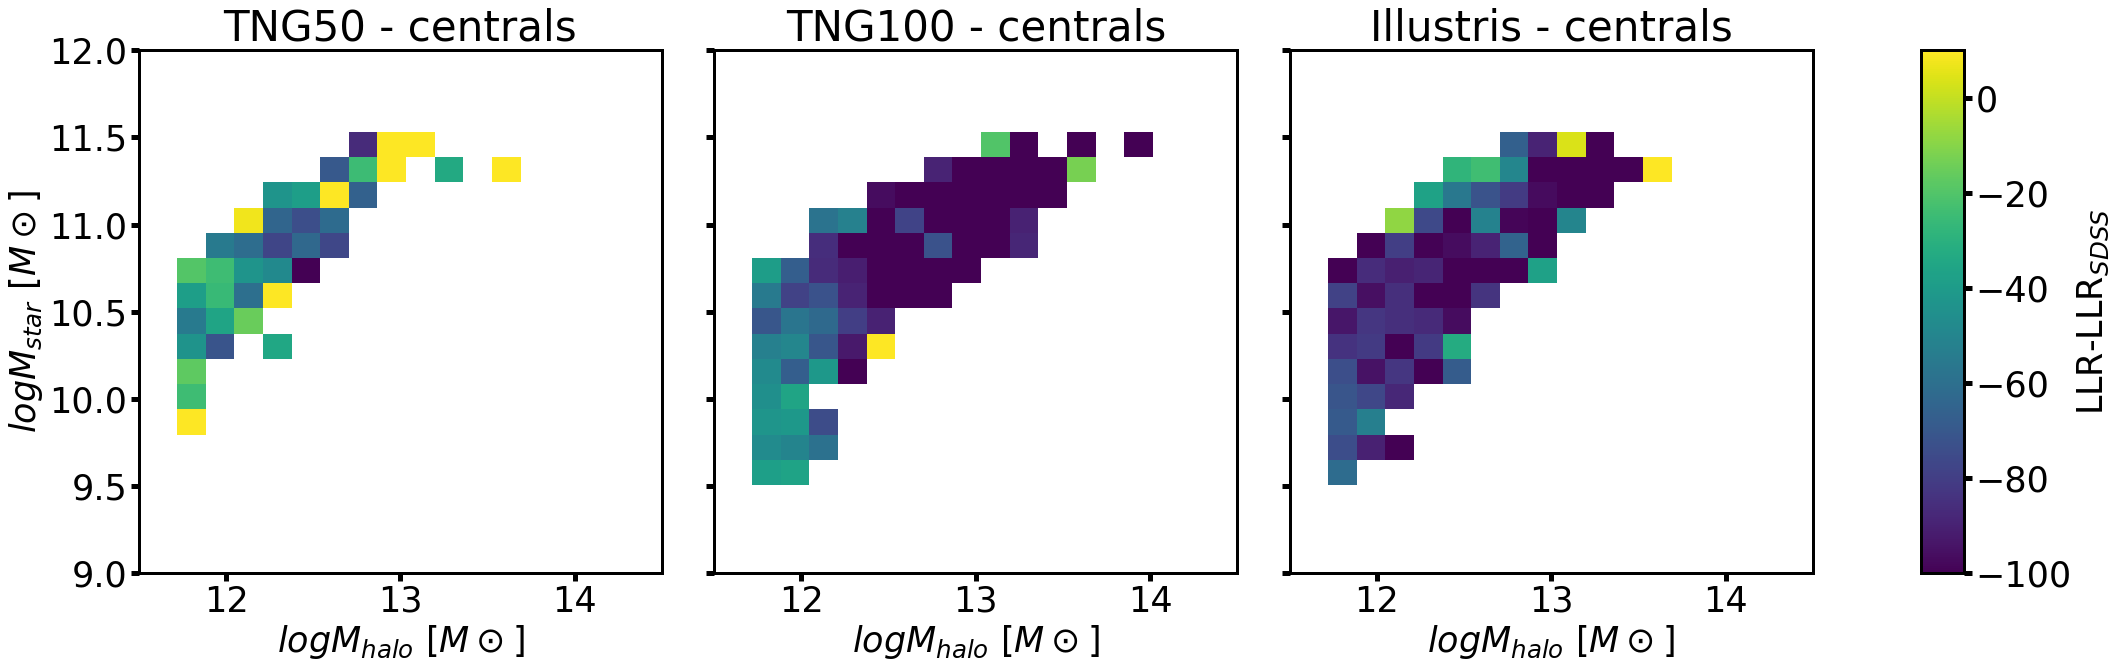

In [74]:
SDSS_cen = SDSS_cen.query('Mhalo>0')
binsx = np.linspace(SDSS_cen['Mhalo'].min(), SDSS_cen['Mhalo'].max(),15)
binsy = np.linspace(SDSS_cen['Mstar'].min(), SDSS_cen['Mstar'].max(),15)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_cen['Mhalo'],SDSS_cen['Mstar'], values=SDSS_cen['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_cen,TNG_cen,Illustris_cen]
titles = ['TNG50 - centrals','TNG100 - centrals','Illustris - centrals']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mhalo'],dset['Mstar'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10)
    a.set_xlim(11.5,14.5)
    a.set_ylim(9,12)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    a.set_xlabel('$logM_{halo} \ [M\odot]$')

ax_[0].set_ylabel('$logM_{star} \ [M\odot]$')



fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('LLR-LLR$_{SDSS}$')

fig.savefig('./results/ScalingRelations/SMHM.png', bbox_inches='tight')


# plot for quiescent

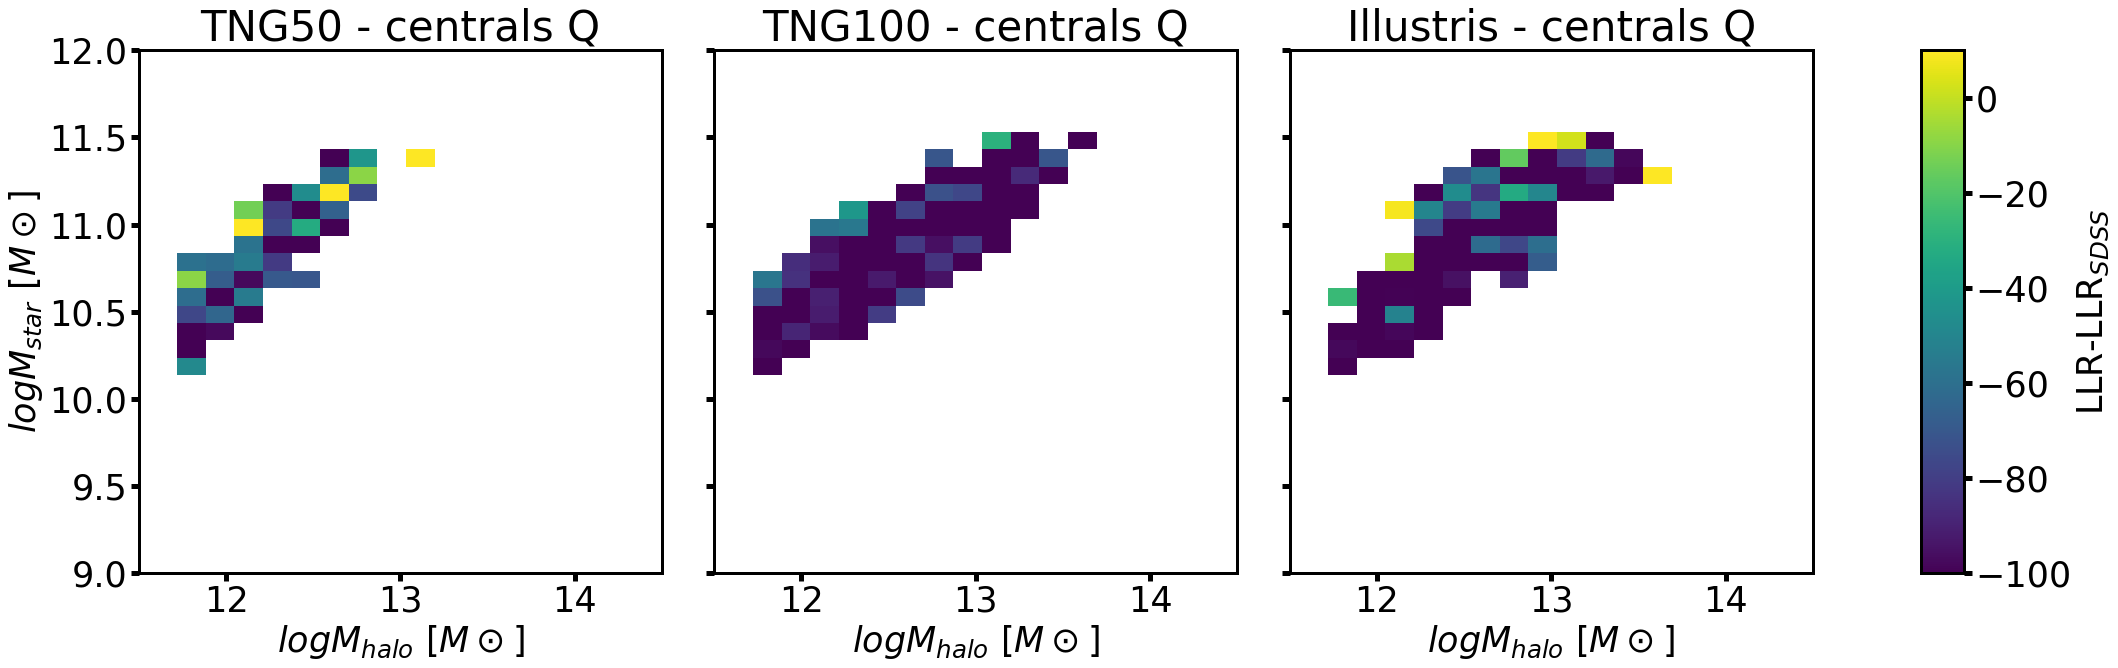

In [76]:
SDSS_cen_Q = SDSS_cen_Q.query('Mhalo>0')
binsx = np.linspace(SDSS_cen_Q['Mhalo'].min(), SDSS_cen_Q['Mhalo'].max(),15)
binsy = np.linspace(SDSS_cen_Q['Mstar'].min(), SDSS_cen_Q['Mstar'].max(),15)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_cen_Q['Mhalo'],SDSS_cen_Q['Mstar'], values=SDSS_cen_Q['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_cen_Q,TNG_cen_Q,Illustris_cen_Q]
titles = ['TNG50 - centrals Q','TNG100 - centrals Q','Illustris - centrals Q']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mhalo'],dset['Mstar'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10)
    a.set_xlim(11.5,14.5)
    a.set_ylim(9,12)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    a.set_xlabel('$logM_{halo} \ [M\odot]$')

ax_[0].set_ylabel('$logM_{star} \ [M\odot]$')



fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('LLR-LLR$_{SDSS}$')

fig.savefig('./results/ScalingRelations/SMHM_Q.png', bbox_inches='tight')

# plot for star forming

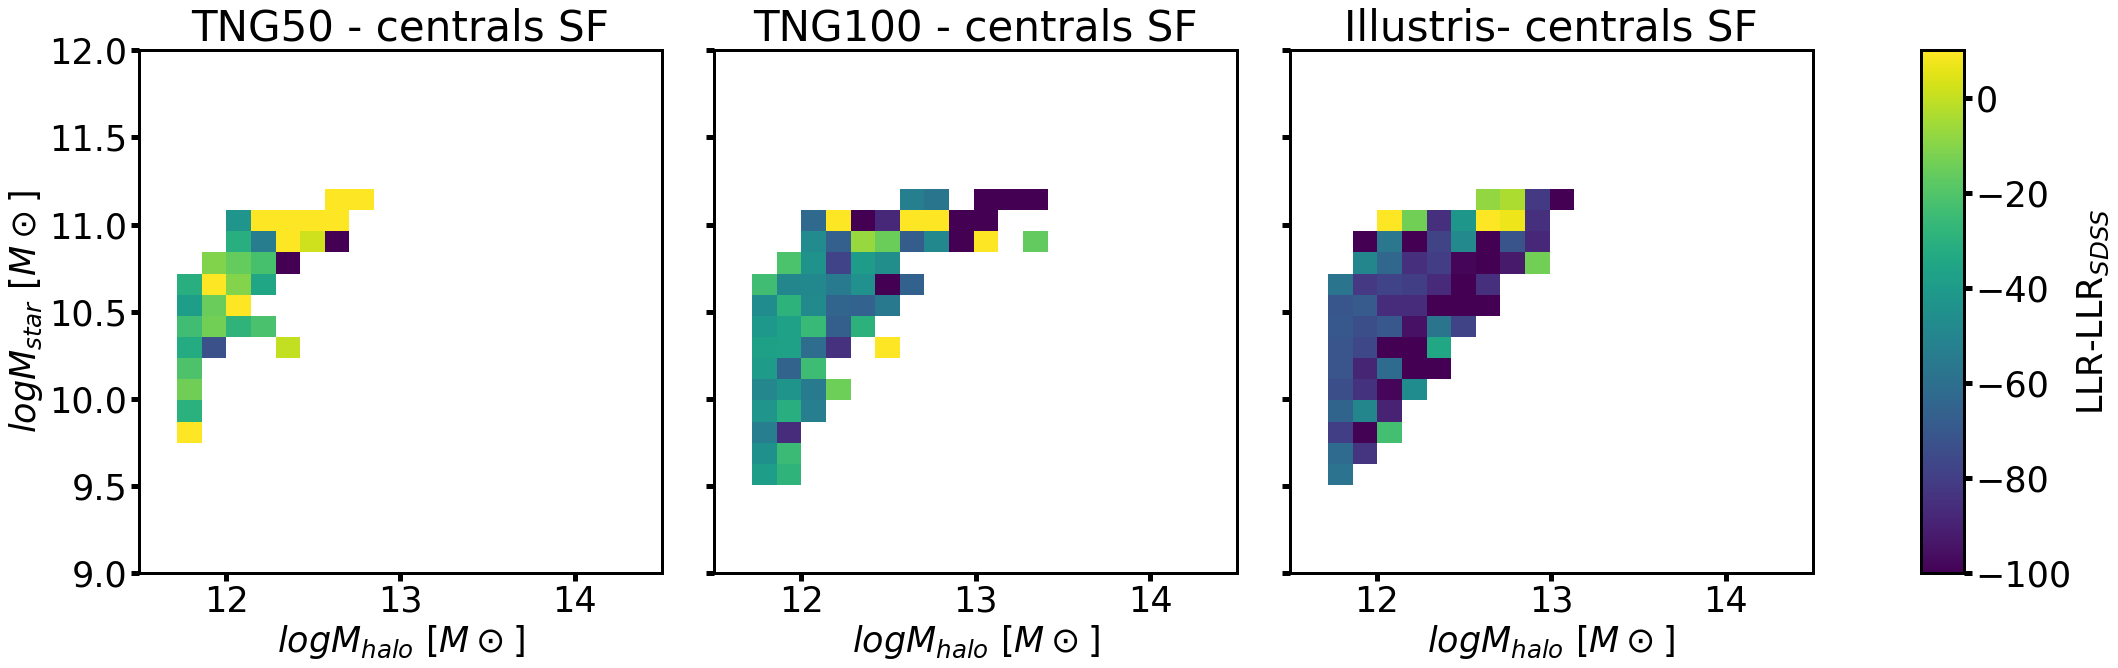

In [77]:
SDSS_cen_SF = SDSS_cen_SF.query('Mhalo>0')
binsx = np.linspace(SDSS_cen_SF['Mhalo'].min(), SDSS_cen_SF['Mhalo'].max(),15)
binsy = np.linspace(SDSS_cen_SF['Mstar'].min(), SDSS_cen_SF['Mstar'].max(),15)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_cen_SF['Mhalo'],SDSS_cen_SF['Mstar'], values=SDSS_cen_SF['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_cen_SF,TNG_cen_SF,Illustris_cen_SF]
titles = ['TNG50 - centrals SF','TNG100 - centrals SF','Illustris- centrals SF']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mhalo'],dset['Mstar'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10)
    a.set_xlim(11.5,14.5)
    a.set_ylim(9,12)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    a.set_xlabel('$logM_{halo} \ [M\odot]$')

ax_[0].set_ylabel('$logM_{star} \ [M\odot]$')



fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('LLR-LLR$_{SDSS}$')

fig.savefig('./results/ScalingRelations/SMHM_SF.png', bbox_inches='tight')

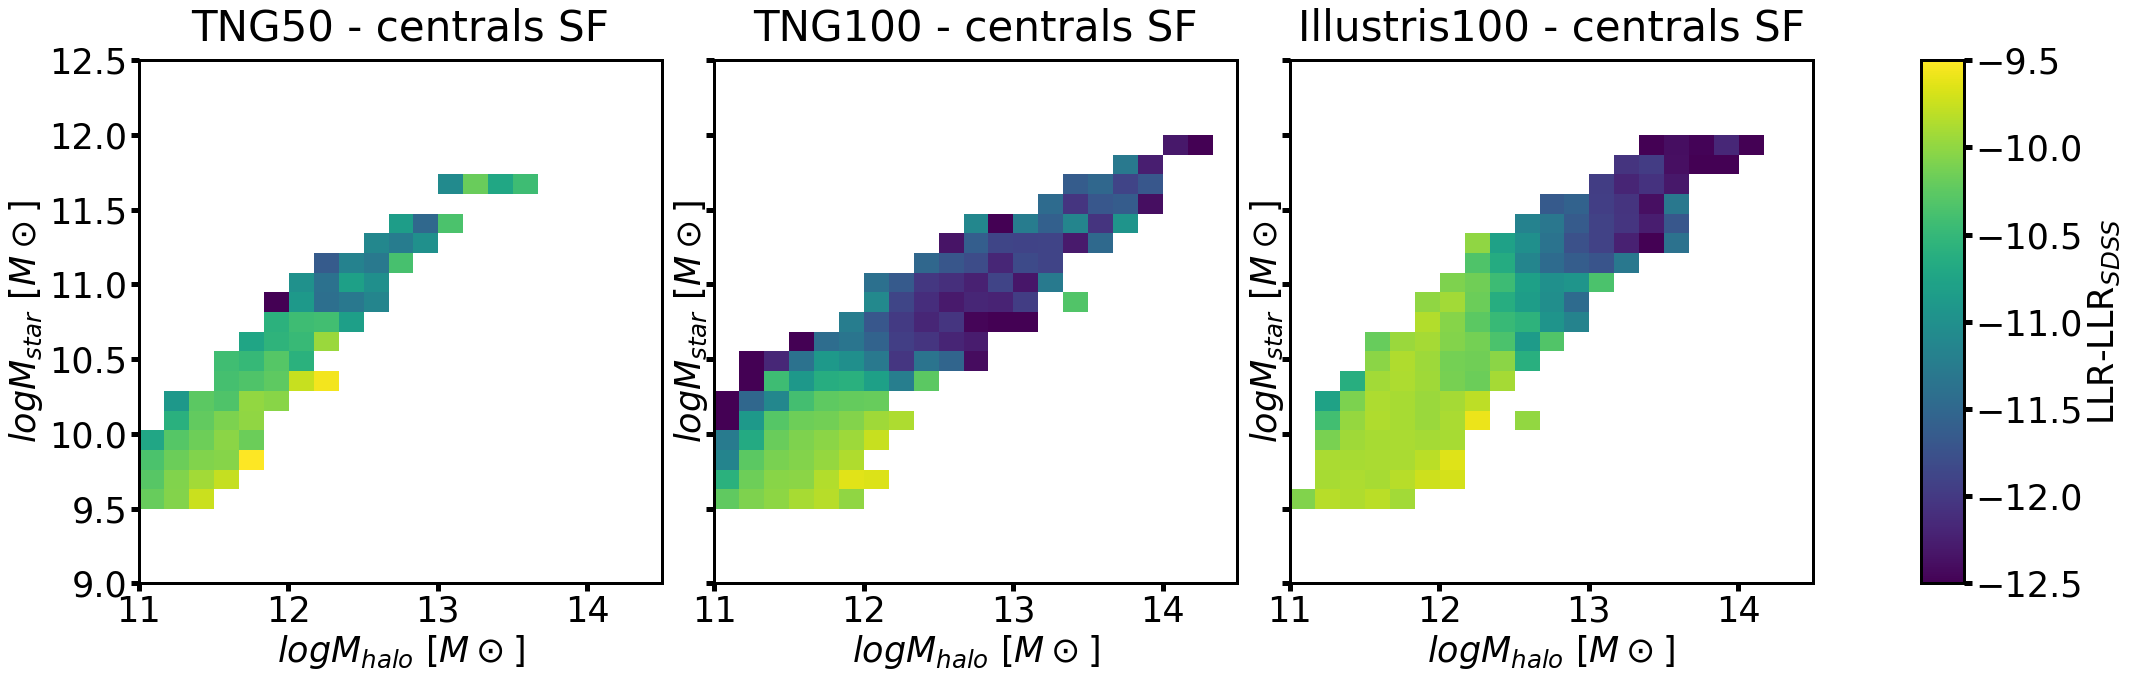

In [311]:
SDSS_cen_SF = SDSS_cen_SF.query('Mhalo>0')
binsx = np.linspace(11,15,25)#SDSS_cen_SF['Mhalo'].min(), SDSS_cen_SF['Mhalo'].max(),15)
binsy = np.linspace(9.5,12,20)#SDSS_cen_SF['Mstar'].min(), SDSS_cen_SF['Mstar'].max(),15)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_cen_SF['Mhalo'],SDSS_cen_SF['Mstar'], values=SDSS_cen_SF['sSFR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_cen,TNG_cen,Illustris_cen]
titles = ['TNG50 - centrals SF','TNG100 - centrals SF','Illustris100 - centrals SF']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mhalo'],dset['Mstar'], values=dset['sSFR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(np.flipud(stat_dset.T), extent=(x[0],x[-1],y[0],y[-1] ), vmin=-12.5,vmax=-9.5)
    a.set_xlim(11.,14.5)
    a.set_ylim(9,12.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    a.set_xlabel('$logM_{halo} \ [M\odot]$')

    a.set_ylabel('$logM_{star} \ [M\odot]$')



fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('sSFR')

fig.savefig('./results/ScalingRelations/SMHM.pdf', bbox_inches='tight')

### satellites

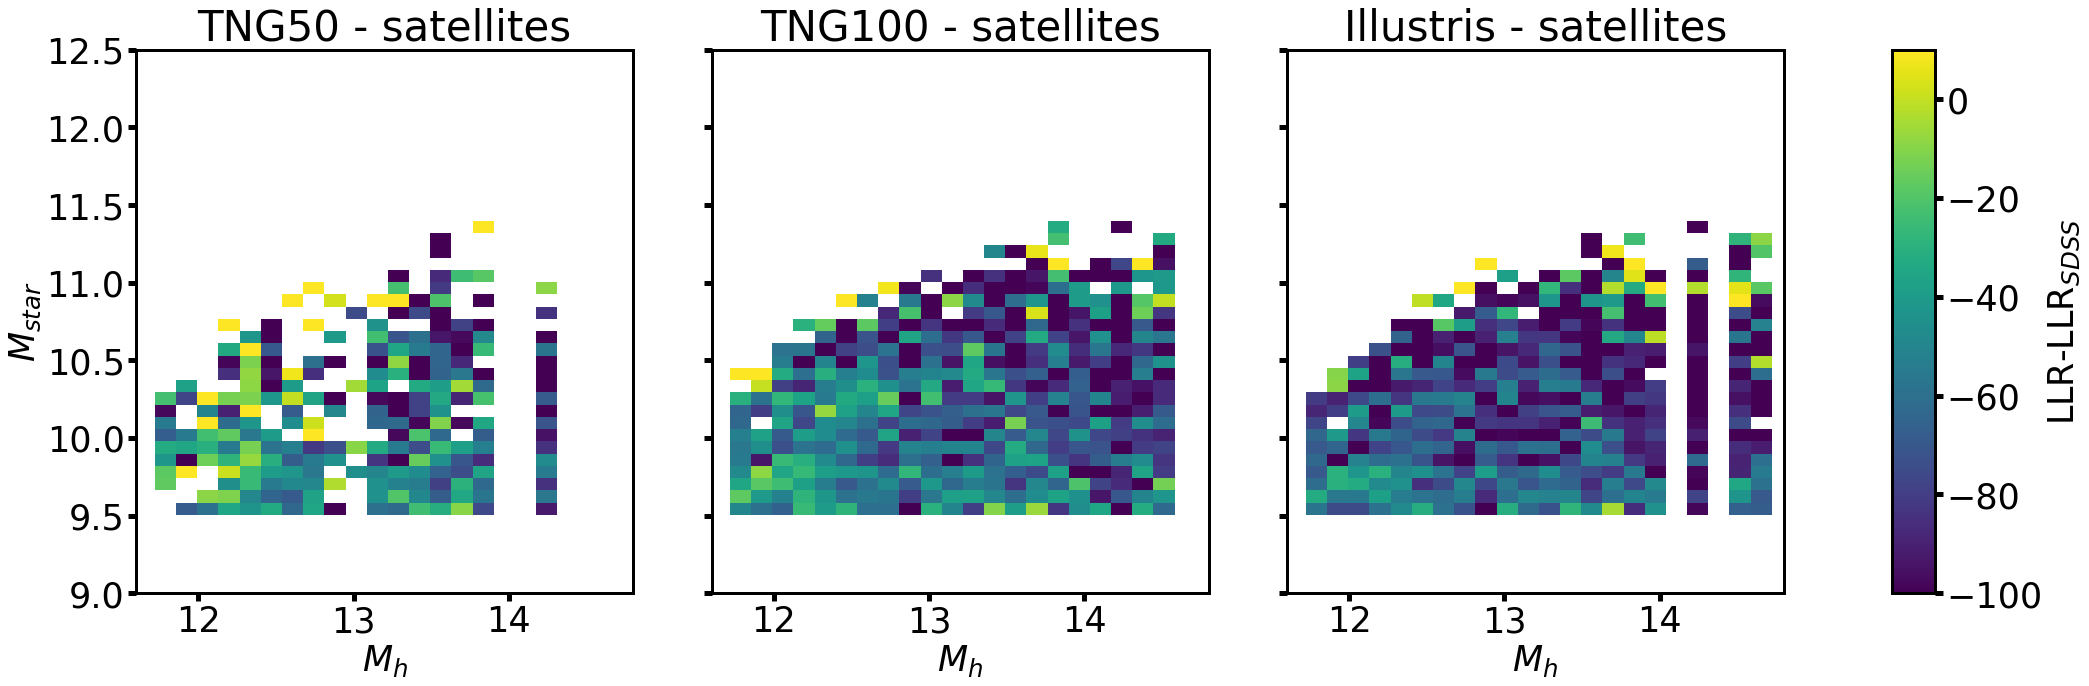

In [78]:
SDSS_sat = SDSS_sat.query('Mhalo>0')
binsx = np.linspace(SDSS_sat['Mhalo'].min(), SDSS_sat['Mhalo'].max(),25)
binsy = np.linspace(SDSS_sat['Mstar'].min(), SDSS_sat['Mstar'].max(),25)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_sat['Mhalo'],SDSS_sat['Mstar'], values=SDSS_sat['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_sat,TNG_sat,Illustris_sat]
titles = ['TNG50 - satellites','TNG100 - satellites','Illustris - satellites']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mhalo'],dset['Mstar'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10)
    a.set_xlim(11.6,14.8)
    a.set_ylim(9,12.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    a.set_xlabel('$M_{h}$')
ax_[0].set_ylabel('$M_{star}$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('LLR-LLR$_{SDSS}$')

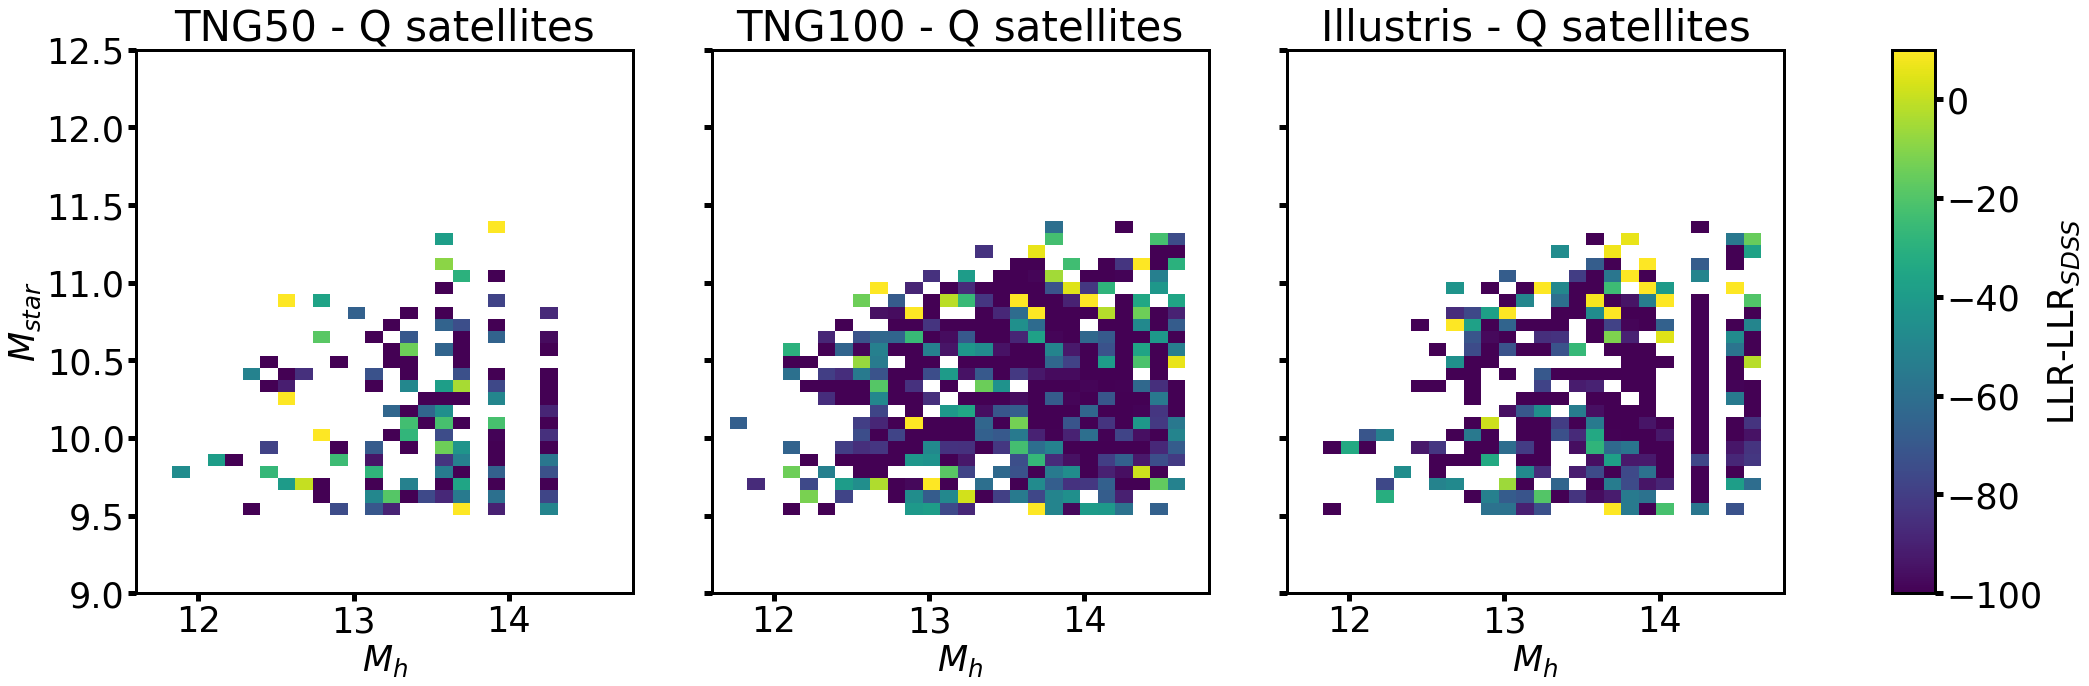

In [87]:
SDSS_sat_Q = SDSS_sat_Q.query('Mhalo>0.1')
binsx = np.linspace(SDSS_sat_Q['Mhalo'].min(), SDSS_sat_Q['Mhalo'].max(),30)
binsy = np.linspace(SDSS_sat_Q['Mstar'].min(), SDSS_sat_Q['Mstar'].max(),25)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_sat_Q['Mhalo'],SDSS_sat_Q['Mstar'], values=SDSS_sat_Q['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_sat_Q,TNG_sat_Q,Illustris_sat_Q]
titles = ['TNG50 - Q satellites','TNG100 - Q satellites','Illustris - Q satellites']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mhalo'],dset['Mstar'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10)
    a.set_xlim(11.6,14.8)
    a.set_ylim(9,12.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    a.set_xlabel('$M_{h}$')
ax_[0].set_ylabel('$M_{star}$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('LLR-LLR$_{SDSS}$')

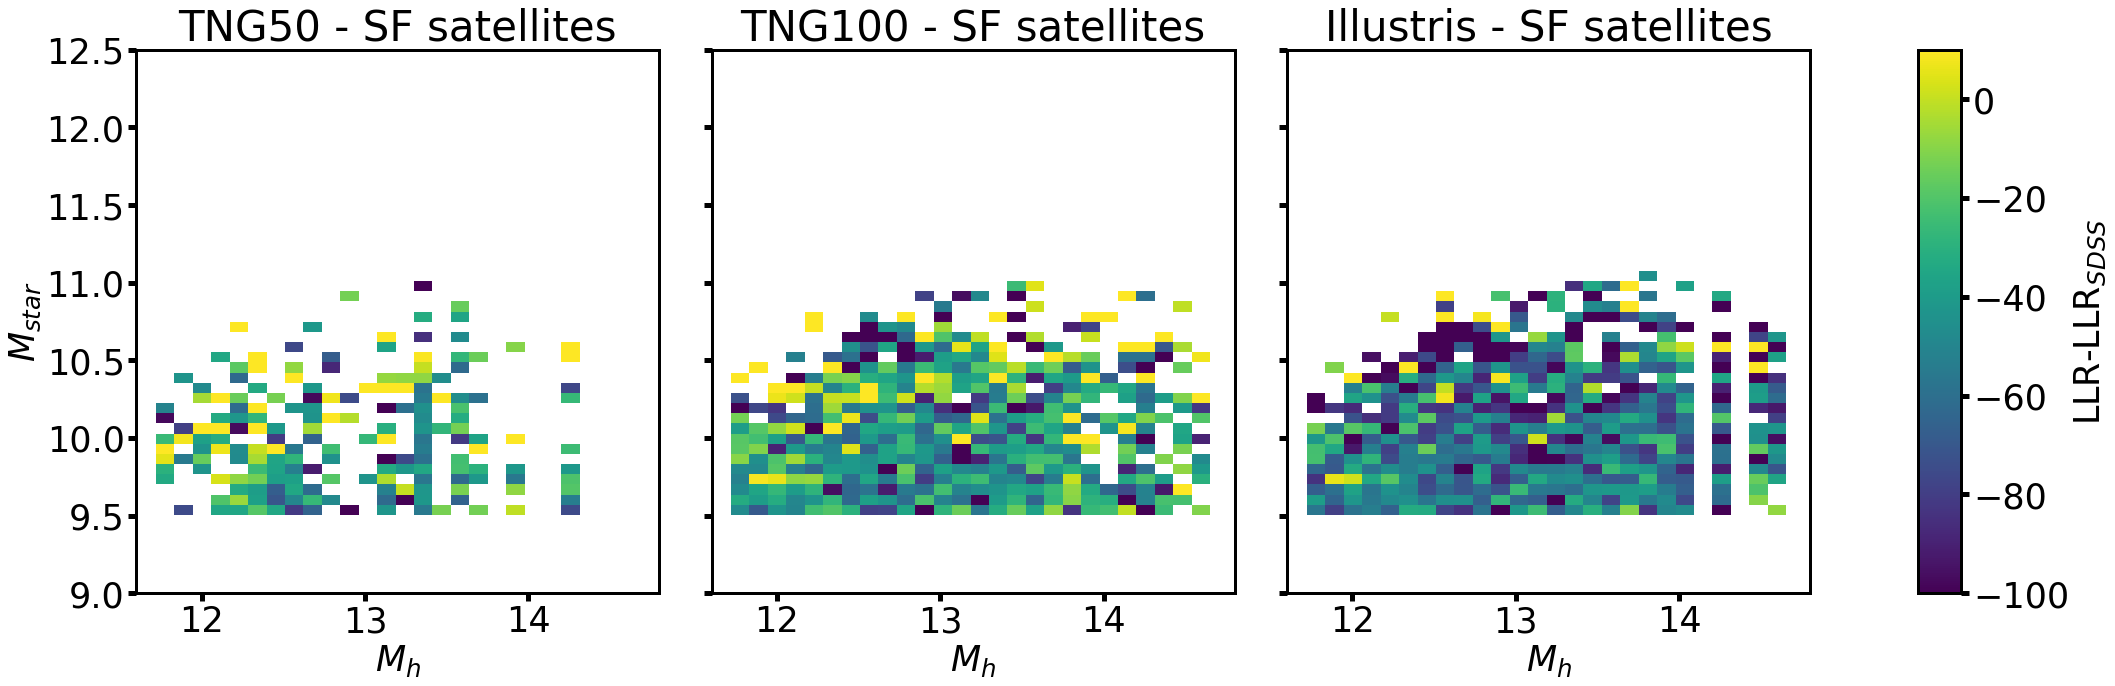

In [86]:
SDSS_sat_SF = SDSS_sat_SF.query('Mhalo>0')
binsx = np.linspace(SDSS_sat_SF['Mhalo'].min(), SDSS_sat_SF['Mhalo'].max(),30)
binsy = np.linspace(SDSS_sat_SF['Mstar'].min(), SDSS_sat_SF['Mstar'].max(),25)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_sat_SF['Mhalo'],SDSS_sat_SF['Mstar'], values=SDSS_sat_SF['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_sat_SF,TNG_sat_SF,Illustris_sat_SF]
titles = ['TNG50 - SF satellites','TNG100 - SF satellites','Illustris - SF satellites']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['Mhalo'],dset['Mstar'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10, aspect='auto')
    a.set_xlim(11.6,14.8)
    a.set_ylim(9,12.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    a.set_xlabel('$M_{h}$')
ax_[0].set_ylabel('$M_{star}$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('LLR-LLR$_{SDSS}$')

# nbulge-Mstar

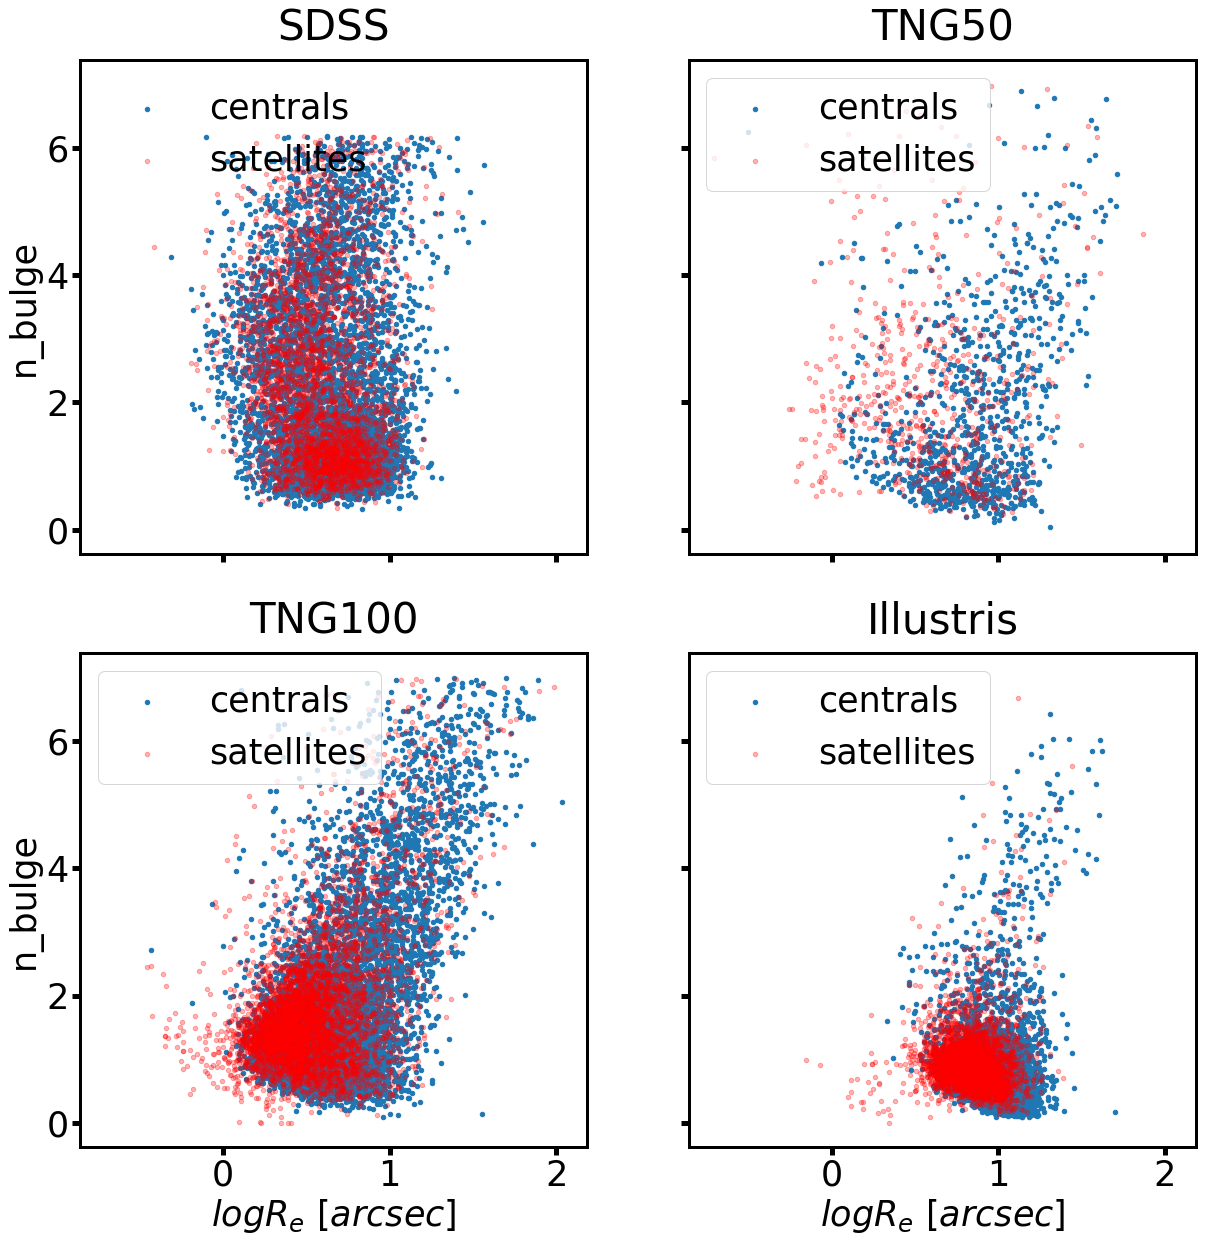

In [395]:
dsets = [SDSS_cen,TNG50_cen,TNG_cen,Illustris_cen]
fig,ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(20,20))
titles = ['SDSS','TNG50','TNG100','Illustris']

for dset,(a,tit) in zip(dsets, zip(ax.ravel(),titles)):
    dset.plot.scatter('$logR_e \ [arcsec]$','n_bulge', ax=a, label='centrals')
    a.set_title(tit)

dsets = [SDSS_sat,TNG50_sat,TNG_sat,Illustris_sat]
for dset,a in zip(dsets, ax.ravel()):
    dset.plot.scatter('$logR_e \ [arcsec]$','n_bulge', ax=a, color='red',alpha=0.3, label='satellites')
ax[0][0].legend(frameon=False)

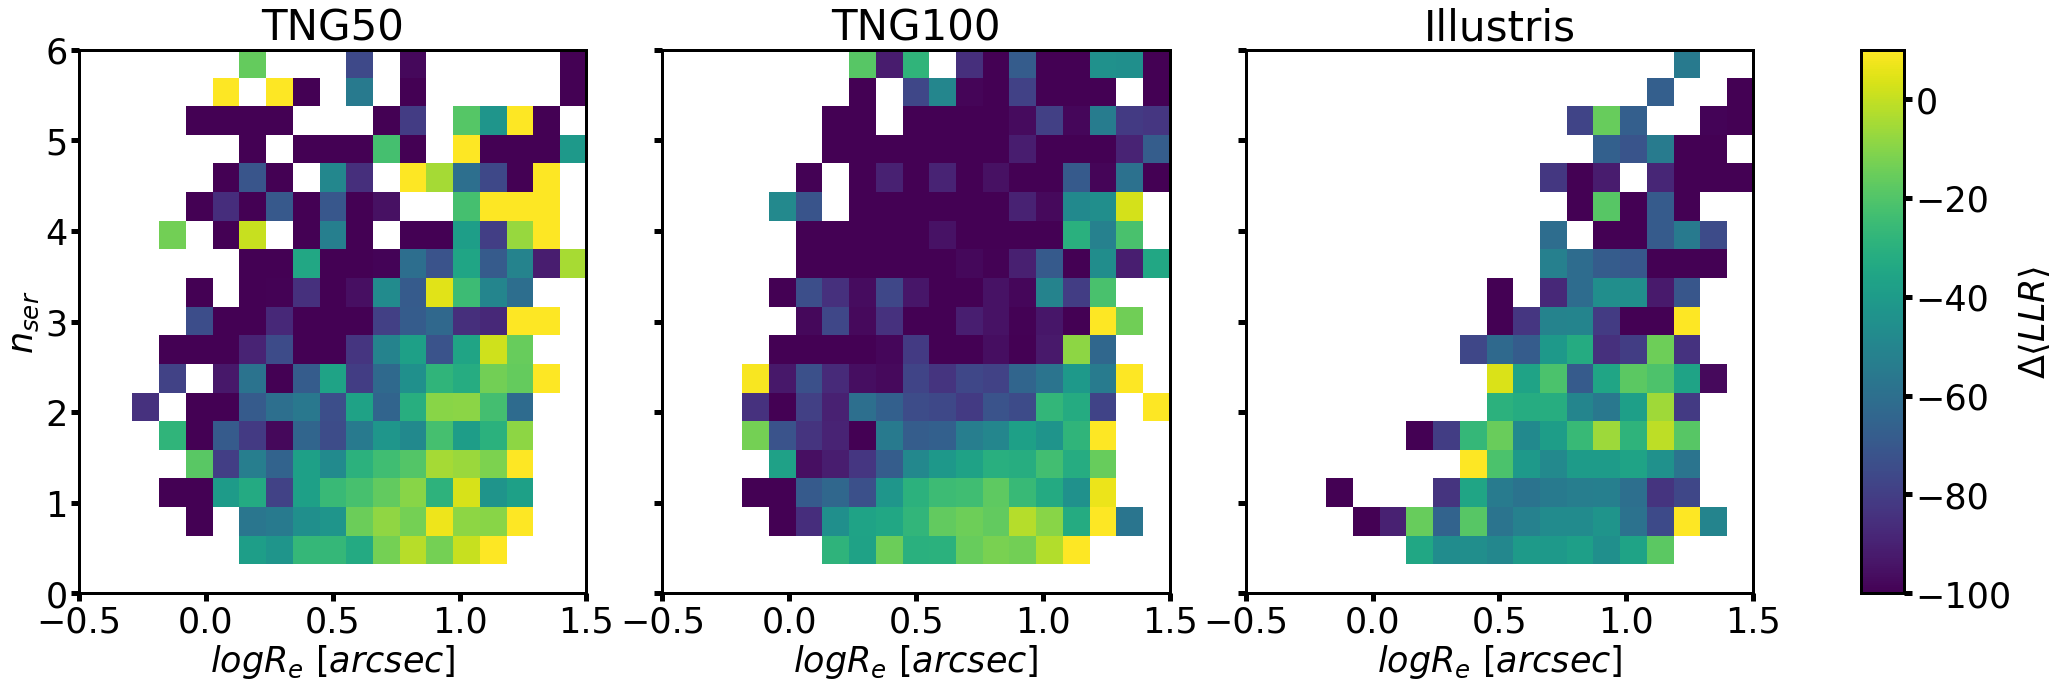

In [8]:
binsx = np.linspace(-0.5,1.5,20)
binsy = np.linspace(0,6,20)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS['$logR_e \ [arcsec]$'],SDSS['$n_{ser}$'], values=SDSS['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50,TNG,Illustris]
titles = ['TNG50','TNG100','Illustris']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['$logR_e \ [arcsec]$'],dset['$n_{ser}$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10,aspect='auto')
   # a.set_xlim(9.5,12.5)
   # a.set_ylim(-12.5,-9.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    #a.set_xticks([9.5,10,10.5,11,11.5])

    a.set_xlabel('$logR_e \ [arcsec]$')
    a.set_aspect('auto')
ax_[0].set_ylabel('$n_{ser}$')
fig.subplots_adjust(wspace=0.15,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'$\Delta \langle LLR \rangle$')
fig.savefig('./results/ScalingRelations/Re_nbulge.pdf', bbox_inches='tight')



# coutouts

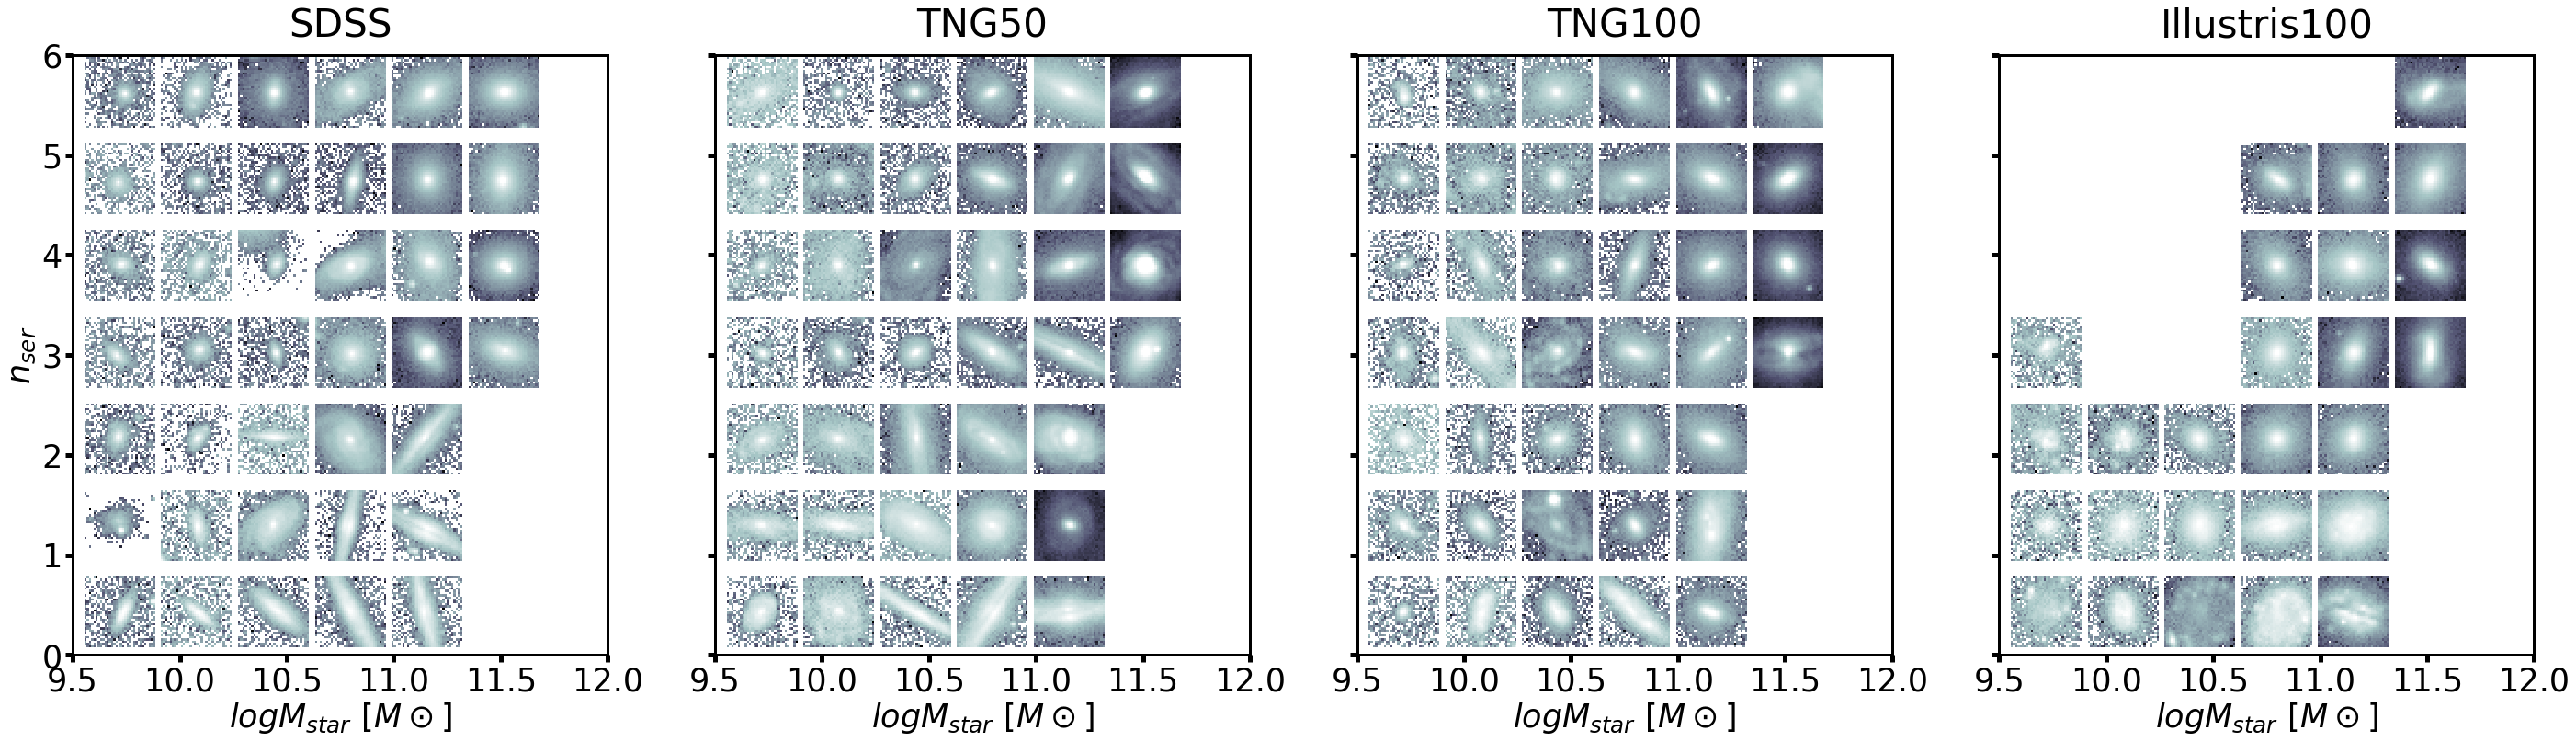

In [566]:
binsx = np.linspace(9.5,12,8)
binsy = np.linspace(0,6,8)
stat_SDSS, x,y,_ = binned_statistic_2d(SDSS['Mstar'],SDSS['$logR_e \ [arcsec]$'], values=SDSS['LLR'], statistic='mean',bins=[binsx,binsy])
stat_dset, x,y,_ = binned_statistic_2d(TNG['Mstar'],TNG['$logR_e \ [arcsec]$'], values=TNG['LLR'],statistic='mean',bins=[binsx,binsy])
stat_dset = np.flipud(stat_dset.T) -np.flipud(stat_SDSS.T)


fig, ax = plt.subplots(1,4, figsize=(48,12), sharey=True)
for i in range(len(x)-1):
    for j in range(len(y)-1):
        check = 0
        ind = SDSS.query(r'{}<Mstar<{} & {}<n_bulge<{}'.format(x[i],x[i+1],y[j],y[j+1]))
        
        try:
            ind = ind.sample().index.values[0]
            imagebox = OffsetImage(L_SDSS[ind], zoom=2.4,norm=colors.LogNorm(), cmap='bone')#,cmap='bone',norm=colors.LogNorm(),zoom=2)
            imagebox.image.axes = ax[0]
            xy = [(x[i]+x[i+1])/2, (y[j]+y[j+1])/2]
            ab = AnnotationBbox(imagebox, xy,
                           #     xybox=(50,-50),
                                xycoords='data',
                                pad=0,
                                boxcoords="offset points",
                               frameon=False)
            ax[0].add_artist(ab)
        except:
            check = 1
        
        
        if check == 0:
            
            ind = TNG50.query(r'{}<Mstar<{} & {}<n_bulge<{}'.format(x[i],x[i+1],y[j],y[j+1]))

            try:
                ind = ind.sample().index.values[0]
                imagebox = OffsetImage(L_TNG50[ind], zoom=2.4,norm=colors.LogNorm(), cmap='bone')#,cmap='bone',norm=colors.LogNorm(),zoom=2)
                imagebox.image.axes = ax[1]
                xy = [(x[i]+x[i+1])/2, (y[j]+y[j+1])/2]
                ab = AnnotationBbox(imagebox, xy,
                               #     xybox=(50,-50),
                                    xycoords='data',
                                    pad=0,
                                    boxcoords="offset points",
                                   frameon=False)
                ax[1].add_artist(ab)
            except:
                pass
            
            try:
                ind = TNG.query(r'{}<Mstar<{} & {}<n_bulge<{}'.format(x[i],x[i+1],y[j],y[j+1]))
                ind = ind.sample().index.values[0]
                imagebox = OffsetImage(L_TNG[ind], zoom=2.4,norm=colors.LogNorm(), cmap='bone')#,cmap='bone',norm=colors.LogNorm(),zoom=2)
                imagebox.image.axes = ax[2]
                xy = [(x[i]+x[i+1])/2, (y[j]+y[j+1])/2]
                ab = AnnotationBbox(imagebox, xy,
                               #     xybox=(50,-50),
                                    xycoords='data',
                                    pad=0,
                                    boxcoords="offset points",
                                   frameon=False)
                ax[2].add_artist(ab)
            except:
                pass
            
            ind = Illustris.query(r'{}<Mstar<{} & {}<n_bulge<{}'.format(x[i],x[i+1],y[j],y[j+1]))

            try:
                ind = ind.sample().index.values[0]
                imagebox = OffsetImage(L_Illustris[ind], zoom=2.4,norm=colors.LogNorm(), cmap='bone')#,cmap='bone',norm=colors.LogNorm(),zoom=2)
                imagebox.image.axes = ax[3]
                xy = [(x[i]+x[i+1])/2, (y[j]+y[j+1])/2]
                ab = AnnotationBbox(imagebox, xy,
                               #     xybox=(50,-50),
                                    xycoords='data',
                                    pad=0,
                                    boxcoords="offset points",
                                   frameon=False)
                ax[3].add_artist(ab)
            except:
                pass
        
        


for a,t in zip(ax.ravel(),['SDSS','TNG50','TNG100','Illustris100']):        
    a.set_xlim(9.5,12)
    a.set_ylim(0,6)
    a.set_title(t)
    a.set_xlabel('$logM_{star} \ [M\odot]$')
ax[0].set_ylabel('$n_{ser}$')
plt.savefig('./results/LLR_L_trends/Re_nbulge_data_cutout.pdf', bbox_inches='tight')

# quiescent

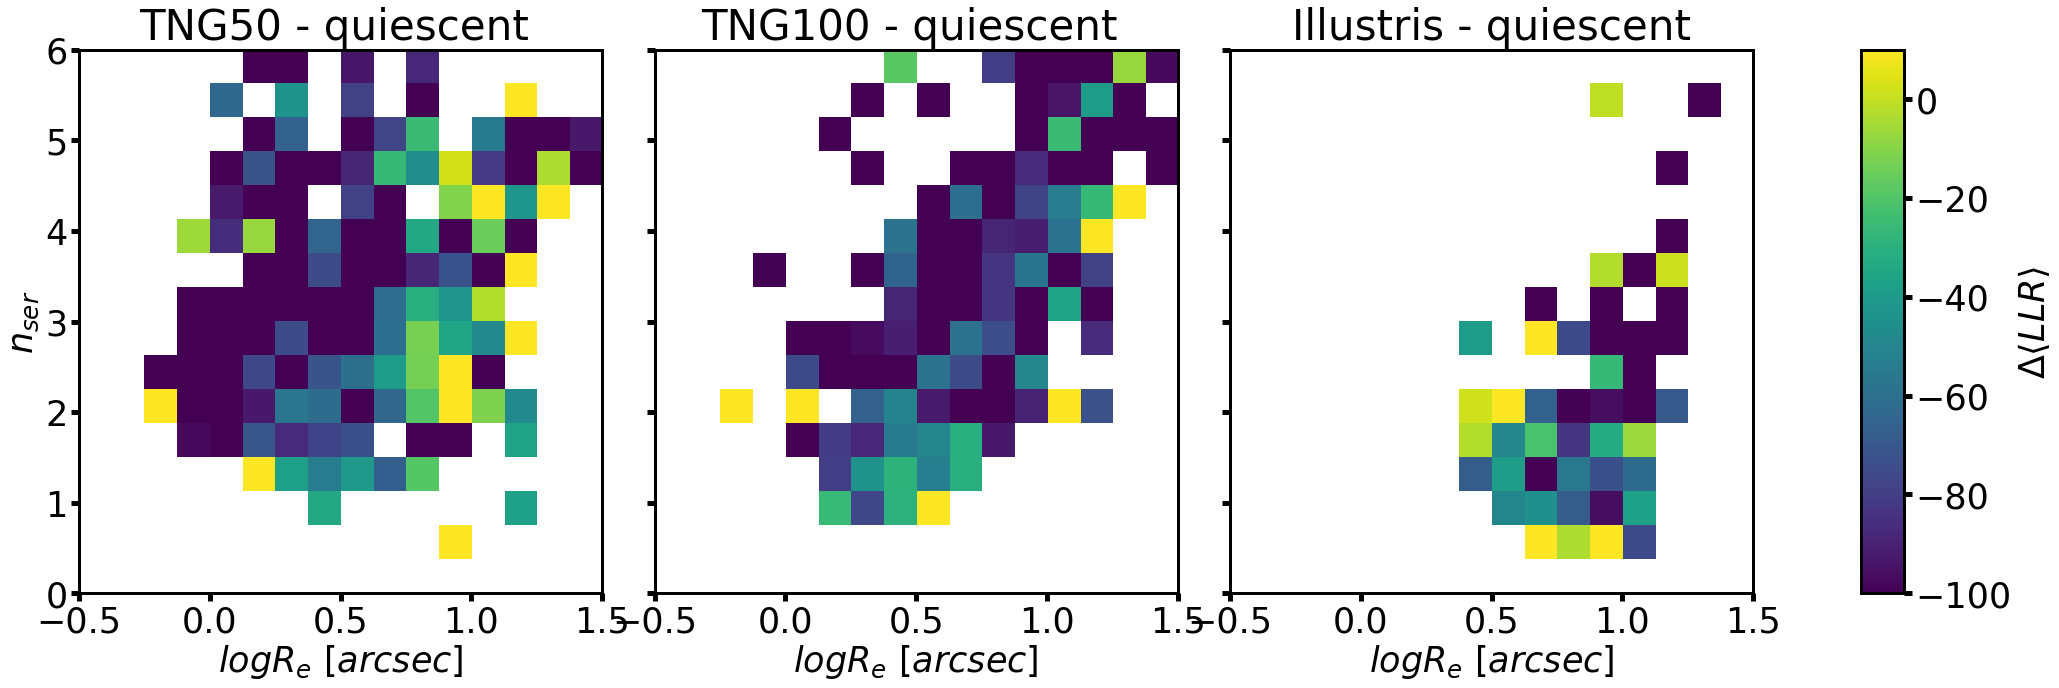

In [9]:
binsx = np.linspace(-0.5,1.5,17)
binsy = np.linspace(0,6,17)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_Q['$logR_e \ [arcsec]$'],SDSS_Q['$n_{ser}$'], values=SDSS_Q['LLR'], statistic='mean',bins=[binsx,binsy])

#dsets = [TNG50_Q,TNG_Q.sample(frac=(len(TNG50_Q)/len(TNG_Q))),Illustris_Q.sample(frac=(len(TNG50_Q)/len(Illustris_Q)))]#
dsets = [TNG50_Q, TNG.sample(frac=len(TNG50)/len(TNG)).query('sSFR<-11'), Illustris_Q.sample(frac=len(TNG50)/len(Illustris)).query('sSFR<-11')]
titles = ['TNG50 - quiescent ','TNG100 - quiescent ','Illustris - quiescent']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['$logR_e \ [arcsec]$'],dset['$n_{ser}$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10,aspect='auto')
   # a.set_xlim(9.5,12.5)
   # a.set_ylim(-12.5,-9.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    #a.set_xticks([9.5,10,10.5,11,11.5])

    a.set_xlabel('$logR_e \ [arcsec]$')
    a.set_aspect('auto')
ax_[0].set_ylabel('$n_{ser}$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'$\Delta \langle LLR \rangle$')
fig.savefig('./results/ScalingRelations/Re_nbulge_Q_resampled.pdf', bbox_inches='tight')



# sat Quiescent

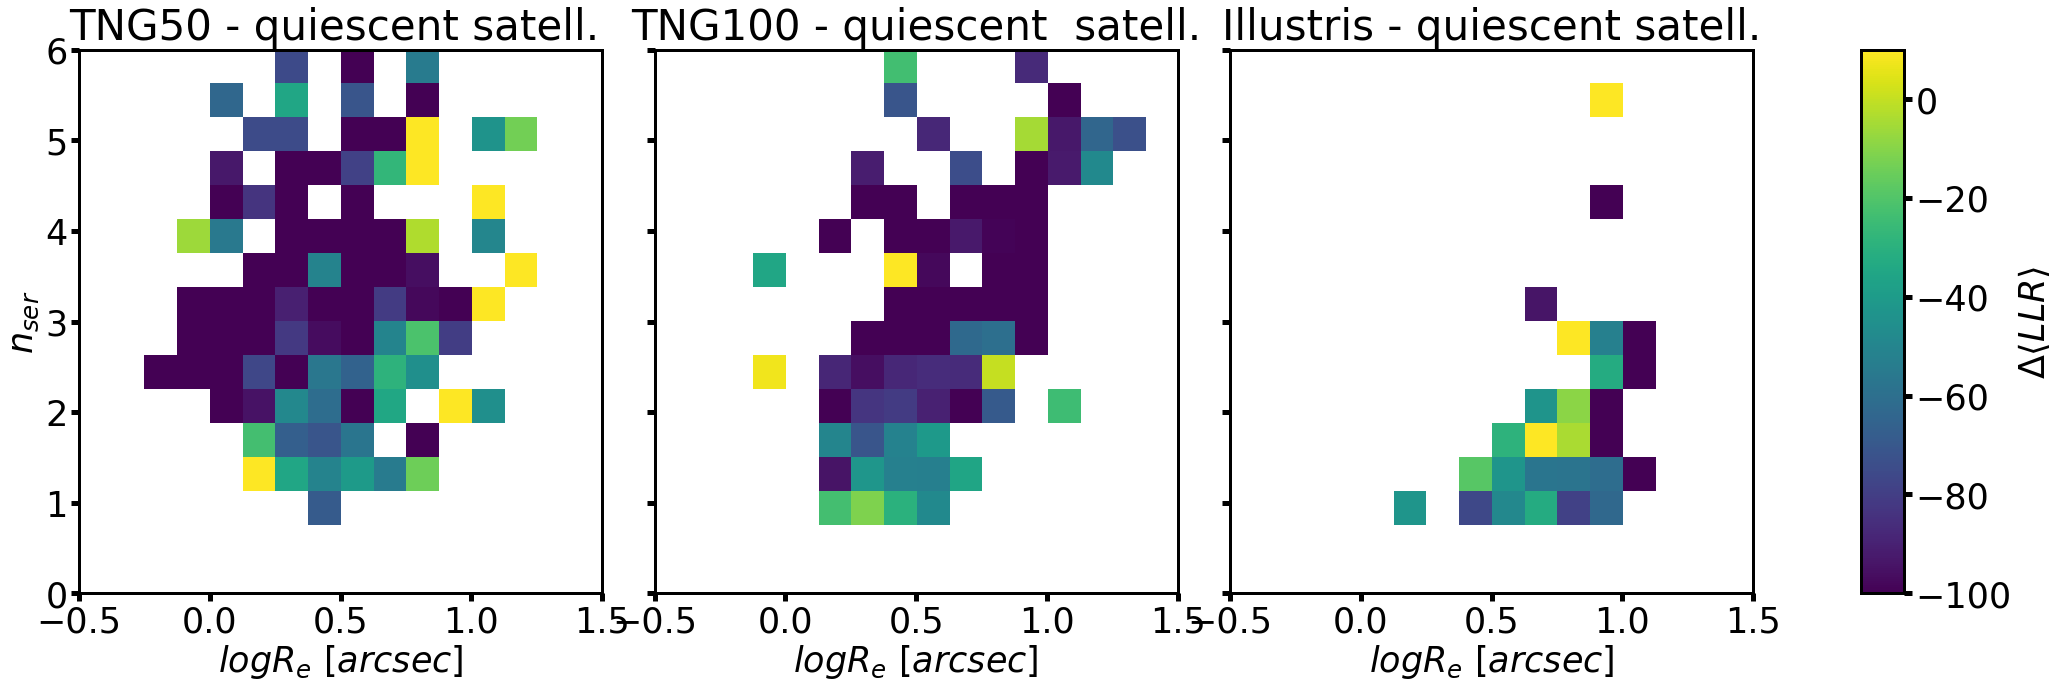

In [25]:
binsx = np.linspace(-0.5,1.5,17)
binsy = np.linspace(0,6,17)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_sat_Q['$logR_e \ [arcsec]$'],SDSS_sat_Q['$n_{ser}$'], values=SDSS_sat_Q['LLR'], statistic='mean',bins=[binsx,binsy])

#dsets = [TNG50_Q,TNG_Q.sample(frac=(len(TNG50_Q)/len(TNG_Q))),Illustris_Q.sample(frac=(len(TNG50_Q)/len(Illustris_Q)))]#
dsets = [TNG50_sat_Q, TNG.sample(frac=len(TNG50)/len(TNG)).query('sSFR<-11 & LCentSat==0'), Illustris.sample(frac=len(TNG50)/len(Illustris)).query('sSFR<-11 & LCentSat==0')]
titles = ['TNG50 - quiescent satell. ','TNG100 - quiescent  satell.','Illustris - quiescent satell.']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['$logR_e \ [arcsec]$'],dset['$n_{ser}$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10,aspect='auto')
   # a.set_xlim(9.5,12.5)
   # a.set_ylim(-12.5,-9.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    #a.set_xticks([9.5,10,10.5,11,11.5])

    a.set_xlabel('$logR_e \ [arcsec]$')
    a.set_aspect('auto')
ax_[0].set_ylabel('$n_{ser}$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'$\Delta \langle LLR \rangle$')
fig.savefig('./results/ScalingRelations/Re_nbulge_satellites_Q.pdf', bbox_inches='tight')



# cen Quiescent

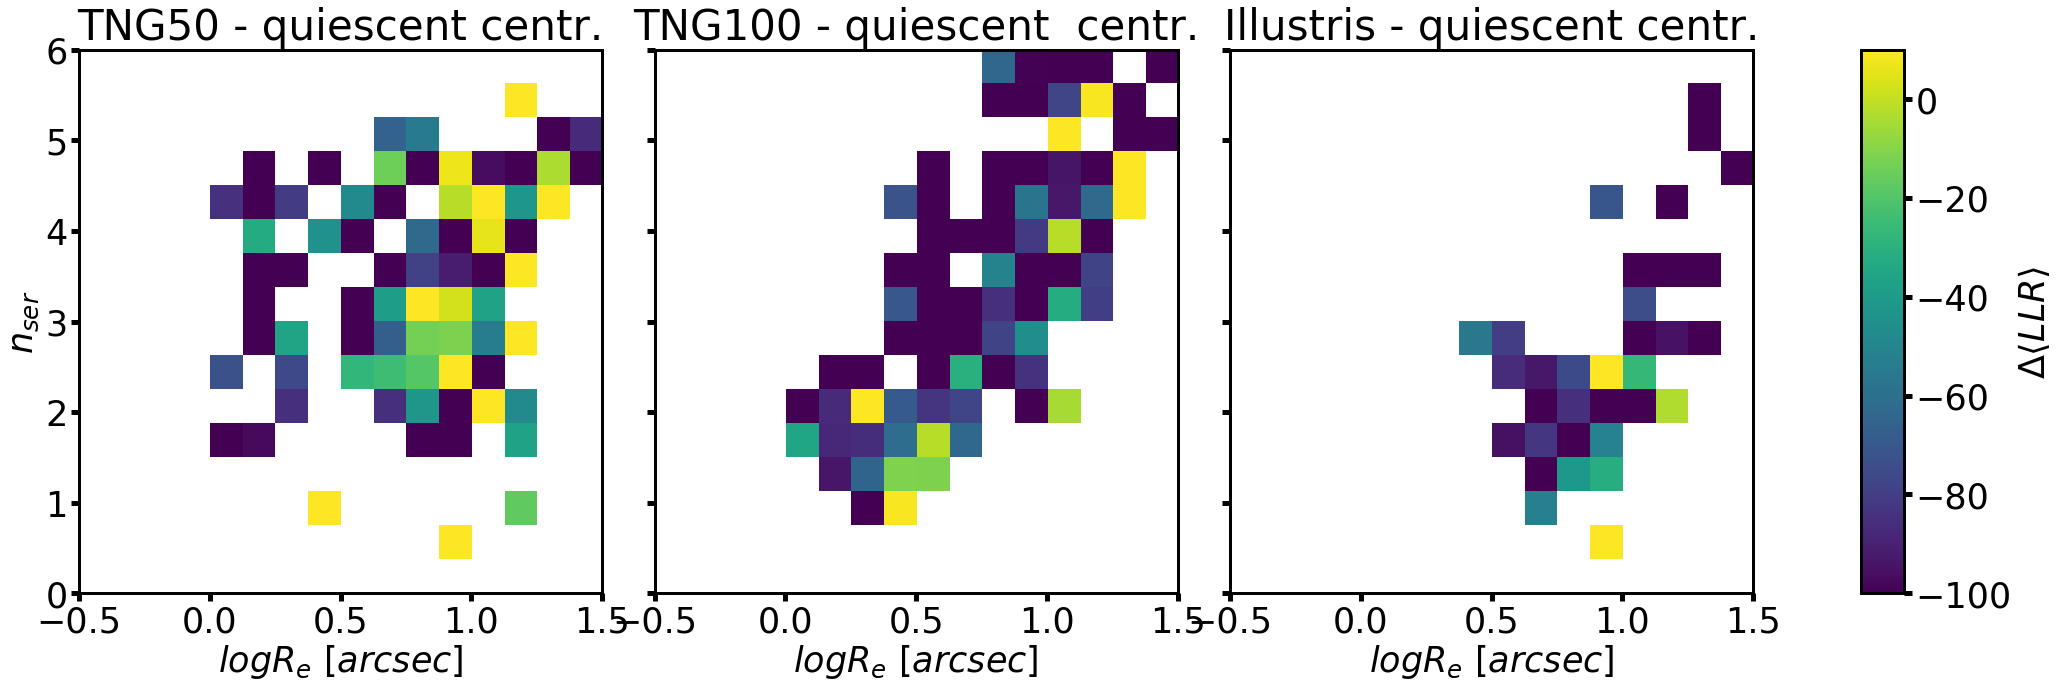

In [26]:
binsx = np.linspace(-0.5,1.5,17)
binsy = np.linspace(0,6,17)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_cen_Q['$logR_e \ [arcsec]$'],SDSS_cen_Q['$n_{ser}$'], values=SDSS_cen_Q['LLR'], statistic='mean',bins=[binsx,binsy])

#dsets = [TNG50_Q,TNG_Q.sample(frac=(len(TNG50_Q)/len(TNG_Q))),Illustris_Q.sample(frac=(len(TNG50_Q)/len(Illustris_Q)))]#
dsets = [TNG50_cen_Q, TNG.sample(frac=len(TNG50)/len(TNG)).query('sSFR<-11 & LCentSat==1'), Illustris.sample(frac=len(TNG50)/len(Illustris)).query('sSFR<-11 & LCentSat==1')]
titles = ['TNG50 - quiescent centr.','TNG100 - quiescent  centr.','Illustris - quiescent centr.']
plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['$logR_e \ [arcsec]$'],dset['$n_{ser}$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10,aspect='auto')
   # a.set_xlim(9.5,12.5)
   # a.set_ylim(-12.5,-9.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    #a.set_xticks([9.5,10,10.5,11,11.5])

    a.set_xlabel('$logR_e \ [arcsec]$')
    a.set_aspect('auto')
ax_[0].set_ylabel('$n_{ser}$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'$\Delta \langle LLR \rangle$')
fig.savefig('./results/ScalingRelations/Re_nbulge_centrals_Q.pdf', bbox_inches='tight')



# star forming 

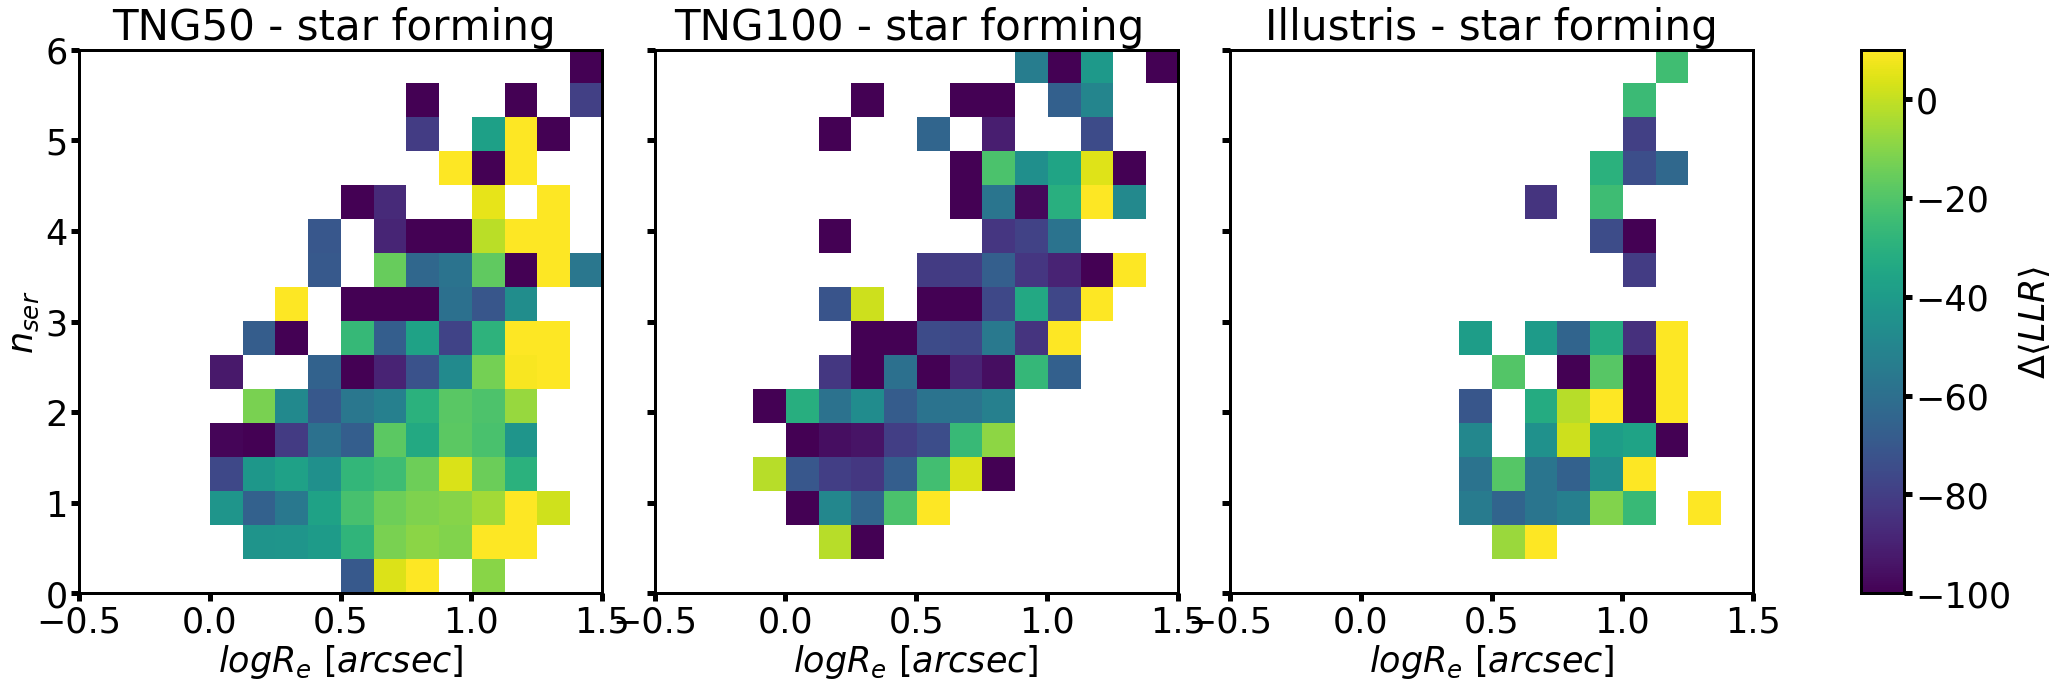

In [13]:
binsx = np.linspace(-0.5,1.5,17)
binsy = np.linspace(0,6,17)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_SF['$logR_e \ [arcsec]$'],SDSS_SF['$n_{ser}$'], values=SDSS_SF['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_SF,TNG.sample(frac=(len(TNG50)/len(TNG))).query('sSFR<-11'),Illustris.sample(frac=(len(TNG50)/len(Illustris))).query('sSFR<-11')]
#dsets = [TNG50_SF, TNG_SF, Illustris_SF]

titles = ['TNG50 - star forming ','TNG100 - star forming ','Illustris - star forming']

plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['$logR_e \ [arcsec]$'],dset['$n_{ser}$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10,aspect='auto')
   # a.set_xlim(9.5,12.5)
   # a.set_ylim(-12.5,-9.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    #a.set_xticks([9.5,10,10.5,11,11.5])

    a.set_xlabel('$logR_e \ [arcsec]$')
    a.set_aspect('auto')
ax_[0].set_ylabel('$n_{ser}$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'$\Delta \langle LLR \rangle$')
fig.savefig('./results/ScalingRelations/Re_nbulge_SF_resampled.pdf', bbox_inches='tight')


# SF sat

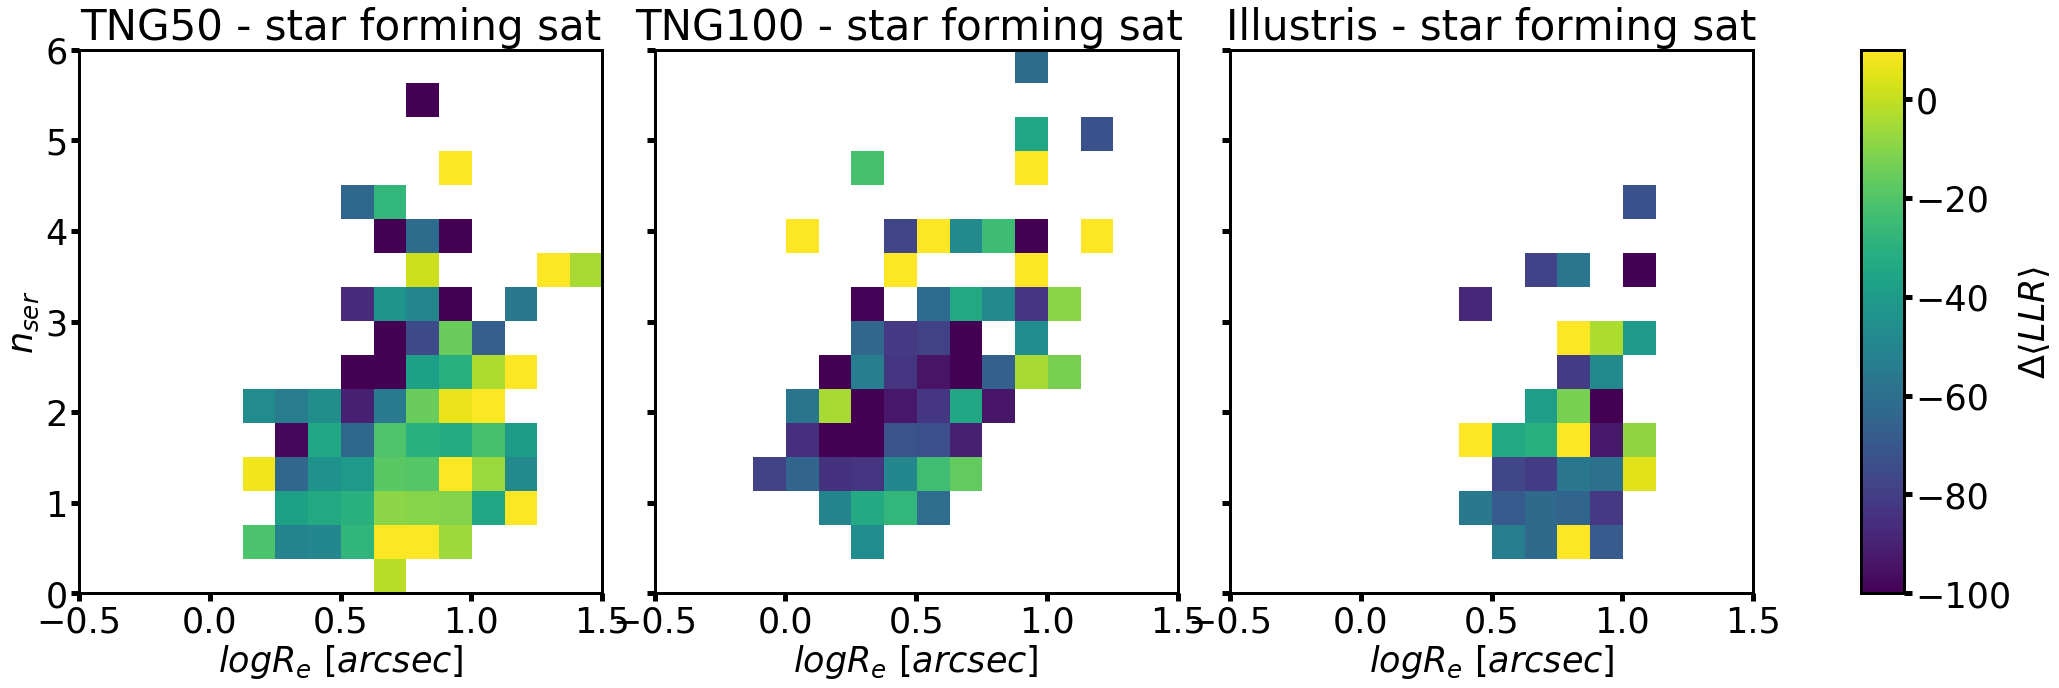

In [15]:
binsx = np.linspace(-0.5,1.5,17)
binsy = np.linspace(0,6,17)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_sat_SF['$logR_e \ [arcsec]$'],SDSS_sat_SF['$n_{ser}$'], values=SDSS_sat_SF['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_sat_SF,TNG.sample(frac=(len(TNG50)/len(TNG))).query('sSFR<-11 & LCentSat==0'),Illustris.sample(frac=(len(TNG50)/len(Illustris))).query('sSFR<-11 & LCentSat==0')]
#dsets = [TNG50_SF, TNG_SF, Illustris_SF]

titles = ['TNG50 - star forming sat','TNG100 - star forming sat ','Illustris - star forming sat']

plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['$logR_e \ [arcsec]$'],dset['$n_{ser}$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10,aspect='auto')
   # a.set_xlim(9.5,12.5)
   # a.set_ylim(-12.5,-9.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    #a.set_xticks([9.5,10,10.5,11,11.5])

    a.set_xlabel('$logR_e \ [arcsec]$')
    a.set_aspect('auto')
ax_[0].set_ylabel('$n_{ser}$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'$\Delta \langle LLR \rangle$')
fig.savefig('./results/ScalingRelations/Re_nbulge_satellite_SF.pdf', bbox_inches='tight')


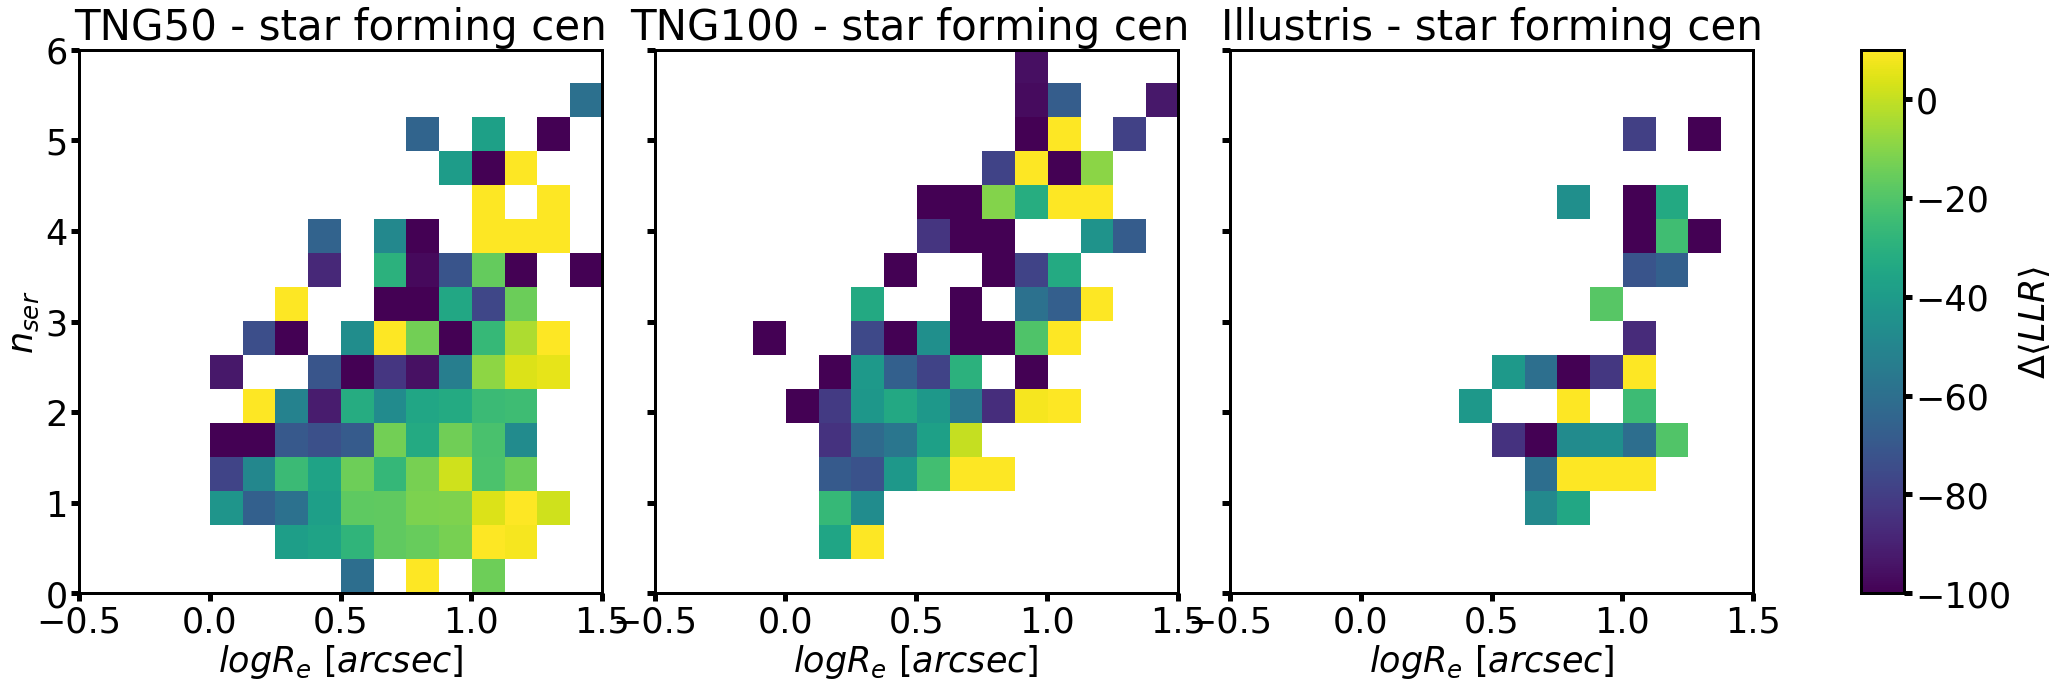

In [17]:
binsx = np.linspace(-0.5,1.5,17)
binsy = np.linspace(0,6,17)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS_cen_SF['$logR_e \ [arcsec]$'],SDSS_cen_SF['$n_{ser}$'], values=SDSS_cen_SF['LLR'], statistic='mean',bins=[binsx,binsy])

dsets = [TNG50_cen_SF,TNG.sample(frac=(len(TNG50)/len(TNG))).query('sSFR<-11 & LCentSat==1'),Illustris.sample(frac=(len(TNG50)/len(Illustris))).query('sSFR<-11 & LCentSat==1')]
#dsets = [TNG50_SF, TNG_SF, Illustris_SF]

titles = ['TNG50 - star forming cen','TNG100 - star forming cen ','Illustris - star forming cen']

plt.rcParams['figure.figsize'] = (30,10)
fig,ax_ = plt.subplots(1,3,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['$logR_e \ [arcsec]$'],dset['$n_{ser}$'], values=dset['LLR'],statistic='mean',bins=[binsx,binsy])
    delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(delta, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-100,vmax=10,aspect='auto')
   # a.set_xlim(9.5,12.5)
   # a.set_ylim(-12.5,-9.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    #a.set_xticks([9.5,10,10.5,11,11.5])

    a.set_xlabel('$logR_e \ [arcsec]$')
    a.set_aspect('auto')
ax_[0].set_ylabel('$n_{ser}$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'$\Delta \langle LLR \rangle$')
fig.savefig('./results/ScalingRelations/Re_nbulge_central_SF.pdf', bbox_inches='tight')

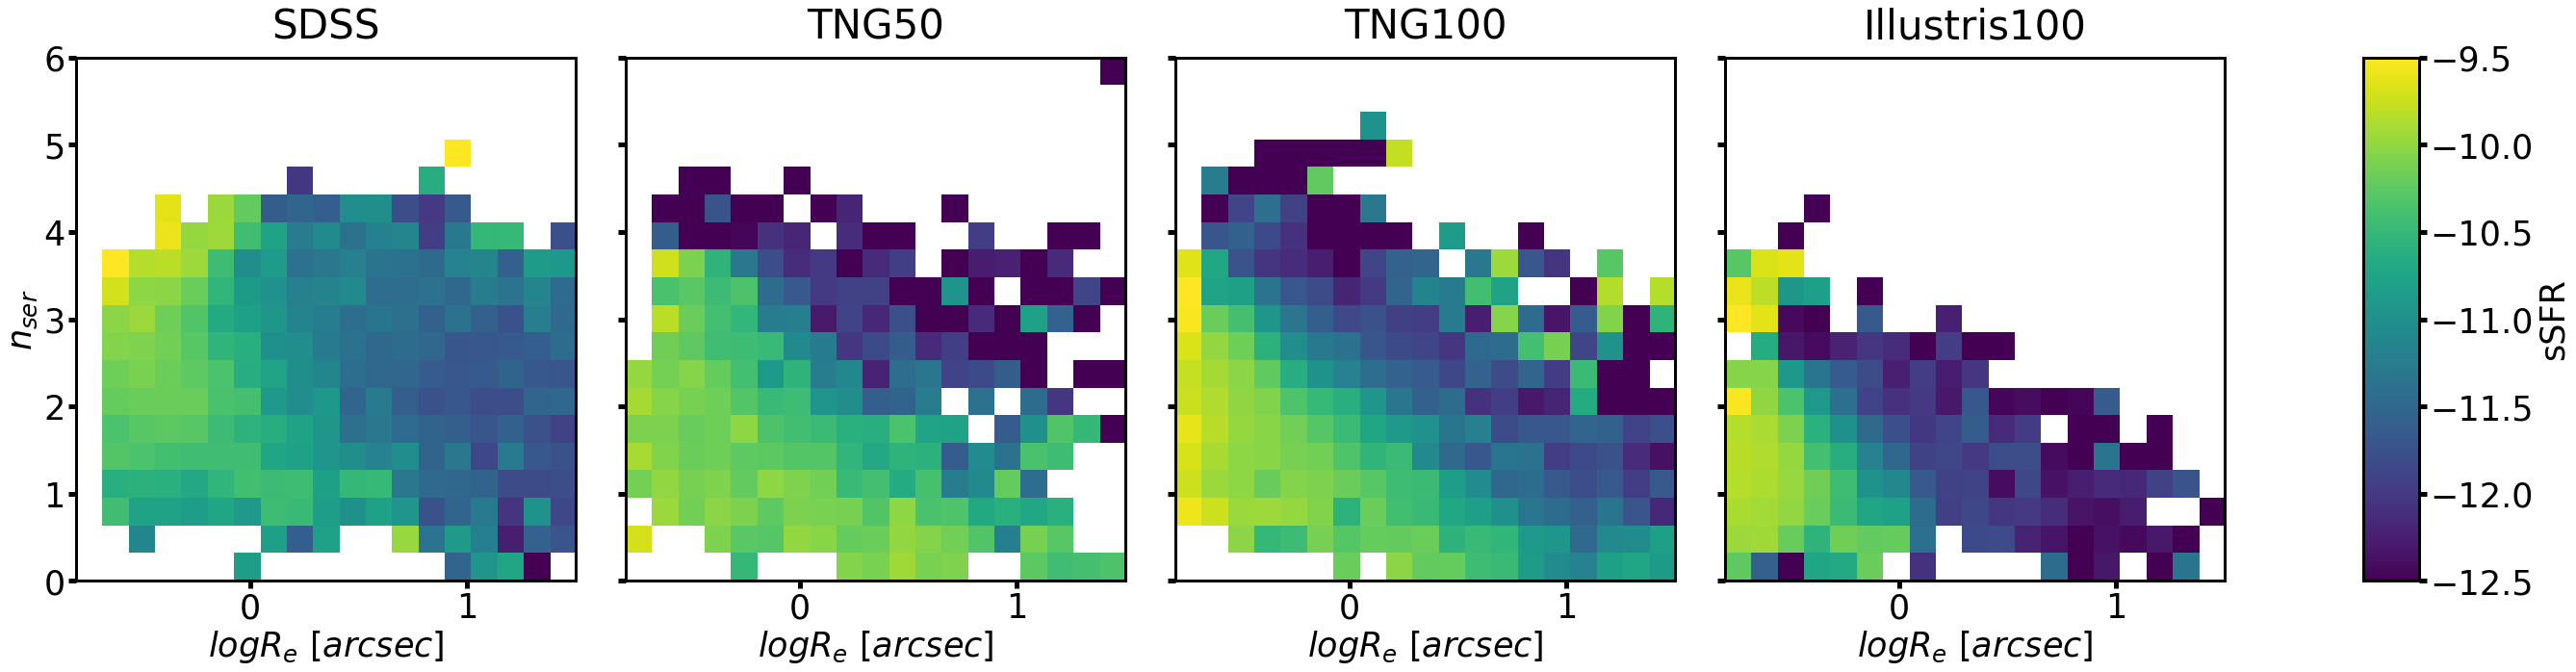

In [393]:
binsx = np.linspace(-0.8,1.5,20)
binsy = np.linspace(0,6,20)

stat_SDSS, x,y,_ = binned_statistic_2d(SDSS['$logR_e \ [arcsec]$'],SDSS['$n_{ser}$'], values=SDSS['sSFR'], statistic='mean',bins=[binsx,binsy])

dsets = [SDSS,TNG50,TNG,Illustris]
titles = ['SDSS','TNG50','TNG100','Illustris100']
plt.rcParams['figure.figsize'] = (40,10)
fig,ax_ = plt.subplots(1,4,  sharey=True)

for dset,(a,tit) in zip(dsets, zip(ax_.ravel(),titles)):
    stat_dset, x,y,_ = binned_statistic_2d(dset['$logR_e \ [arcsec]$'],dset['$n_{ser}$'], values=dset['sSFR'],statistic='mean',bins=[binsx,binsy])
    #delta = np.flipud(stat_dset.T)-np.flipud(stat_SDSS.T)
 
 
    im=a.imshow(stat_dset, extent=(x[0],x[-1],y[0],y[-1] ), vmin=-12.5,vmax=-9.5,aspect='auto')
   # a.set_xlim(9.5,12.5)
   # a.set_ylim(-12.5,-9.5)
    #m = plt.cm.ScalarMappable(cmap=cm.viridis)
    #m.set_array(delta)
    #m.set_clim(-200., 0.)
    #plt.colorbar(m, boundaries=np.linspace(-200, 0, 10))
    #dset.plot.scatter('Mstar','$logR_e \ [arcsec]$', ax=a, alpha=0.1)
    
    a.set_title(tit)
    #a.set_xticks([9.5,10,10.5,11,11.5])

    a.set_xlabel('$logR_e \ [arcsec]$')
    a.set_aspect('auto')
ax_[0].set_ylabel('$n_{ser}$')
fig.subplots_adjust(wspace=0.1,hspace=0)
# put colorbar at desire position

cax = fig.add_axes([ax_[-1].get_position().x1+0.05,ax_[1].get_position().y0,0.02,ax_[0].get_position().y1-ax_[1].get_position().y0])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('sSFR')
#fig.savefig('./results/ScalingRelations/Re_nbulge.pdf', bbox_inches='tight')



# Mbh-Mstar

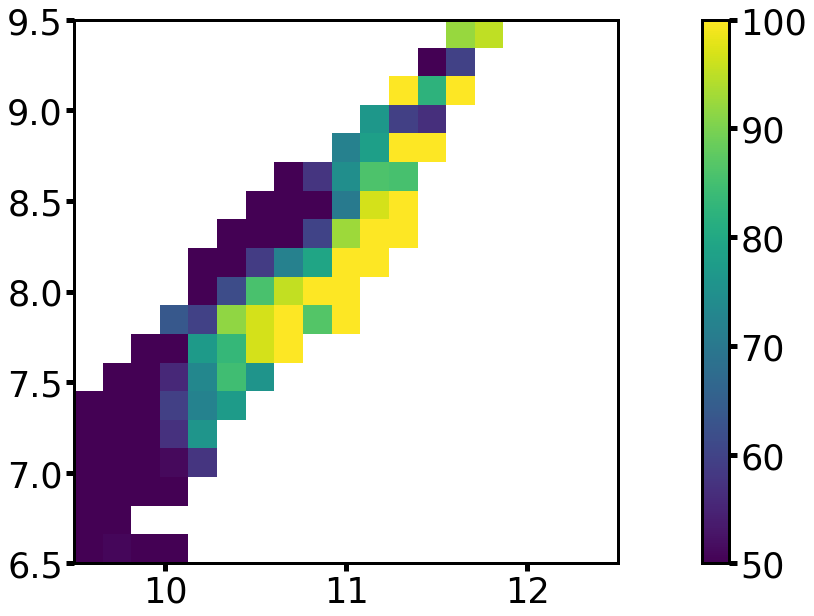

In [351]:
binsx = np.linspace(9.5,12.5,20)
binsy = np.linspace(6.5,9.5,20)
stat_dset, x,y,_ = binned_statistic_2d(TNG_cen['Mstar'],TNG_cen['M_BH'], values=TNG_cen['LLR'],statistic='mean',bins=[binsx,binsy])


im=plt.imshow(np.flipud(stat_dset.T), extent=(x[0],x[-1],y[0],y[-1] ), vmin=50,vmax=100)
plt.colorbar()

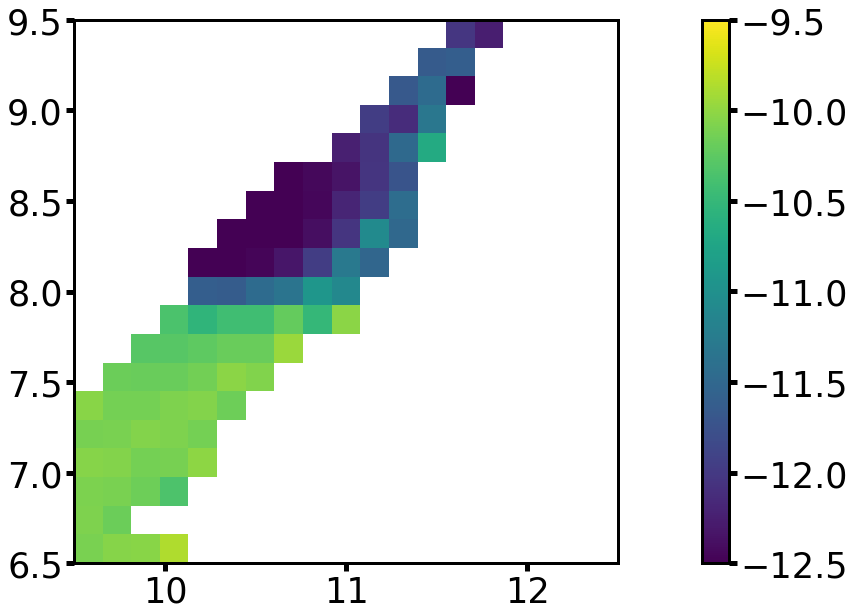

In [352]:
binsx = np.linspace(9.5,12.5,20)
binsy = np.linspace(6.5,9.5,20)
stat_dset, x,y,_ = binned_statistic_2d(TNG_cen['Mstar'],TNG_cen['M_BH'], values=TNG_cen['sSFR'],statistic='mean',bins=[binsx,binsy])


im=plt.imshow(np.flipud(stat_dset.T), extent=(x[0],x[-1],y[0],y[-1] ), vmin=-12.5,vmax=-9.5)
plt.colorbar()